In [ ]:
import numpy as np
import os
import re
import scipy.io as scio

import numpy as np
import pandas as pd

import pickle


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch

exp = '12DriveEndFault'
with open('/content/cwru_data.pkl', 'rb') as file:
    # Deserialize the dictionary
    loaded_dict = pickle.load(file)

data, labels = loaded_dict[exp]

scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, data.shape[1])).reshape(data.shape)

data = data[:, :, np.newaxis]

input_dim = data.shape[2]
hidden_dim = 128
num_layers = 3
batch_size = 64
num_epochs = 200
base_path = 'GAN/GAN_'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print("cuda" if torch.cuda.is_available() else "cpu")

cuda


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(2831, 2048, 1)
(2831,)


In [ ]:
from timegan import TimeGAN, train_time_gan
from cwru import faults_idx, exps_idx

In [6]:
for fault_name, fault_idx in faults_idx.items():
    label = fault_idx
    label_name = exp + "_" + fault_name
    X_label = X_train[y_train == label]
    if X_label.shape[0] > 0:
      save_path = base_path+label_name+".pth"
      model = TimeGAN(input_dim, hidden_dim, num_layers, device).to(device)
      train_time_gan(model, X_label, batch_size, num_epochs, device, save_path)

100%|██████████| 3/3 [00:00<00:00,  3.75it/s]


Epoch [1/200] Loss D: 1.3848752975463867, Loss G: 0.7941827774047852) KL divergence: 0.0870011206716299
New best kl Divergence: 0.0870011206716299. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


Epoch [2/200] Loss D: 1.5033438205718994, Loss G: 0.6812704205513) KL divergence: 0.06345682591199875
New best kl Divergence: 0.06345682591199875. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


Epoch [3/200] Loss D: 1.304650902748108, Loss G: 0.9387117624282837) KL divergence: 0.04162699915468693
New best kl Divergence: 0.04162699915468693. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


Epoch [4/200] Loss D: 0.9721541404724121, Loss G: 1.5437793731689453) KL divergence: 0.13685192167758942


100%|██████████| 3/3 [00:00<00:00,  6.96it/s]


Epoch [5/200] Loss D: 0.3367765247821808, Loss G: 2.731396436691284) KL divergence: 0.05589944124221802


100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


Epoch [6/200] Loss D: 3.262855291366577, Loss G: 0.06220090389251709) KL divergence: 0.07230367014805476


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [7/200] Loss D: 2.9123713970184326, Loss G: 0.08696682006120682) KL divergence: 0.07273353636264801


100%|██████████| 3/3 [00:00<00:00,  8.79it/s]
/content/timegan.py:93: RuntimeWarning: Mean of empty slice
  avg_kl_div = np.nanmean(kl_divergences)


Epoch [8/200] Loss D: 2.043933868408203, Loss G: 0.25020739436149597) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [9/200] Loss D: 1.4556028842926025, Loss G: 0.6350482106208801) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


Epoch [10/200] Loss D: 1.3986464738845825, Loss G: 1.0892359018325806) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.67it/s]


Epoch [11/200] Loss D: 1.4896013736724854, Loss G: 1.2621955871582031) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.24it/s]


Epoch [12/200] Loss D: 1.44122314453125, Loss G: 1.1419814825057983) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


Epoch [13/200] Loss D: 1.341374397277832, Loss G: 0.8936968445777893) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [14/200] Loss D: 1.3274900913238525, Loss G: 0.6734918355941772) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.52it/s]


Epoch [15/200] Loss D: 1.4137449264526367, Loss G: 0.530778706073761) KL divergence: 0.09011943638324738


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [16/200] Loss D: 1.479421854019165, Loss G: 0.4832751154899597) KL divergence: 0.05578961409628391


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [17/200] Loss D: 1.4549565315246582, Loss G: 0.512199878692627) KL divergence: 0.06306286156177521


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [18/200] Loss D: 1.4225075244903564, Loss G: 0.5487481951713562) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [19/200] Loss D: 1.3996185064315796, Loss G: 0.5998641848564148) KL divergence: 0.03666653111577034
New best kl Divergence: 0.03666653111577034. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


Epoch [20/200] Loss D: 1.3865219354629517, Loss G: 0.66558837890625) KL divergence: 0.03496596527596315
New best kl Divergence: 0.03496596527596315. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


Epoch [21/200] Loss D: 1.3829760551452637, Loss G: 0.7229169011116028) KL divergence: 0.06749836603800456


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [22/200] Loss D: 1.3870742321014404, Loss G: 0.7512636780738831) KL divergence: 0.03593071301778158


100%|██████████| 3/3 [00:00<00:00,  6.89it/s]


Epoch [23/200] Loss D: 1.3912880420684814, Loss G: 0.7531402111053467) KL divergence: 0.005794697751601537
New best kl Divergence: 0.005794697751601537. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  6.96it/s]


Epoch [24/200] Loss D: 1.3951865434646606, Loss G: 0.7399493455886841) KL divergence: 0.06755917395154636


100%|██████████| 3/3 [00:00<00:00,  7.14it/s]


Epoch [25/200] Loss D: 1.398916244506836, Loss G: 0.7265328764915466) KL divergence: 0.08377095808585484


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [26/200] Loss D: 1.3997840881347656, Loss G: 0.7249394059181213) KL divergence: 0.06515880798300107


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [27/200] Loss D: 1.3950273990631104, Loss G: 0.7397676706314087) KL divergence: 0.046428234626849495


100%|██████████| 3/3 [00:00<00:00,  7.90it/s]


Epoch [28/200] Loss D: 1.384842872619629, Loss G: 0.7680333852767944) KL divergence: 0.0375789770235618


100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


Epoch [29/200] Loss D: 1.3720812797546387, Loss G: 0.8014119267463684) KL divergence: 0.0760400320092837


100%|██████████| 3/3 [00:00<00:00,  7.89it/s]


Epoch [30/200] Loss D: 1.3604004383087158, Loss G: 0.8288290500640869) KL divergence: 0.08906242748101552


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [31/200] Loss D: 1.353308916091919, Loss G: 0.8394777178764343) KL divergence: 0.05237409472465515


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [32/200] Loss D: 1.3545868396759033, Loss G: 0.8255795240402222) KL divergence: 0.027593944842616718


100%|██████████| 3/3 [00:00<00:00,  7.83it/s]


Epoch [33/200] Loss D: 1.367966890335083, Loss G: 0.7842356562614441) KL divergence: 0.058144621551036835


100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


Epoch [34/200] Loss D: 1.3931567668914795, Loss G: 0.719999372959137) KL divergence: 0.016796977259218693


100%|██████████| 3/3 [00:00<00:00,  7.51it/s]


Epoch [35/200] Loss D: 1.4208767414093018, Loss G: 0.6469759941101074) KL divergence: 0.04384262549380461


100%|██████████| 3/3 [00:00<00:00,  8.74it/s]


Epoch [36/200] Loss D: 1.4174857139587402, Loss G: 0.5990544557571411) KL divergence: 0.025954971710840862


100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


Epoch [37/200] Loss D: 1.3738346099853516, Loss G: 0.5861765742301941) KL divergence: 0.01836814545094967


100%|██████████| 3/3 [00:00<00:00,  9.13it/s]


Epoch [38/200] Loss D: 1.3478795289993286, Loss G: 0.5711511373519897) KL divergence: 0.04184241592884064


100%|██████████| 3/3 [00:00<00:00,  9.21it/s]


Epoch [39/200] Loss D: 1.3967676162719727, Loss G: 0.5310306549072266) KL divergence: 0.11391170074542363


100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


Epoch [40/200] Loss D: 1.4752070903778076, Loss G: 0.530116856098175) KL divergence: 0.06879092783977588


100%|██████████| 3/3 [00:00<00:00,  9.14it/s]


Epoch [41/200] Loss D: 1.471583604812622, Loss G: 0.6294973492622375) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


Epoch [42/200] Loss D: 1.4071905612945557, Loss G: 0.7920451760292053) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.08it/s]


Epoch [43/200] Loss D: 1.3488919734954834, Loss G: 0.9493061304092407) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.18it/s]


Epoch [44/200] Loss D: 1.301618218421936, Loss G: 1.0546483993530273) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [45/200] Loss D: 1.2581303119659424, Loss G: 1.0876485109329224) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.04it/s]


Epoch [46/200] Loss D: 1.2276190519332886, Loss G: 1.0614032745361328) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.23it/s]


Epoch [47/200] Loss D: 1.2186923027038574, Loss G: 0.9921281337738037) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.08it/s]


Epoch [48/200] Loss D: 1.2619285583496094, Loss G: 0.8285415172576904) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [49/200] Loss D: 1.5325095653533936, Loss G: 0.4869411885738373) KL divergence: 0.0868173014993469


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [50/200] Loss D: 1.8721126317977905, Loss G: 0.33579879999160767) KL divergence: 0.06977480184286833


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [51/200] Loss D: 1.7404773235321045, Loss G: 0.3972969055175781) KL divergence: 0.04559594392776489


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [52/200] Loss D: 1.5128228664398193, Loss G: 0.5199162364006042) KL divergence: 0.08721762150526047


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [53/200] Loss D: 1.3707153797149658, Loss G: 0.6326712965965271) KL divergence: 0.024903044415016968


100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


Epoch [54/200] Loss D: 1.2597267627716064, Loss G: 0.751745343208313) KL divergence: 0.12525375187397003


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [55/200] Loss D: 1.0677886009216309, Loss G: 0.9961376190185547) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [56/200] Loss D: 0.6783612966537476, Loss G: 1.5637199878692627) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


Epoch [57/200] Loss D: 0.2984479069709778, Loss G: 2.254565954208374) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [58/200] Loss D: 0.1589227020740509, Loss G: 2.8155949115753174) KL divergence: 0.16340360045433044


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [59/200] Loss D: 3.0437281131744385, Loss G: 0.0565897636115551) KL divergence: 0.09130379433433215


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [60/200] Loss D: 2.5968260765075684, Loss G: 0.11411280184984207) KL divergence: 0.0335692452887694


100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


Epoch [61/200] Loss D: 1.862256646156311, Loss G: 0.2929617464542389) KL divergence: 0.018818429360787075


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [62/200] Loss D: 1.4267749786376953, Loss G: 0.6459667086601257) KL divergence: 0.016041987265149753


100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


Epoch [63/200] Loss D: 1.417907476425171, Loss G: 0.9806205034255981) KL divergence: 0.01994282255570094


100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


Epoch [64/200] Loss D: 1.4911831617355347, Loss G: 1.0847619771957397) KL divergence: 0.025649288048346836


100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


Epoch [65/200] Loss D: 1.4719938039779663, Loss G: 0.9938430190086365) KL divergence: 0.03148214456935724


100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


Epoch [66/200] Loss D: 1.4153594970703125, Loss G: 0.8340946435928345) KL divergence: 0.036819628129402794


100%|██████████| 3/3 [00:00<00:00,  9.05it/s]


Epoch [67/200] Loss D: 1.384843349456787, Loss G: 0.6921588182449341) KL divergence: 0.039210577805837


100%|██████████| 3/3 [00:00<00:00,  9.11it/s]


Epoch [68/200] Loss D: 1.3877644538879395, Loss G: 0.6044924855232239) KL divergence: 0.044746906807025276


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [69/200] Loss D: 1.397902250289917, Loss G: 0.5732173323631287) KL divergence: 0.04679584254821142


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [70/200] Loss D: 1.3971723318099976, Loss G: 0.5874382853507996) KL divergence: 0.050398816665013633


100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


Epoch [71/200] Loss D: 1.387709379196167, Loss G: 0.6330391764640808) KL divergence: 0.05619213481744131


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [72/200] Loss D: 1.3793418407440186, Loss G: 0.6954284906387329) KL divergence: 0.05846300472815832


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [73/200] Loss D: 1.3776273727416992, Loss G: 0.7566403746604919) KL divergence: 0.06537345548470815


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [74/200] Loss D: 1.3800758123397827, Loss G: 0.7841607928276062) KL divergence: 0.07149017105499904


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [75/200] Loss D: 1.3775030374526978, Loss G: 0.7605745196342468) KL divergence: 0.08129417399565379


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch [76/200] Loss D: 1.3724477291107178, Loss G: 0.7138794660568237) KL divergence: 0.09330544620752335


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch [77/200] Loss D: 1.3708873987197876, Loss G: 0.6822992563247681) KL divergence: 0.10762394467989604


100%|██████████| 3/3 [00:00<00:00,  8.73it/s]


Epoch [78/200] Loss D: 1.3690004348754883, Loss G: 0.683243989944458) KL divergence: 0.12257623424132665


100%|██████████| 3/3 [00:00<00:00,  9.09it/s]


Epoch [79/200] Loss D: 1.3664135932922363, Loss G: 0.7052282094955444) KL divergence: 0.13327819605668387


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [80/200] Loss D: 1.366150975227356, Loss G: 0.7124482989311218) KL divergence: 0.14933491498231888


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [81/200] Loss D: 1.3652679920196533, Loss G: 0.6943392753601074) KL divergence: 0.153873473405838


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [82/200] Loss D: 1.366219162940979, Loss G: 0.6784673929214478) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.05it/s]


Epoch [83/200] Loss D: 1.3688414096832275, Loss G: 0.6939422488212585) KL divergence: 0.18056942522525787


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [84/200] Loss D: 1.3744065761566162, Loss G: 0.7128981351852417) KL divergence: 0.08054226140181224


100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


Epoch [85/200] Loss D: 1.3840833902359009, Loss G: 0.7010526657104492) KL divergence: 0.06169382110238075


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [86/200] Loss D: 1.3979027271270752, Loss G: 0.6772582530975342) KL divergence: 0.0645472730199496


100%|██████████| 3/3 [00:00<00:00,  9.06it/s]


Epoch [87/200] Loss D: 1.4135003089904785, Loss G: 0.6578148007392883) KL divergence: 0.0792241171002388


100%|██████████| 3/3 [00:00<00:00,  9.01it/s]


Epoch [88/200] Loss D: 1.422986388206482, Loss G: 0.6300936341285706) KL divergence: 0.15162594616413116


100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


Epoch [89/200] Loss D: 1.4178346395492554, Loss G: 0.6201704740524292) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


Epoch [90/200] Loss D: 1.4090205430984497, Loss G: 0.6438575387001038) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [91/200] Loss D: 1.401914358139038, Loss G: 0.6795370578765869) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.02it/s]


Epoch [92/200] Loss D: 1.3977839946746826, Loss G: 0.7090486288070679) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [93/200] Loss D: 1.395223617553711, Loss G: 0.7241456508636475) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch [94/200] Loss D: 1.3928494453430176, Loss G: 0.7252398729324341) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch [95/200] Loss D: 1.390521764755249, Loss G: 0.716727614402771) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [96/200] Loss D: 1.388587236404419, Loss G: 0.7041103839874268) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [97/200] Loss D: 1.3872355222702026, Loss G: 0.6926236748695374) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [98/200] Loss D: 1.386278748512268, Loss G: 0.6859020590782166) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


Epoch [99/200] Loss D: 1.385376214981079, Loss G: 0.6852090954780579) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


Epoch [100/200] Loss D: 1.3843646049499512, Loss G: 0.6895219087600708) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [101/200] Loss D: 1.3832907676696777, Loss G: 0.6962420344352722) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


Epoch [102/200] Loss D: 1.3822059631347656, Loss G: 0.7022783160209656) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


Epoch [103/200] Loss D: 1.3810393810272217, Loss G: 0.7052783370018005) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


Epoch [104/200] Loss D: 1.3796935081481934, Loss G: 0.704704999923706) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [105/200] Loss D: 1.3781681060791016, Loss G: 0.702298641204834) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [106/200] Loss D: 1.3764491081237793, Loss G: 0.7010992169380188) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


Epoch [107/200] Loss D: 1.374387502670288, Loss G: 0.7031175494194031) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [108/200] Loss D: 1.3718934059143066, Loss G: 0.7073284983634949) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [109/200] Loss D: 1.368916630744934, Loss G: 0.709915041923523) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [110/200] Loss D: 1.3651676177978516, Loss G: 0.7091416120529175) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [111/200] Loss D: 1.3604066371917725, Loss G: 0.7102464437484741) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [112/200] Loss D: 1.354078769683838, Loss G: 0.7164041996002197) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


Epoch [113/200] Loss D: 1.3454333543777466, Loss G: 0.7182638645172119) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


Epoch [114/200] Loss D: 1.3332386016845703, Loss G: 0.7261532545089722) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


Epoch [115/200] Loss D: 1.3156055212020874, Loss G: 0.7351128458976746) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [116/200] Loss D: 1.290048360824585, Loss G: 0.7579389810562134) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [117/200] Loss D: 1.2565934658050537, Loss G: 0.7808302044868469) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


Epoch [118/200] Loss D: 1.4040361642837524, Loss G: 0.4658714830875397) KL divergence: 0.1431671380996704


100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


Epoch [119/200] Loss D: 1.4492697715759277, Loss G: 0.5030169486999512) KL divergence: 0.08872755741079648


100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


Epoch [120/200] Loss D: 1.4056189060211182, Loss G: 0.6726945042610168) KL divergence: 0.06980719541509946


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [121/200] Loss D: 1.4246973991394043, Loss G: 0.7986064553260803) KL divergence: 0.08957656472921371


100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


Epoch [122/200] Loss D: 1.423121452331543, Loss G: 0.7963548898696899) KL divergence: 0.13227641582489014


100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


Epoch [123/200] Loss D: 1.4070738554000854, Loss G: 0.7555763125419617) KL divergence: 0.09425894170999527


100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


Epoch [124/200] Loss D: 1.3946908712387085, Loss G: 0.7071468830108643) KL divergence: 0.044795660922924675


100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


Epoch [125/200] Loss D: 1.3877513408660889, Loss G: 0.6761424541473389) KL divergence: 0.02725413131217162


100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


Epoch [126/200] Loss D: 1.383185625076294, Loss G: 0.6711377501487732) KL divergence: 0.019851050650080044


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [127/200] Loss D: 1.3772382736206055, Loss G: 0.6885660290718079) KL divergence: 0.017826830968260765


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [128/200] Loss D: 1.3657400608062744, Loss G: 0.7359814047813416) KL divergence: 0.018028985088070233


100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


Epoch [129/200] Loss D: 1.349932312965393, Loss G: 0.8169739842414856) KL divergence: 0.016675376022855442


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [130/200] Loss D: 1.3327686786651611, Loss G: 0.752974808216095) KL divergence: 0.015279203653335571


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [131/200] Loss D: 1.312483549118042, Loss G: 0.7237110733985901) KL divergence: 0.015653924085199833


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [132/200] Loss D: 1.2770379781723022, Loss G: 0.7864951491355896) KL divergence: 0.025694381445646286


100%|██████████| 3/3 [00:00<00:00,  8.74it/s]


Epoch [133/200] Loss D: 1.217521071434021, Loss G: 0.9037705063819885) KL divergence: 0.06502748280763626


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [134/200] Loss D: 1.2262580394744873, Loss G: 0.9953703284263611) KL divergence: 0.12952222675085068


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [135/200] Loss D: 1.4942454099655151, Loss G: 0.42234864830970764) KL divergence: 0.08392728740970294


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [136/200] Loss D: 1.468461513519287, Loss G: 0.5002457499504089) KL divergence: 0.1525108516216278


100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


Epoch [137/200] Loss D: 1.4095652103424072, Loss G: 0.657309889793396) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


Epoch [138/200] Loss D: 1.4045469760894775, Loss G: 0.7921521067619324) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [139/200] Loss D: 1.4109158515930176, Loss G: 0.8366901278495789) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


Epoch [140/200] Loss D: 1.3929954767227173, Loss G: 0.8167093396186829) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [141/200] Loss D: 1.338585376739502, Loss G: 1.196996808052063) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.74it/s]


Epoch [142/200] Loss D: 1.5712406635284424, Loss G: 1.216631293296814) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


Epoch [143/200] Loss D: 1.1476542949676514, Loss G: 0.7754498720169067) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [144/200] Loss D: 1.2672035694122314, Loss G: 0.8063432574272156) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [145/200] Loss D: 1.3969388008117676, Loss G: 0.7947016954421997) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


Epoch [146/200] Loss D: 1.3888309001922607, Loss G: 0.6999003887176514) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


Epoch [147/200] Loss D: 1.389233112335205, Loss G: 0.6335870027542114) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


Epoch [148/200] Loss D: 1.3921537399291992, Loss G: 0.6257085800170898) KL divergence: 0.16586525738239288


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [149/200] Loss D: 1.3886381387710571, Loss G: 0.6607251763343811) KL divergence: 0.13353801518678665


100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


Epoch [150/200] Loss D: 1.3861490488052368, Loss G: 0.705561637878418) KL divergence: 0.0851430594921112


100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


Epoch [151/200] Loss D: 1.387150764465332, Loss G: 0.7315678000450134) KL divergence: 0.06530495981375377


100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


Epoch [152/200] Loss D: 1.3875471353530884, Loss G: 0.7272502183914185) KL divergence: 0.06085186700026194


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [153/200] Loss D: 1.3865110874176025, Loss G: 0.7033342123031616) KL divergence: 0.05401737863818804


100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


Epoch [154/200] Loss D: 1.3862440586090088, Loss G: 0.6800987720489502) KL divergence: 0.05025652920206388


100%|██████████| 3/3 [00:00<00:00,  8.74it/s]


Epoch [155/200] Loss D: 1.38668692111969, Loss G: 0.6712066531181335) KL divergence: 0.04582438990473747


100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


Epoch [156/200] Loss D: 1.386629343032837, Loss G: 0.6779699921607971) KL divergence: 0.04444206381837527


100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


Epoch [157/200] Loss D: 1.3863247632980347, Loss G: 0.6923390626907349) KL divergence: 0.0473891037205855


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [158/200] Loss D: 1.3863708972930908, Loss G: 0.7035893797874451) KL divergence: 0.045982023080190025


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [159/200] Loss D: 1.3864989280700684, Loss G: 0.7054385542869568) KL divergence: 0.04878200590610504


100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


Epoch [160/200] Loss D: 1.386437177658081, Loss G: 0.6991934776306152) KL divergence: 0.04649773115913073


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [161/200] Loss D: 1.3863866329193115, Loss G: 0.6909727454185486) KL divergence: 0.05024965976675352


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [162/200] Loss D: 1.3864428997039795, Loss G: 0.686398983001709) KL divergence: 0.05344288547833761


100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


Epoch [163/200] Loss D: 1.3864736557006836, Loss G: 0.6872653961181641) KL divergence: 0.05180500199397405


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [164/200] Loss D: 1.3864567279815674, Loss G: 0.6915572285652161) KL divergence: 0.05393514161308607


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [165/200] Loss D: 1.3864655494689941, Loss G: 0.6956935524940491) KL divergence: 0.05422700196504593


100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


Epoch [166/200] Loss D: 1.3864943981170654, Loss G: 0.6971326470375061) KL divergence: 0.05551504592100779


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [167/200] Loss D: 1.3865044116973877, Loss G: 0.6957021951675415) KL divergence: 0.05930169050892194


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [168/200] Loss D: 1.3865065574645996, Loss G: 0.6930705904960632) KL divergence: 0.06320766732096672


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [169/200] Loss D: 1.3865184783935547, Loss G: 0.6911835074424744) KL divergence: 0.06664703289667766


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [170/200] Loss D: 1.3865296840667725, Loss G: 0.6909804344177246) KL divergence: 0.06913967927296956


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [171/200] Loss D: 1.3865327835083008, Loss G: 0.6921103000640869) KL divergence: 0.07240456342697144


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [172/200] Loss D: 1.3865342140197754, Loss G: 0.6935110688209534) KL divergence: 0.07572864989439647


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [173/200] Loss D: 1.3865363597869873, Loss G: 0.6942513585090637) KL divergence: 0.07841280847787857


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [174/200] Loss D: 1.3865349292755127, Loss G: 0.6940603852272034) KL divergence: 0.08214050531387329


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [175/200] Loss D: 1.3865296840667725, Loss G: 0.693304181098938) KL divergence: 0.0872512807448705


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [176/200] Loss D: 1.3865225315093994, Loss G: 0.6925814151763916) KL divergence: 0.0896077702442805


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [177/200] Loss D: 1.386513352394104, Loss G: 0.6922982931137085) KL divergence: 0.0855173443754514


100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


Epoch [178/200] Loss D: 1.3865011930465698, Loss G: 0.6924866437911987) KL divergence: 0.09343062837918599


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [179/200] Loss D: 1.3864860534667969, Loss G: 0.6928923726081848) KL divergence: 0.10160920520623525


100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


Epoch [180/200] Loss D: 1.3864688873291016, Loss G: 0.6932072639465332) KL divergence: 0.11013731360435486


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [181/200] Loss D: 1.3864495754241943, Loss G: 0.6932616233825684) KL divergence: 0.10583253453175227


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [182/200] Loss D: 1.3864281177520752, Loss G: 0.6930835247039795) KL divergence: 0.11617728074391682


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [183/200] Loss D: 1.3864052295684814, Loss G: 0.6928254961967468) KL divergence: 0.1209168607989947


100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


Epoch [184/200] Loss D: 1.3863801956176758, Loss G: 0.6926428079605103) KL divergence: 0.1290837824344635


100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


Epoch [185/200] Loss D: 1.3863539695739746, Loss G: 0.69260573387146) KL divergence: 0.12907674908638


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [186/200] Loss D: 1.3863272666931152, Loss G: 0.6926823258399963) KL divergence: 0.1366859128077825


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [187/200] Loss D: 1.3862988948822021, Loss G: 0.6927870512008667) KL divergence: 0.1400828162829081


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [188/200] Loss D: 1.3862693309783936, Loss G: 0.6928443908691406) KL divergence: 0.1406343380610148


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch [189/200] Loss D: 1.3862403631210327, Loss G: 0.6928240656852722) KL divergence: 0.15087448557217917


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [190/200] Loss D: 1.3862106800079346, Loss G: 0.6927506327629089) KL divergence: 0.15240803360939026


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [191/200] Loss D: 1.3861802816390991, Loss G: 0.6926711201667786) KL divergence: 0.15248694519201914


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [192/200] Loss D: 1.3861503601074219, Loss G: 0.6926257610321045) KL divergence: 0.15224948525428772


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [193/200] Loss D: 1.3861207962036133, Loss G: 0.6926236748695374) KL divergence: 0.14915163815021515


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [194/200] Loss D: 1.3860913515090942, Loss G: 0.692647397518158) KL divergence: 0.14355180164178213


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [195/200] Loss D: 1.3860623836517334, Loss G: 0.6926695108413696) KL divergence: 0.13374786575635275


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [196/200] Loss D: 1.3860340118408203, Loss G: 0.6926705241203308) KL divergence: 0.134627103805542


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [197/200] Loss D: 1.3860070705413818, Loss G: 0.6926474571228027) KL divergence: 0.12728115916252136


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [198/200] Loss D: 1.3859810829162598, Loss G: 0.6926133632659912) KL divergence: 0.12430687497059505


100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


Epoch [199/200] Loss D: 1.3859567642211914, Loss G: 0.6925830841064453) KL divergence: 0.11287860820690791


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [200/200] Loss D: 1.3859341144561768, Loss G: 0.6925662159919739) KL divergence: 0.11103816330432892


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [1/200] Loss D: 1.4071733951568604, Loss G: 0.7342674136161804) KL divergence: 0.15294119343161583
New best kl Divergence: 0.15294119343161583. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch [2/200] Loss D: 1.384971261024475, Loss G: 0.8068274259567261) KL divergence: 0.09070691342155139
New best kl Divergence: 0.09070691342155139. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  9.18it/s]


Epoch [3/200] Loss D: 1.1663899421691895, Loss G: 1.05994713306427) KL divergence: 0.05302183950940768
New best kl Divergence: 0.05302183950940768. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


Epoch [4/200] Loss D: 1.3284015655517578, Loss G: 2.001997232437134) KL divergence: 0.07441693761696418


100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


Epoch [5/200] Loss D: 2.509791612625122, Loss G: 1.845981478691101) KL divergence: 0.13308894634246826


100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


Epoch [6/200] Loss D: 2.101919651031494, Loss G: 1.2304425239562988) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


Epoch [7/200] Loss D: 1.398711085319519, Loss G: 0.7179480195045471) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [8/200] Loss D: 1.4018030166625977, Loss G: 0.4221763014793396) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [9/200] Loss D: 1.4859704971313477, Loss G: 0.40528151392936707) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [10/200] Loss D: 1.3871266841888428, Loss G: 0.5519595742225647) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [11/200] Loss D: 1.2966439723968506, Loss G: 0.7768092751502991) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


Epoch [12/200] Loss D: 1.2712329626083374, Loss G: 0.9499820470809937) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [13/200] Loss D: 1.1856935024261475, Loss G: 0.9766577482223511) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [14/200] Loss D: 0.9872186779975891, Loss G: 0.8813542127609253) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [15/200] Loss D: 0.7614476680755615, Loss G: 1.212349534034729) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch [16/200] Loss D: 0.3541426658630371, Loss G: 1.976460337638855) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [17/200] Loss D: 0.18786707520484924, Loss G: 2.5162386894226074) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [18/200] Loss D: 3.209141492843628, Loss G: 2.3962371349334717) KL divergence: 0.07469084113836288


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [19/200] Loss D: 5.054184436798096, Loss G: 0.11708395183086395) KL divergence: 0.16310708969831467


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [20/200] Loss D: 1.966590166091919, Loss G: 1.453892707824707) KL divergence: 0.04857577942311764
New best kl Divergence: 0.04857577942311764. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.80it/s]


Epoch [21/200] Loss D: 1.5239906311035156, Loss G: 0.9684101939201355) KL divergence: 0.029231355835994084
New best kl Divergence: 0.029231355835994084. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


Epoch [22/200] Loss D: 1.3578736782073975, Loss G: 0.6458878517150879) KL divergence: 0.15549344817797342


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [23/200] Loss D: 1.3750803470611572, Loss G: 0.5358256697654724) KL divergence: 0.2569299687941869


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [24/200] Loss D: 1.368943452835083, Loss G: 0.5203930735588074) KL divergence: 0.11983656138181686


100%|██████████| 3/3 [00:00<00:00,  8.80it/s]


Epoch [25/200] Loss D: 1.3105502128601074, Loss G: 0.575169026851654) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


Epoch [26/200] Loss D: 1.1982356309890747, Loss G: 0.6662708520889282) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [27/200] Loss D: 1.1069283485412598, Loss G: 0.7992315888404846) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


Epoch [28/200] Loss D: 1.0352442264556885, Loss G: 0.9208918809890747) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


Epoch [29/200] Loss D: 0.9545435905456543, Loss G: 1.018150806427002) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch [30/200] Loss D: 0.8841260075569153, Loss G: 1.100297451019287) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [31/200] Loss D: 0.8214122653007507, Loss G: 1.1747945547103882) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [32/200] Loss D: 0.7626523971557617, Loss G: 1.2532353401184082) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [33/200] Loss D: 0.6992678642272949, Loss G: 1.3486679792404175) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


Epoch [34/200] Loss D: 0.635819673538208, Loss G: 1.453693151473999) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [35/200] Loss D: 0.5766264200210571, Loss G: 1.5562232732772827) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [36/200] Loss D: 0.523144006729126, Loss G: 1.661662220954895) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [37/200] Loss D: 0.4732397198677063, Loss G: 1.7672351598739624) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.73it/s]


Epoch [38/200] Loss D: 0.428234726190567, Loss G: 1.865442156791687) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


Epoch [39/200] Loss D: 0.38601210713386536, Loss G: 1.9569844007492065) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [40/200] Loss D: 0.3467559814453125, Loss G: 2.0429601669311523) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


Epoch [41/200] Loss D: 0.3110239505767822, Loss G: 2.1292507648468018) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


Epoch [42/200] Loss D: 0.2780309319496155, Loss G: 2.216202735900879) KL divergence: 0.4364132285118103


100%|██████████| 3/3 [00:00<00:00,  8.68it/s]


Epoch [43/200] Loss D: 0.25100281834602356, Loss G: 2.3006715774536133) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.80it/s]


Epoch [44/200] Loss D: 0.2272505760192871, Loss G: 2.3805017471313477) KL divergence: 0.2911075949668884


100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


Epoch [45/200] Loss D: 0.24915677309036255, Loss G: 0.10457109659910202) KL divergence: 0.20762338737646738


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [46/200] Loss D: 2.484031915664673, Loss G: 0.10731544345617294) KL divergence: 0.09508711347977321


100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


Epoch [47/200] Loss D: 2.2236645221710205, Loss G: 0.15998369455337524) KL divergence: 0.08348428333799045


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [48/200] Loss D: 1.5265339612960815, Loss G: 0.7155920267105103) KL divergence: 0.03608762597044309


100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


Epoch [49/200] Loss D: 1.5307210683822632, Loss G: 0.7498846650123596) KL divergence: 0.06216638535261154


100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


Epoch [50/200] Loss D: 1.4394199848175049, Loss G: 0.7519833445549011) KL divergence: 0.11801248043775558


100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


Epoch [51/200] Loss D: 1.415245532989502, Loss G: 0.7499822378158569) KL divergence: 0.11195786545674007


100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


Epoch [52/200] Loss D: 1.4299068450927734, Loss G: 0.751934826374054) KL divergence: 0.0937735786040624


100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


Epoch [53/200] Loss D: 1.4338443279266357, Loss G: 0.7425527572631836) KL divergence: 0.10495159526666005


100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


Epoch [54/200] Loss D: 1.4176359176635742, Loss G: 0.7323746085166931) KL divergence: 0.06326144188642502


100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


Epoch [55/200] Loss D: 1.4078727960586548, Loss G: 0.7237463593482971) KL divergence: 0.0488702766597271


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [56/200] Loss D: 1.4022353887557983, Loss G: 0.7163662314414978) KL divergence: 0.04159693047404289


100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


Epoch [57/200] Loss D: 1.4004580974578857, Loss G: 0.7131841778755188) KL divergence: 0.04173144946495692


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [58/200] Loss D: 1.399733543395996, Loss G: 0.711128830909729) KL divergence: 0.0753199780980746


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [59/200] Loss D: 1.3987951278686523, Loss G: 0.7094526290893555) KL divergence: 0.06804510454336803


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [60/200] Loss D: 1.3970680236816406, Loss G: 0.7075008153915405) KL divergence: 0.059312873830397926


100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


Epoch [61/200] Loss D: 1.3950493335723877, Loss G: 0.7057622075080872) KL divergence: 0.06396727884809177


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [62/200] Loss D: 1.3930258750915527, Loss G: 0.7046396732330322) KL divergence: 0.05497318506240845


100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


Epoch [63/200] Loss D: 1.3918232917785645, Loss G: 0.7040187120437622) KL divergence: 0.04182656606038412


100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


Epoch [64/200] Loss D: 1.3904943466186523, Loss G: 0.7036023139953613) KL divergence: 0.04495597009857496


100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


Epoch [65/200] Loss D: 1.3891102075576782, Loss G: 0.7035771012306213) KL divergence: 0.04473362614711126


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [66/200] Loss D: 1.387658715248108, Loss G: 0.7032986283302307) KL divergence: 0.03675520668427149


100%|██████████| 3/3 [00:00<00:00,  8.73it/s]


Epoch [67/200] Loss D: 1.3860483169555664, Loss G: 0.7026340365409851) KL divergence: 0.04424702376127243


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [68/200] Loss D: 1.3851051330566406, Loss G: 0.7016992568969727) KL divergence: 0.042497715602318444


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [69/200] Loss D: 1.3839285373687744, Loss G: 0.7009515762329102) KL divergence: 0.03891222427288691


100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


Epoch [70/200] Loss D: 1.3827190399169922, Loss G: 0.7003727555274963) KL divergence: 0.04516936466097832


100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


Epoch [71/200] Loss D: 1.3815052509307861, Loss G: 0.6999014019966125) KL divergence: 0.058430954813957214


100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


Epoch [72/200] Loss D: 1.3804523944854736, Loss G: 0.6995239853858948) KL divergence: 0.06760577112436295


100%|██████████| 3/3 [00:00<00:00,  8.73it/s]


Epoch [73/200] Loss D: 1.379625916481018, Loss G: 0.6991986632347107) KL divergence: 0.06980371475219727


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [74/200] Loss D: 1.3789141178131104, Loss G: 0.6990012526512146) KL divergence: 0.07079329838355382


100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


Epoch [75/200] Loss D: 1.3781909942626953, Loss G: 0.6986710429191589) KL divergence: 0.07282218585411708


100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


Epoch [76/200] Loss D: 1.3776979446411133, Loss G: 0.6982547044754028) KL divergence: 0.0707698588569959


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [77/200] Loss D: 1.3770523071289062, Loss G: 0.6979674100875854) KL divergence: 0.07914719233910243


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [78/200] Loss D: 1.37656831741333, Loss G: 0.6975310444831848) KL divergence: 0.06268771986166637


100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


Epoch [79/200] Loss D: 1.3761518001556396, Loss G: 0.6970157027244568) KL divergence: 0.059342674911022186


100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


Epoch [80/200] Loss D: 1.3758031129837036, Loss G: 0.696266233921051) KL divergence: 0.07965243359406789


100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


Epoch [81/200] Loss D: 1.3756985664367676, Loss G: 0.6953591704368591) KL divergence: 0.10307173679272334


100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


Epoch [82/200] Loss D: 1.3755662441253662, Loss G: 0.6942694783210754) KL divergence: 0.12460883210102718


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [83/200] Loss D: 1.3758671283721924, Loss G: 0.6930641531944275) KL divergence: 0.1646766538421313


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [84/200] Loss D: 1.3763151168823242, Loss G: 0.6916279196739197) KL divergence: 0.20038366317749023


100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


Epoch [85/200] Loss D: 1.3772470951080322, Loss G: 0.6897212862968445) KL divergence: 0.251986230413119


100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


Epoch [86/200] Loss D: 1.3787689208984375, Loss G: 0.6873135566711426) KL divergence: 0.25389792521794635


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [87/200] Loss D: 1.381069302558899, Loss G: 0.6843034625053406) KL divergence: 0.1327649305264155


100%|██████████| 3/3 [00:00<00:00,  8.80it/s]


Epoch [88/200] Loss D: 1.384229302406311, Loss G: 0.6806038618087769) KL divergence: 0.11452897886435191


100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


Epoch [89/200] Loss D: 1.38840651512146, Loss G: 0.6762747764587402) KL divergence: 0.05203835914532343


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [90/200] Loss D: 1.393533706665039, Loss G: 0.6715911030769348) KL divergence: 0.13362363974253336


100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


Epoch [91/200] Loss D: 1.3995124101638794, Loss G: 0.6667402982711792) KL divergence: 0.43673643469810486


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [92/200] Loss D: 1.4056553840637207, Loss G: 0.6626801490783691) KL divergence: 0.18411719799041748


100%|██████████| 3/3 [00:00<00:00,  8.80it/s]


Epoch [93/200] Loss D: 1.4104976654052734, Loss G: 0.6611163020133972) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.73it/s]


Epoch [94/200] Loss D: 1.4127328395843506, Loss G: 0.6631031632423401) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [95/200] Loss D: 1.412095308303833, Loss G: 0.6691789031028748) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.01it/s]


Epoch [96/200] Loss D: 1.4093246459960938, Loss G: 0.6751406192779541) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.74it/s]


Epoch [97/200] Loss D: 1.405469298362732, Loss G: 0.6795216202735901) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.68it/s]


Epoch [98/200] Loss D: 1.4018511772155762, Loss G: 0.6831411123275757) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [99/200] Loss D: 1.398905873298645, Loss G: 0.6865341663360596) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [100/200] Loss D: 1.3963109254837036, Loss G: 0.6903420090675354) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [101/200] Loss D: 1.3938785791397095, Loss G: 0.6944146752357483) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


Epoch [102/200] Loss D: 1.3915765285491943, Loss G: 0.6984806656837463) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


Epoch [103/200] Loss D: 1.3894696235656738, Loss G: 0.7021234631538391) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [104/200] Loss D: 1.3875174522399902, Loss G: 0.7050918936729431) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.01it/s]


Epoch [105/200] Loss D: 1.3858535289764404, Loss G: 0.7074474692344666) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


Epoch [106/200] Loss D: 1.3841884136199951, Loss G: 0.7096613645553589) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [107/200] Loss D: 1.3825855255126953, Loss G: 0.7117258310317993) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [108/200] Loss D: 1.3810819387435913, Loss G: 0.7141135931015015) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [109/200] Loss D: 1.3796905279159546, Loss G: 0.7166146636009216) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [110/200] Loss D: 1.3780779838562012, Loss G: 0.7193878293037415) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [111/200] Loss D: 1.3765537738800049, Loss G: 0.722101092338562) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [112/200] Loss D: 1.375004768371582, Loss G: 0.7247452139854431) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch [113/200] Loss D: 1.3732445240020752, Loss G: 0.7278890013694763) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [114/200] Loss D: 1.3717373609542847, Loss G: 0.7312487959861755) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


Epoch [115/200] Loss D: 1.3700473308563232, Loss G: 0.7344831228256226) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


Epoch [116/200] Loss D: 1.3686485290527344, Loss G: 0.7377815842628479) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [117/200] Loss D: 1.367213249206543, Loss G: 0.7409862875938416) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


Epoch [118/200] Loss D: 1.3662045001983643, Loss G: 0.744013249874115) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [119/200] Loss D: 1.3647966384887695, Loss G: 0.7479968667030334) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


Epoch [120/200] Loss D: 1.3645902872085571, Loss G: 0.7479006052017212) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [121/200] Loss D: 1.3643369674682617, Loss G: 0.7497401833534241) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


Epoch [122/200] Loss D: 1.3652416467666626, Loss G: 0.7495711445808411) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


Epoch [123/200] Loss D: 1.367185115814209, Loss G: 0.7483609318733215) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [124/200] Loss D: 1.3717551231384277, Loss G: 0.7432711124420166) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  9.08it/s]


Epoch [125/200] Loss D: 1.3796347379684448, Loss G: 0.7331992983818054) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


Epoch [126/200] Loss D: 1.3913307189941406, Loss G: 0.7154226303100586) KL divergence: 0.07691397269566853


100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


Epoch [127/200] Loss D: 1.4062409400939941, Loss G: 0.6970834732055664) KL divergence: 0.07043778027097385


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [128/200] Loss D: 1.4207485914230347, Loss G: 0.6834526658058167) KL divergence: 0.1898712714513143


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [129/200] Loss D: 1.4315733909606934, Loss G: 0.6785916090011597) KL divergence: 0.1129091481367747


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [130/200] Loss D: 1.4234983921051025, Loss G: 0.6910344958305359) KL divergence: 0.06828699012597401


100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


Epoch [131/200] Loss D: 1.4166009426116943, Loss G: 0.6975250244140625) KL divergence: 0.04570586234331131


100%|██████████| 3/3 [00:00<00:00,  9.12it/s]


Epoch [132/200] Loss D: 1.40767240524292, Loss G: 0.6984866261482239) KL divergence: 0.02829102861384551
New best kl Divergence: 0.02829102861384551. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [133/200] Loss D: 1.3996145725250244, Loss G: 0.6972290277481079) KL divergence: 0.019491555790106457
New best kl Divergence: 0.019491555790106457. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [134/200] Loss D: 1.392218828201294, Loss G: 0.6967039108276367) KL divergence: 0.02541576512157917


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [135/200] Loss D: 1.3854320049285889, Loss G: 0.6996094584465027) KL divergence: 0.022812625393271446


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [136/200] Loss D: 1.3793339729309082, Loss G: 0.7053651809692383) KL divergence: 0.027972276632984478


100%|██████████| 3/3 [00:00<00:00,  9.02it/s]


Epoch [137/200] Loss D: 1.3739620447158813, Loss G: 0.7161699533462524) KL divergence: 0.029919115205605824


100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


Epoch [138/200] Loss D: 1.3559620380401611, Loss G: 0.7429476380348206) KL divergence: 0.02936328575015068


100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


Epoch [139/200] Loss D: 1.3133161067962646, Loss G: 0.8481246829032898) KL divergence: 0.028451889132459957


100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


Epoch [140/200] Loss D: 0.7625875473022461, Loss G: 1.2837458848953247) KL divergence: 0.0326865998407205


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [141/200] Loss D: 0.43698567152023315, Loss G: 1.7203824520111084) KL divergence: 0.02488193412621816


100%|██████████| 3/3 [00:00<00:00,  9.02it/s]


Epoch [142/200] Loss D: 2.0583508014678955, Loss G: 0.17219361662864685) KL divergence: 0.05106547474861145


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [143/200] Loss D: 1.8642306327819824, Loss G: 0.2382732629776001) KL divergence: 0.10452879716952641


100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


Epoch [144/200] Loss D: 1.6280920505523682, Loss G: 0.36081263422966003) KL divergence: 0.20681948959827423


100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


Epoch [145/200] Loss D: 1.4434458017349243, Loss G: 0.5503531098365784) KL divergence: 0.27707234025001526


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [146/200] Loss D: 1.38614022731781, Loss G: 0.7682706117630005) KL divergence: 0.17055488874514899


100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


Epoch [147/200] Loss D: 1.4194047451019287, Loss G: 0.9378962516784668) KL divergence: 0.05356620376308759


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [148/200] Loss D: 1.4571666717529297, Loss G: 1.0042355060577393) KL divergence: 0.3911072611808777


100%|██████████| 3/3 [00:00<00:00,  9.05it/s]


Epoch [149/200] Loss D: 1.4552074670791626, Loss G: 0.9681105613708496) KL divergence: 0.07333380977312724


100%|██████████| 3/3 [00:00<00:00,  9.02it/s]


Epoch [150/200] Loss D: 1.4245963096618652, Loss G: 0.8698963522911072) KL divergence: 0.03186847331623236


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [151/200] Loss D: 1.3965643644332886, Loss G: 0.7603570818901062) KL divergence: 0.05332796027263006


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [152/200] Loss D: 1.3869812488555908, Loss G: 0.6721466183662415) KL divergence: 0.13174586991469064


100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


Epoch [153/200] Loss D: 1.3908631801605225, Loss G: 0.6176888942718506) KL divergence: 0.21611403922239938


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [154/200] Loss D: 1.396247386932373, Loss G: 0.5972613096237183) KL divergence: 0.13140657047430673


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [155/200] Loss D: 1.3963749408721924, Loss G: 0.6048991680145264) KL divergence: 0.11911823848883311


100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


Epoch [156/200] Loss D: 1.3922786712646484, Loss G: 0.631616473197937) KL divergence: 0.10712373753388722


100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


Epoch [157/200] Loss D: 1.3881919384002686, Loss G: 0.6668522953987122) KL divergence: 0.0959332784016927


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [158/200] Loss D: 1.3866411447525024, Loss G: 0.7001250982284546) KL divergence: 0.08187099794546764


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch [159/200] Loss D: 1.3871548175811768, Loss G: 0.7233883142471313) KL divergence: 0.07378603766361873


100%|██████████| 3/3 [00:00<00:00,  8.68it/s]


Epoch [160/200] Loss D: 1.387962818145752, Loss G: 0.7329606413841248) KL divergence: 0.07128091653188069


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [161/200] Loss D: 1.3879799842834473, Loss G: 0.7298114895820618) KL divergence: 0.07980779061714809


100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


Epoch [162/200] Loss D: 1.387331485748291, Loss G: 0.7181714177131653) KL divergence: 0.06934516876935959


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [163/200] Loss D: 1.3866767883300781, Loss G: 0.7034006714820862) KL divergence: 0.06506137425700824


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [164/200] Loss D: 1.3864147663116455, Loss G: 0.6901447176933289) KL divergence: 0.06143380577365557


100%|██████████| 3/3 [00:00<00:00,  9.02it/s]


Epoch [165/200] Loss D: 1.3864691257476807, Loss G: 0.6813254356384277) KL divergence: 0.06422038748860359


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [166/200] Loss D: 1.386561393737793, Loss G: 0.6779356002807617) KL divergence: 0.06548413137594859


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [167/200] Loss D: 1.3865253925323486, Loss G: 0.6793658137321472) KL divergence: 0.061064877857764564


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [168/200] Loss D: 1.3863856792449951, Loss G: 0.6839897036552429) KL divergence: 0.054813740154107414


100%|██████████| 3/3 [00:00<00:00,  9.09it/s]


Epoch [169/200] Loss D: 1.3862491846084595, Loss G: 0.689801037311554) KL divergence: 0.058357156813144684


100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


Epoch [170/200] Loss D: 1.3861730098724365, Loss G: 0.695000410079956) KL divergence: 0.06136797492702802


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [171/200] Loss D: 1.3861385583877563, Loss G: 0.6984003782272339) KL divergence: 0.059981536120176315


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [172/200] Loss D: 1.3860995769500732, Loss G: 0.6995906233787537) KL divergence: 0.05408252154787382


100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


Epoch [173/200] Loss D: 1.386030912399292, Loss G: 0.6988561153411865) KL divergence: 0.060652354111274086


100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


Epoch [174/200] Loss D: 1.3859367370605469, Loss G: 0.6969252824783325) KL divergence: 0.059870168566703796


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [175/200] Loss D: 1.385830044746399, Loss G: 0.6946604251861572) KL divergence: 0.054935471465190254


100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


Epoch [176/200] Loss D: 1.3857128620147705, Loss G: 0.6927958130836487) KL divergence: 0.06891921659310658


100%|██████████| 3/3 [00:00<00:00,  9.01it/s]


Epoch [177/200] Loss D: 1.38556969165802, Loss G: 0.6917918920516968) KL divergence: 0.05561536302169164


100%|██████████| 3/3 [00:00<00:00,  9.02it/s]


Epoch [178/200] Loss D: 1.3853764533996582, Loss G: 0.6918061375617981) KL divergence: 0.06829947233200073


100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


Epoch [179/200] Loss D: 1.3850955963134766, Loss G: 0.6927968859672546) KL divergence: 0.06987093637386958


100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


Epoch [180/200] Loss D: 1.3846523761749268, Loss G: 0.6947672367095947) KL divergence: 0.08023449530204137


100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


Epoch [181/200] Loss D: 1.383852243423462, Loss G: 0.6984196901321411) KL divergence: 0.07387802377343178


100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


Epoch [182/200] Loss D: 1.3821550607681274, Loss G: 0.7071470022201538) KL divergence: 0.09822122504313786


100%|██████████| 3/3 [00:00<00:00,  9.04it/s]


Epoch [183/200] Loss D: 1.3793134689331055, Loss G: 0.7220965623855591) KL divergence: 0.12092409034570058


100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


Epoch [184/200] Loss D: 1.3708267211914062, Loss G: 0.7265716195106506) KL divergence: 0.1831906090180079


100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


Epoch [185/200] Loss D: 1.3797107934951782, Loss G: 0.7351635098457336) KL divergence: 0.0611923864732186


100%|██████████| 3/3 [00:00<00:00,  9.05it/s]


Epoch [186/200] Loss D: 1.3963170051574707, Loss G: 0.7278115749359131) KL divergence: 0.07250230635205905


100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


Epoch [187/200] Loss D: 1.4039628505706787, Loss G: 0.7164403796195984) KL divergence: 0.057574244836966194


100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


Epoch [188/200] Loss D: 1.3982704877853394, Loss G: 0.7072310447692871) KL divergence: 0.23418478667736053


100%|██████████| 3/3 [00:00<00:00,  8.74it/s]


Epoch [189/200] Loss D: 1.3907623291015625, Loss G: 0.7033586502075195) KL divergence: 0.2613286425669988


100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


Epoch [190/200] Loss D: 1.3880224227905273, Loss G: 0.7033903002738953) KL divergence: 0.2388519843419393


100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


Epoch [191/200] Loss D: 1.3881632089614868, Loss G: 0.7041125893592834) KL divergence: 0.2881468931833903


100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


Epoch [192/200] Loss D: 1.3876051902770996, Loss G: 0.7039280533790588) KL divergence: 0.32846500476201373


100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


Epoch [193/200] Loss D: 1.3864858150482178, Loss G: 0.7028831839561462) KL divergence: 0.25972384214401245


100%|██████████| 3/3 [00:00<00:00,  8.74it/s]


Epoch [194/200] Loss D: 1.3853669166564941, Loss G: 0.7017921805381775) KL divergence: 0.34323833386103314


100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


Epoch [195/200] Loss D: 1.385054111480713, Loss G: 0.7010742425918579) KL divergence: 0.2962863544623057


100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


Epoch [196/200] Loss D: 1.3852615356445312, Loss G: 0.7006397247314453) KL divergence: 0.3190159698327382


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


Epoch [197/200] Loss D: 1.3852996826171875, Loss G: 0.7001792192459106) KL divergence: 0.2544083346923192


100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


Epoch [198/200] Loss D: 1.3851263523101807, Loss G: 0.6998087167739868) KL divergence: 0.2921181966861089


100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


Epoch [199/200] Loss D: 1.3850301504135132, Loss G: 0.6997486352920532) KL divergence: 0.218635564049085


100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


Epoch [200/200] Loss D: 1.3850634098052979, Loss G: 0.6999374628067017) KL divergence: 0.2895166128873825


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [1/200] Loss D: 1.4257092475891113, Loss G: 0.7283967733383179) KL divergence: 0.14004497602581978
New best kl Divergence: 0.14004497602581978. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [2/200] Loss D: 1.3935141563415527, Loss G: 0.8688037395477295) KL divergence: 0.1846042430649201


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [3/200] Loss D: 1.0781714916229248, Loss G: 1.3317160606384277) KL divergence: 0.10740034530560176
New best kl Divergence: 0.10740034530560176. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [4/200] Loss D: 0.8604459166526794, Loss G: 2.283407211303711) KL divergence: 0.09485877677798271
New best kl Divergence: 0.09485877677798271. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [5/200] Loss D: 4.1495866775512695, Loss G: 0.18467599153518677) KL divergence: 0.1378659022351106


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [6/200] Loss D: 2.370610237121582, Loss G: 0.3897413909435272) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [7/200] Loss D: 1.5403375625610352, Loss G: 0.6985086798667908) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [8/200] Loss D: 1.2308744192123413, Loss G: 1.012861728668213) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [9/200] Loss D: 1.0802762508392334, Loss G: 1.3156217336654663) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [10/200] Loss D: 0.9116702079772949, Loss G: 1.6050831079483032) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [11/200] Loss D: 0.5698037147521973, Loss G: 1.764105200767517) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


Epoch [12/200] Loss D: 2.3925185203552246, Loss G: 0.11224067956209183) KL divergence: 0.16686102747917175


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [13/200] Loss D: 2.4873361587524414, Loss G: 0.1271422952413559) KL divergence: 0.04392185310522715
New best kl Divergence: 0.04392185310522715. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [14/200] Loss D: 2.116682529449463, Loss G: 0.23185069859027863) KL divergence: 0.12636836369832358


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [15/200] Loss D: 1.702842354774475, Loss G: 0.42541566491127014) KL divergence: 0.0189458893922468
New best kl Divergence: 0.0189458893922468. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [16/200] Loss D: 1.4181108474731445, Loss G: 0.7151309251785278) KL divergence: 0.08387324338157971


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [17/200] Loss D: 1.3437659740447998, Loss G: 1.0062962770462036) KL divergence: 0.12625006213784218


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [18/200] Loss D: 1.3273828029632568, Loss G: 1.1720770597457886) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [19/200] Loss D: 1.2269070148468018, Loss G: 1.1620261669158936) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


Epoch [20/200] Loss D: 1.0906227827072144, Loss G: 1.0486880540847778) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [21/200] Loss D: 1.0321518182754517, Loss G: 1.0197738409042358) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [22/200] Loss D: 0.9740986824035645, Loss G: 1.139780044555664) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [23/200] Loss D: 1.8987499475479126, Loss G: 0.25277435779571533) KL divergence: 0.12141842301934958


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [24/200] Loss D: 2.0098793506622314, Loss G: 0.263383686542511) KL divergence: 0.0361981795479854


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [25/200] Loss D: 1.4481911659240723, Loss G: 0.5040014982223511) KL divergence: 0.05543572331468264


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [26/200] Loss D: 0.9277430772781372, Loss G: 0.8884644508361816) KL divergence: 0.23601877192656198


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [27/200] Loss D: 0.5724273920059204, Loss G: 1.4242353439331055) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [28/200] Loss D: 0.3633017838001251, Loss G: 1.9396882057189941) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [29/200] Loss D: 0.25045445561408997, Loss G: 2.336915969848633) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [30/200] Loss D: 0.18227696418762207, Loss G: 2.655069589614868) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [31/200] Loss D: 0.13799694180488586, Loss G: 2.9228756427764893) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [32/200] Loss D: 0.10854164510965347, Loss G: 3.1508872509002686) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [33/200] Loss D: 0.0892149955034256, Loss G: 3.3459274768829346) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


Epoch [34/200] Loss D: 0.07382643222808838, Loss G: 3.517378091812134) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [35/200] Loss D: 0.0626378059387207, Loss G: 3.6611485481262207) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [36/200] Loss D: 0.05470339208841324, Loss G: 3.777959108352661) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [37/200] Loss D: 0.04895450174808502, Loss G: 3.8666610717773438) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [38/200] Loss D: 0.044935379177331924, Loss G: 3.92093563079834) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [39/200] Loss D: 0.04269823431968689, Loss G: 3.922689914703369) KL divergence: 0.08095097293456395


100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


Epoch [40/200] Loss D: 0.04398448020219803, Loss G: 3.8311662673950195) KL divergence: 0.1505585437019666


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [41/200] Loss D: 3.860154628753662, Loss G: 0.023553794249892235) KL divergence: 0.049328754345575966


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [42/200] Loss D: 3.65323543548584, Loss G: 0.03326212987303734) KL divergence: 0.07210796854148309


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [43/200] Loss D: 3.088205337524414, Loss G: 0.06239279359579086) KL divergence: 0.1374152128895124


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [44/200] Loss D: 2.452373504638672, Loss G: 0.1273815929889679) KL divergence: 0.1495420311888059


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [45/200] Loss D: 1.8759162425994873, Loss G: 0.2574109137058258) KL divergence: 0.10773397733767827


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [46/200] Loss D: 1.4818814992904663, Loss G: 0.46492815017700195) KL divergence: 0.10402929286162059


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [47/200] Loss D: 1.3311561346054077, Loss G: 0.7039768695831299) KL divergence: 0.08874757091204326


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [48/200] Loss D: 1.327506422996521, Loss G: 0.9134659171104431) KL divergence: 0.06444889307022095


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [49/200] Loss D: 1.3506361246109009, Loss G: 1.0447933673858643) KL divergence: 0.0710156187415123


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [50/200] Loss D: 1.3209173679351807, Loss G: 1.0754424333572388) KL divergence: 0.06343165288368861


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [51/200] Loss D: 1.2315466403961182, Loss G: 1.0073121786117554) KL divergence: 0.0695988895992438


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [52/200] Loss D: 1.1450990438461304, Loss G: 0.9079585671424866) KL divergence: 0.07909676308433215


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [53/200] Loss D: 1.0575391054153442, Loss G: 0.8921113610267639) KL divergence: 0.07597281535466512


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [54/200] Loss D: 0.885101318359375, Loss G: 1.0857902765274048) KL divergence: 0.08032707124948502


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [55/200] Loss D: 0.635010838508606, Loss G: 1.3919756412506104) KL divergence: 0.07841159030795097


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [56/200] Loss D: 0.503529965877533, Loss G: 1.7183111906051636) KL divergence: 0.0993932733933131


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [57/200] Loss D: 0.33956316113471985, Loss G: 2.0193228721618652) KL divergence: 0.14040753493706384


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [58/200] Loss D: 2.206514358520508, Loss G: 0.13164743781089783) KL divergence: 0.11236731956402461


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [59/200] Loss D: 2.184291362762451, Loss G: 0.1488012671470642) KL divergence: 0.02661347094302376


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [60/200] Loss D: 1.9771389961242676, Loss G: 0.2061469405889511) KL divergence: 0.03877803807457288


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [61/200] Loss D: 1.705467939376831, Loss G: 0.3172013461589813) KL divergence: 0.2248510221640269


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [62/200] Loss D: 1.4831290245056152, Loss G: 0.4947899580001831) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [63/200] Loss D: 1.3901827335357666, Loss G: 0.7009086608886719) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


Epoch [64/200] Loss D: 1.398632287979126, Loss G: 0.8555933237075806) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.93it/s]


Epoch [65/200] Loss D: 1.425707459449768, Loss G: 0.9304660558700562) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


Epoch [66/200] Loss D: 1.4331856966018677, Loss G: 0.929510772228241) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


Epoch [67/200] Loss D: 1.4190266132354736, Loss G: 0.8728439807891846) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [68/200] Loss D: 1.3990092277526855, Loss G: 0.7937137484550476) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


Epoch [69/200] Loss D: 1.3872385025024414, Loss G: 0.7217075824737549) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [70/200] Loss D: 1.3850873708724976, Loss G: 0.669908344745636) KL divergence: 0.4363251328468323


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [71/200] Loss D: 1.3873291015625, Loss G: 0.6398776173591614) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [72/200] Loss D: 1.3893646001815796, Loss G: 0.628984272480011) KL divergence: 0.4363251328468323


100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


Epoch [73/200] Loss D: 1.3894081115722656, Loss G: 0.6330693960189819) KL divergence: 0.4363251328468323


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [74/200] Loss D: 1.3879338502883911, Loss G: 0.6471897959709167) KL divergence: 0.4363251328468323


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [75/200] Loss D: 1.3862107992172241, Loss G: 0.6663058996200562) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [76/200] Loss D: 1.3851323127746582, Loss G: 0.6858431100845337) KL divergence: 0.4363251328468323


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [77/200] Loss D: 1.384852409362793, Loss G: 0.702141284942627) KL divergence: 0.4363251328468323


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [78/200] Loss D: 1.3850117921829224, Loss G: 0.7128838300704956) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [79/200] Loss D: 1.3851712942123413, Loss G: 0.7173320055007935) KL divergence: 0.20519684255123138


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [80/200] Loss D: 1.385107159614563, Loss G: 0.7161752581596375) KL divergence: 0.4254947304725647


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [81/200] Loss D: 1.384850025177002, Loss G: 0.7110775113105774) KL divergence: 0.3048059567809105


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [82/200] Loss D: 1.3845494985580444, Loss G: 0.7040877938270569) KL divergence: 0.17303873598575592


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [83/200] Loss D: 1.3843177556991577, Loss G: 0.6971218585968018) KL divergence: 0.2666001282632351


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [84/200] Loss D: 1.3841720819473267, Loss G: 0.6916030645370483) KL divergence: 0.22784386575222015


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [85/200] Loss D: 1.3840579986572266, Loss G: 0.6883132457733154) KL divergence: 0.1836211085319519


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [86/200] Loss D: 1.3839162588119507, Loss G: 0.6874003410339355) KL divergence: 0.29914218187332153


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [87/200] Loss D: 1.3837214708328247, Loss G: 0.6884925365447998) KL divergence: 0.2181568220257759


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [88/200] Loss D: 1.3834855556488037, Loss G: 0.6908605098724365) KL divergence: 0.2377476543188095


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [89/200] Loss D: 1.3832285404205322, Loss G: 0.6936153173446655) KL divergence: 0.17313234259684881


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [90/200] Loss D: 1.3829572200775146, Loss G: 0.6959157586097717) KL divergence: 0.129185251891613


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [91/200] Loss D: 1.3826583623886108, Loss G: 0.6971551179885864) KL divergence: 0.23678668960928917


100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


Epoch [92/200] Loss D: 1.3823184967041016, Loss G: 0.6970973610877991) KL divergence: 0.1936924085021019


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [93/200] Loss D: 1.3819348812103271, Loss G: 0.6959623098373413) KL divergence: 0.17030448466539383


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [94/200] Loss D: 1.3815252780914307, Loss G: 0.6944107413291931) KL divergence: 0.1333178480466207


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [95/200] Loss D: 1.3811060190200806, Loss G: 0.6933595538139343) KL divergence: 0.18828090280294418


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [96/200] Loss D: 1.3806796073913574, Loss G: 0.6935629844665527) KL divergence: 0.13908652464548746


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [97/200] Loss D: 1.3802379369735718, Loss G: 0.695202648639679) KL divergence: 0.12842882672945657


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [98/200] Loss D: 1.3797754049301147, Loss G: 0.6978074908256531) KL divergence: 0.12047900507847469


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [99/200] Loss D: 1.3792955875396729, Loss G: 0.7005245089530945) KL divergence: 0.12982044368982315


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [100/200] Loss D: 1.3787959814071655, Loss G: 0.7025527954101562) KL divergence: 0.10624946902195613


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [101/200] Loss D: 1.3782737255096436, Loss G: 0.703504741191864) KL divergence: 0.0838266449669997


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [102/200] Loss D: 1.3777358531951904, Loss G: 0.7035433053970337) KL divergence: 0.08541742836435635


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [103/200] Loss D: 1.3772079944610596, Loss G: 0.7032114863395691) KL divergence: 0.06521639724572499


100%|██████████| 3/3 [00:00<00:00,  7.93it/s]


Epoch [104/200] Loss D: 1.3767249584197998, Loss G: 0.703054666519165) KL divergence: 0.047676146030426025


100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


Epoch [105/200] Loss D: 1.3763322830200195, Loss G: 0.7032569050788879) KL divergence: 0.02725543516377608


100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


Epoch [106/200] Loss D: 1.376086711883545, Loss G: 0.7035449147224426) KL divergence: 0.017802090073625248
New best kl Divergence: 0.017802090073625248. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [107/200] Loss D: 1.3760325908660889, Loss G: 0.7034557461738586) KL divergence: 0.006986683234572411
New best kl Divergence: 0.006986683234572411. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [108/200] Loss D: 1.3761932849884033, Loss G: 0.7027562856674194) KL divergence: 0.005840841525544723
New best kl Divergence: 0.005840841525544723. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [109/200] Loss D: 1.3766028881072998, Loss G: 0.7016265392303467) KL divergence: 0.013871241981784502


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [110/200] Loss D: 1.3773521184921265, Loss G: 0.7004215717315674) KL divergence: 0.032872900987664856


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [111/200] Loss D: 1.3785765171051025, Loss G: 0.6992801427841187) KL divergence: 0.09498340388139088


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [112/200] Loss D: 1.3804116249084473, Loss G: 0.6979730129241943) KL divergence: 0.12741419672966003


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [113/200] Loss D: 1.382948398590088, Loss G: 0.696138322353363) KL divergence: 0.08413498476147652


100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


Epoch [114/200] Loss D: 1.3862707614898682, Loss G: 0.6935427188873291) KL divergence: 0.05211671938498815


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [115/200] Loss D: 1.3904294967651367, Loss G: 0.6900731921195984) KL divergence: 0.08523333817720413


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [116/200] Loss D: 1.3952611684799194, Loss G: 0.6854556798934937) KL divergence: 0.14476343989372253


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [117/200] Loss D: 1.4001076221466064, Loss G: 0.6787933707237244) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [118/200] Loss D: 1.4035649299621582, Loss G: 0.6684632897377014) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [119/200] Loss D: 1.4032087326049805, Loss G: 0.6571498513221741) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [120/200] Loss D: 1.3992738723754883, Loss G: 0.6555678248405457) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [121/200] Loss D: 1.395373821258545, Loss G: 0.6657818555831909) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [122/200] Loss D: 1.3926148414611816, Loss G: 0.681513249874115) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [123/200] Loss D: 1.3910107612609863, Loss G: 0.6960347294807434) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [124/200] Loss D: 1.3901389837265015, Loss G: 0.7050594091415405) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [125/200] Loss D: 1.3895025253295898, Loss G: 0.7074832916259766) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [126/200] Loss D: 1.3888864517211914, Loss G: 0.7047121524810791) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [127/200] Loss D: 1.3883297443389893, Loss G: 0.699308454990387) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [128/200] Loss D: 1.3879108428955078, Loss G: 0.6937623023986816) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [129/200] Loss D: 1.3876233100891113, Loss G: 0.6897662878036499) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [130/200] Loss D: 1.3874082565307617, Loss G: 0.6880064010620117) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [131/200] Loss D: 1.38721764087677, Loss G: 0.6883050203323364) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [132/200] Loss D: 1.3870421648025513, Loss G: 0.6899572610855103) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [133/200] Loss D: 1.386890172958374, Loss G: 0.6920995712280273) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


Epoch [134/200] Loss D: 1.3867669105529785, Loss G: 0.6940021514892578) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [135/200] Loss D: 1.386664867401123, Loss G: 0.695222795009613) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


Epoch [136/200] Loss D: 1.3865761756896973, Loss G: 0.6956335306167603) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [137/200] Loss D: 1.3864951133728027, Loss G: 0.6953584551811218) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


Epoch [138/200] Loss D: 1.3864197731018066, Loss G: 0.6946671605110168) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


Epoch [139/200] Loss D: 1.3863520622253418, Loss G: 0.6938591003417969) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


Epoch [140/200] Loss D: 1.3862905502319336, Loss G: 0.6931814551353455) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


Epoch [141/200] Loss D: 1.3862334489822388, Loss G: 0.6927788853645325) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


Epoch [142/200] Loss D: 1.3861799240112305, Loss G: 0.6926883459091187) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


Epoch [143/200] Loss D: 1.3861274719238281, Loss G: 0.6928561925888062) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [144/200] Loss D: 1.3860771656036377, Loss G: 0.6931799650192261) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [145/200] Loss D: 1.38602876663208, Loss G: 0.6935431957244873) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


Epoch [146/200] Loss D: 1.3859801292419434, Loss G: 0.6938534379005432) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [147/200] Loss D: 1.385932445526123, Loss G: 0.6940554976463318) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [148/200] Loss D: 1.3858847618103027, Loss G: 0.6941378116607666) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [149/200] Loss D: 1.3858362436294556, Loss G: 0.6941221952438354) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [150/200] Loss D: 1.3857874870300293, Loss G: 0.6940504312515259) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [151/200] Loss D: 1.3857367038726807, Loss G: 0.6939701437950134) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [152/200] Loss D: 1.3856852054595947, Loss G: 0.6939170956611633) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [153/200] Loss D: 1.3856313228607178, Loss G: 0.6939131021499634) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [154/200] Loss D: 1.3855750560760498, Loss G: 0.6939615607261658) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [155/200] Loss D: 1.3855161666870117, Loss G: 0.6940538287162781) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [156/200] Loss D: 1.385453224182129, Loss G: 0.6941714882850647) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [157/200] Loss D: 1.3853867053985596, Loss G: 0.6942965388298035) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [158/200] Loss D: 1.3853154182434082, Loss G: 0.6944169402122498) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [159/200] Loss D: 1.3852391242980957, Loss G: 0.6945255994796753) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [160/200] Loss D: 1.3851556777954102, Loss G: 0.6946221590042114) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [161/200] Loss D: 1.3850655555725098, Loss G: 0.6947131752967834) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [162/200] Loss D: 1.3849658966064453, Loss G: 0.6948085427284241) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [163/200] Loss D: 1.3848562240600586, Loss G: 0.694915771484375) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [164/200] Loss D: 1.384734034538269, Loss G: 0.6950421929359436) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [165/200] Loss D: 1.3845977783203125, Loss G: 0.6951897740364075) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [166/200] Loss D: 1.3844432830810547, Loss G: 0.6953575611114502) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [167/200] Loss D: 1.3842670917510986, Loss G: 0.6955404877662659) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [168/200] Loss D: 1.3840646743774414, Loss G: 0.6957302689552307) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [169/200] Loss D: 1.3838274478912354, Loss G: 0.6959112882614136) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [170/200] Loss D: 1.3835463523864746, Loss G: 0.6960569024085999) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [171/200] Loss D: 1.3832045793533325, Loss G: 0.6961212158203125) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [172/200] Loss D: 1.382781744003296, Loss G: 0.6960293054580688) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


Epoch [173/200] Loss D: 1.3822543621063232, Loss G: 0.6957113146781921) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


Epoch [174/200] Loss D: 1.3816232681274414, Loss G: 0.6953179836273193) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [175/200] Loss D: 1.3809324502944946, Loss G: 0.6955960988998413) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [176/200] Loss D: 1.3802006244659424, Loss G: 0.697477400302887) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [177/200] Loss D: 1.3793578147888184, Loss G: 0.7008486986160278) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [178/200] Loss D: 1.3783222436904907, Loss G: 0.7044051289558411) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


Epoch [179/200] Loss D: 1.377022385597229, Loss G: 0.7063323855400085) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [180/200] Loss D: 1.375365138053894, Loss G: 0.7051147818565369) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [181/200] Loss D: 1.3732951879501343, Loss G: 0.7008647322654724) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


Epoch [182/200] Loss D: 1.3709263801574707, Loss G: 0.6970203518867493) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [183/200] Loss D: 1.368346095085144, Loss G: 0.6985205411911011) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [184/200] Loss D: 1.3653695583343506, Loss G: 0.7045102715492249) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [185/200] Loss D: 1.3618237972259521, Loss G: 0.7091134190559387) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [186/200] Loss D: 1.3577568531036377, Loss G: 0.7117775082588196) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [187/200] Loss D: 1.3535805940628052, Loss G: 0.7160307168960571) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [188/200] Loss D: 1.3503674268722534, Loss G: 0.7161625027656555) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [189/200] Loss D: 1.3516426086425781, Loss G: 0.7178118824958801) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [190/200] Loss D: 1.3735352754592896, Loss G: 0.7047916650772095) KL divergence: 0.09907150641083717


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [191/200] Loss D: 1.456262469291687, Loss G: 0.7300013303756714) KL divergence: 0.0471836036692063


100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


Epoch [192/200] Loss D: 1.4557406902313232, Loss G: 0.9083004593849182) KL divergence: 0.28203439712524414


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [193/200] Loss D: 1.41823148727417, Loss G: 0.7952537536621094) KL divergence: 0.13052315016587576


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [194/200] Loss D: 1.3924856185913086, Loss G: 0.6672214865684509) KL divergence: 0.0535697415471077


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [195/200] Loss D: 1.3957544565200806, Loss G: 0.6025919318199158) KL divergence: 0.02269191046555837


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [196/200] Loss D: 1.3990237712860107, Loss G: 0.5970446467399597) KL divergence: 0.015914345160126686


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [197/200] Loss D: 1.3935471773147583, Loss G: 0.6306890845298767) KL divergence: 0.021906652798255283


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [198/200] Loss D: 1.3874688148498535, Loss G: 0.680821418762207) KL divergence: 0.02886314441760381


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [199/200] Loss D: 1.3864591121673584, Loss G: 0.7221725583076477) KL divergence: 0.030628111213445663


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [200/200] Loss D: 1.3876535892486572, Loss G: 0.7404608726501465) KL divergence: 0.04854480673869451


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [1/200] Loss D: 1.4050419330596924, Loss G: 0.7292048931121826) KL divergence: 0.051153059427936874
New best kl Divergence: 0.051153059427936874. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


Epoch [2/200] Loss D: 1.4703898429870605, Loss G: 0.7573632001876831) KL divergence: 0.040079875538746514
New best kl Divergence: 0.040079875538746514. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [3/200] Loss D: 1.2464324235916138, Loss G: 1.053227186203003) KL divergence: 0.039018372694651283
New best kl Divergence: 0.039018372694651283. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [4/200] Loss D: 0.8708400726318359, Loss G: 1.6624611616134644) KL divergence: 0.03809630746642748
New best kl Divergence: 0.03809630746642748. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [5/200] Loss D: 0.4293351173400879, Loss G: 2.922274351119995) KL divergence: 0.03878610208630562


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [6/200] Loss D: 5.519893646240234, Loss G: 0.07112114131450653) KL divergence: 0.05060858031113943


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [7/200] Loss D: 2.6005232334136963, Loss G: 0.17873302102088928) KL divergence: 0.08646499613920848


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [8/200] Loss D: 1.7045994997024536, Loss G: 0.3981490731239319) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [9/200] Loss D: 1.4009876251220703, Loss G: 0.7032171487808228) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [10/200] Loss D: 1.3542535305023193, Loss G: 0.9955309629440308) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [11/200] Loss D: 1.3995847702026367, Loss G: 1.0875427722930908) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


Epoch [12/200] Loss D: 1.438754916191101, Loss G: 0.9069315791130066) KL divergence: 0.04693279042840004


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [13/200] Loss D: 1.497302770614624, Loss G: 0.6697834134101868) KL divergence: 0.04426435008645058


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [14/200] Loss D: 1.469572901725769, Loss G: 0.5868045091629028) KL divergence: 0.04403078152487675


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [15/200] Loss D: 1.3752825260162354, Loss G: 0.6019209027290344) KL divergence: 0.06870714575052261


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [16/200] Loss D: 1.2561230659484863, Loss G: 0.6937927603721619) KL divergence: 0.02592540408174197
New best kl Divergence: 0.02592540408174197. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [17/200] Loss D: 1.1529757976531982, Loss G: 0.8004628419876099) KL divergence: 0.017955203851064045
New best kl Divergence: 0.017955203851064045. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [18/200] Loss D: 1.2679588794708252, Loss G: 0.6775578260421753) KL divergence: 0.040735356509685516


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [19/200] Loss D: 2.1411690711975098, Loss G: 0.30232593417167664) KL divergence: 0.07543176226317883


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [20/200] Loss D: 2.095066785812378, Loss G: 0.32581984996795654) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [21/200] Loss D: 1.7019413709640503, Loss G: 0.49815356731414795) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [22/200] Loss D: 1.444242000579834, Loss G: 0.7100724577903748) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [23/200] Loss D: 1.3275320529937744, Loss G: 0.9035413265228271) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [24/200] Loss D: 1.2744903564453125, Loss G: 1.0701769590377808) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [25/200] Loss D: 1.2351633310317993, Loss G: 1.1986576318740845) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [26/200] Loss D: 1.1805332899093628, Loss G: 1.2753028869628906) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [27/200] Loss D: 1.099421739578247, Loss G: 1.3110334873199463) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [28/200] Loss D: 0.9746794700622559, Loss G: 1.36530339717865) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [29/200] Loss D: 0.7349528074264526, Loss G: 1.596908450126648) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [30/200] Loss D: 0.36957797408103943, Loss G: 2.206042528152466) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [31/200] Loss D: 0.17694750428199768, Loss G: 2.704129457473755) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [32/200] Loss D: 2.852759599685669, Loss G: 2.7450850009918213) KL divergence: 0.07671955227851868


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [33/200] Loss D: 2.6235835552215576, Loss G: 0.10692993551492691) KL divergence: 0.06958974152803421


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [34/200] Loss D: 2.5982258319854736, Loss G: 0.21904724836349487) KL divergence: 0.05593064799904823


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [35/200] Loss D: 1.5699979066848755, Loss G: 0.45437148213386536) KL divergence: 0.020984042435884476


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [36/200] Loss D: 1.394500494003296, Loss G: 0.7606624960899353) KL divergence: 0.03537986117104689


100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


Epoch [37/200] Loss D: 1.4249109029769897, Loss G: 0.9984796643257141) KL divergence: 0.055734133968750633


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [38/200] Loss D: 1.46437406539917, Loss G: 1.0941177606582642) KL divergence: 0.07165475686391194


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch [39/200] Loss D: 1.4371702671051025, Loss G: 1.0571517944335938) KL divergence: 0.07240680853525798


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [40/200] Loss D: 1.3615626096725464, Loss G: 0.9393783211708069) KL divergence: 0.06911273797353108


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [41/200] Loss D: 1.2919423580169678, Loss G: 0.8129841089248657) KL divergence: 0.06781341880559921


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [42/200] Loss D: 1.2999119758605957, Loss G: 0.8027271032333374) KL divergence: 0.06576595952113469


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [43/200] Loss D: 1.026210069656372, Loss G: 1.0844277143478394) KL divergence: 0.06463339428106944


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [44/200] Loss D: 0.6125434041023254, Loss G: 1.460426688194275) KL divergence: 0.06510426849126816


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [45/200] Loss D: 0.3929259181022644, Loss G: 1.814247488975525) KL divergence: 0.06175623958309492


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [46/200] Loss D: 0.26971277594566345, Loss G: 2.1521804332733154) KL divergence: 0.062198626498381294


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [47/200] Loss D: 0.19171643257141113, Loss G: 2.467482566833496) KL divergence: 0.05650891736149788


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [48/200] Loss D: 0.1415357142686844, Loss G: 2.7537856101989746) KL divergence: 0.04725665599107742


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [49/200] Loss D: 0.11048644036054611, Loss G: 3.0079641342163086) KL divergence: 0.03826106215516726


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [50/200] Loss D: 0.3164912760257721, Loss G: 2.9982993602752686) KL divergence: 0.030035213256875675


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [51/200] Loss D: 0.7989532947540283, Loss G: 2.6453704833984375) KL divergence: 0.027929361909627914


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [52/200] Loss D: 1.6017014980316162, Loss G: 1.998319387435913) KL divergence: 0.02455550308028857


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [53/200] Loss D: 1.9910396337509155, Loss G: 1.4154096841812134) KL divergence: 0.0312862458328406


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [54/200] Loss D: 2.3301749229431152, Loss G: 0.8915224671363831) KL divergence: 0.023912231748302776


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [55/200] Loss D: 1.6739068031311035, Loss G: 1.546088695526123) KL divergence: 0.02430811586479346


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [56/200] Loss D: 1.3372827768325806, Loss G: 1.2362617254257202) KL divergence: 0.028185691684484482


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch [57/200] Loss D: 3.1158604621887207, Loss G: 1.0676244497299194) KL divergence: 0.027183786655465763


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [58/200] Loss D: 2.5949535369873047, Loss G: 0.7613629102706909) KL divergence: 0.032724844912687935


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [59/200] Loss D: 1.3737695217132568, Loss G: 0.5913378000259399) KL divergence: 0.027556081612904865


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [60/200] Loss D: 1.4372016191482544, Loss G: 0.6684420704841614) KL divergence: 0.05879210556546847


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [61/200] Loss D: 1.41360342502594, Loss G: 0.8575220108032227) KL divergence: 0.08522310107946396


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [62/200] Loss D: 1.43782639503479, Loss G: 0.9308341145515442) KL divergence: 0.05817444995045662


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [63/200] Loss D: 1.4433289766311646, Loss G: 0.9580085277557373) KL divergence: 0.056873743732770286


100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


Epoch [64/200] Loss D: 1.434401512145996, Loss G: 0.9366495013237) KL divergence: 0.07605852683385213


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [65/200] Loss D: 1.416193962097168, Loss G: 0.8825762867927551) KL divergence: 0.08562842011451721


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [66/200] Loss D: 1.3977680206298828, Loss G: 0.8164141178131104) KL divergence: 0.07325836767752965


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [67/200] Loss D: 1.3852953910827637, Loss G: 0.7520726323127747) KL divergence: 0.07958680142958958


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [68/200] Loss D: 1.3815817832946777, Loss G: 0.6968458890914917) KL divergence: 0.07326165586709976


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [69/200] Loss D: 1.3856289386749268, Loss G: 0.6551716327667236) KL divergence: 0.050160862505435944


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [70/200] Loss D: 1.395538568496704, Loss G: 0.6276575922966003) KL divergence: 0.06996776536107063


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [71/200] Loss D: 1.2897379398345947, Loss G: 0.7374569177627563) KL divergence: 0.04579168123503526


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [72/200] Loss D: 1.1852257251739502, Loss G: 0.8019453287124634) KL divergence: 0.01516981516033411
New best kl Divergence: 0.01516981516033411. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [73/200] Loss D: 0.9463423490524292, Loss G: 1.0168232917785645) KL divergence: 0.01610898661116759


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [74/200] Loss D: 0.8779343366622925, Loss G: 1.1154778003692627) KL divergence: 0.017555718620618183


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [75/200] Loss D: 0.688123881816864, Loss G: 1.482127070426941) KL divergence: 0.015413802737991015


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [76/200] Loss D: 0.5715132355690002, Loss G: 1.8456178903579712) KL divergence: 0.017210626353820164


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [77/200] Loss D: 0.558557391166687, Loss G: 2.056704521179199) KL divergence: 0.016417623187104862


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [78/200] Loss D: 0.8216328024864197, Loss G: 1.9228813648223877) KL divergence: 0.01434019859880209
New best kl Divergence: 0.01434019859880209. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-Ball.pth


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [79/200] Loss D: 0.6007691025733948, Loss G: 2.2166433334350586) KL divergence: 0.01736876554787159


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [80/200] Loss D: 0.5469329357147217, Loss G: 2.2547993659973145) KL divergence: 0.020145172874132793


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [81/200] Loss D: 0.7958870530128479, Loss G: 1.9050180912017822) KL divergence: 0.018930433318018913


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [82/200] Loss D: 0.7383279204368591, Loss G: 1.857200026512146) KL divergence: 0.016972073974708717


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [83/200] Loss D: 1.042275309562683, Loss G: 1.4489904642105103) KL divergence: 0.018676724284887314


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [84/200] Loss D: 1.1267951726913452, Loss G: 1.269073247909546) KL divergence: 0.017929440053800743


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [85/200] Loss D: 0.981677770614624, Loss G: 1.3164299726486206) KL divergence: 0.02035222388803959


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [86/200] Loss D: 0.9313709735870361, Loss G: 1.257608413696289) KL divergence: 0.02069645995895068


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [87/200] Loss D: 0.9927115440368652, Loss G: 1.1026201248168945) KL divergence: 0.02397173084318638


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [88/200] Loss D: 0.9693257212638855, Loss G: 1.083747386932373) KL divergence: 0.023184016967813175


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [89/200] Loss D: 0.9094704985618591, Loss G: 1.1020243167877197) KL divergence: 0.02040659977744023


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [90/200] Loss D: 0.9367484450340271, Loss G: 0.9848381876945496) KL divergence: 0.027008531615138054


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [91/200] Loss D: 0.7246843576431274, Loss G: 1.2367597818374634) KL divergence: 0.028818002591530483


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [92/200] Loss D: 0.624388575553894, Loss G: 1.4114642143249512) KL divergence: 0.025724298631151516


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [93/200] Loss D: 0.6181262135505676, Loss G: 1.3872400522232056) KL divergence: 0.028133561834692955


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [94/200] Loss D: 0.536521852016449, Loss G: 1.5075422525405884) KL divergence: 0.0272390761723121


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [95/200] Loss D: 0.4332071840763092, Loss G: 1.723132848739624) KL divergence: 0.03112596521774928


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [96/200] Loss D: 0.44289058446884155, Loss G: 1.6392406225204468) KL divergence: 0.032741122568647064


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [97/200] Loss D: 0.35831308364868164, Loss G: 1.8736308813095093) KL divergence: 0.023943009475866955


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [98/200] Loss D: 0.38559865951538086, Loss G: 1.68361234664917) KL divergence: 0.026678849011659622


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [99/200] Loss D: 0.35668590664863586, Loss G: 1.7093387842178345) KL divergence: 0.027296213433146477


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [100/200] Loss D: 0.25408148765563965, Loss G: 2.180497884750366) KL divergence: 0.027894677594304085


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [101/200] Loss D: 0.20717549324035645, Loss G: 2.4277966022491455) KL divergence: 0.027978473032514255


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [102/200] Loss D: 0.19097480177879333, Loss G: 2.4908149242401123) KL divergence: 0.02937503531575203


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [103/200] Loss D: 0.17378024756908417, Loss G: 2.565181255340576) KL divergence: 0.02893805503845215


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [104/200] Loss D: 0.1629461646080017, Loss G: 2.59663462638855) KL divergence: 0.03287324930230776


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [105/200] Loss D: 0.13323363661766052, Loss G: 2.8599443435668945) KL divergence: 0.029802074655890465


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [106/200] Loss D: 0.13911381363868713, Loss G: 2.721928596496582) KL divergence: 0.028143558651208878


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [107/200] Loss D: 0.1382024735212326, Loss G: 2.650268077850342) KL divergence: 0.037502835194269814


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [108/200] Loss D: 0.11544357240200043, Loss G: 2.9191625118255615) KL divergence: 0.031177527581652004


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [109/200] Loss D: 0.10344260185956955, Loss G: 3.0498592853546143) KL divergence: 0.03518906608223915


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [110/200] Loss D: 0.0995919406414032, Loss G: 3.0690836906433105) KL divergence: 0.029094779243071873


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [111/200] Loss D: 0.09058428555727005, Loss G: 3.190354108810425) KL divergence: 0.034989299873510994


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [112/200] Loss D: 0.09511049091815948, Loss G: 3.0153920650482178) KL divergence: 0.04040331890185674


100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


Epoch [113/200] Loss D: 0.08728887140750885, Loss G: 3.1236603260040283) KL divergence: 0.03687857588132223


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [114/200] Loss D: 0.08212698251008987, Loss G: 3.190009117126465) KL divergence: 0.03200387520094713


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [115/200] Loss D: 0.06131349503993988, Loss G: 3.721327543258667) KL divergence: 0.029169452687104542


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [116/200] Loss D: 0.06174764037132263, Loss G: 3.6694202423095703) KL divergence: 0.031239731858174007


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [117/200] Loss D: 0.06981787830591202, Loss G: 3.362142324447632) KL divergence: 0.03671556649108728


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [118/200] Loss D: 0.05867680162191391, Loss G: 3.7010586261749268) KL divergence: 0.0358517641822497


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [119/200] Loss D: 0.062186237424612045, Loss G: 3.533303737640381) KL divergence: 0.03737017015616099


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [120/200] Loss D: 0.06258122622966766, Loss G: 3.43664288520813) KL divergence: 0.025863947967688244


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [121/200] Loss D: 0.055584900081157684, Loss G: 3.69427752494812) KL divergence: 0.03559924786289533


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [122/200] Loss D: 0.0519479364156723, Loss G: 3.8061604499816895) KL divergence: 0.031321545441945396


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [123/200] Loss D: 0.045823272317647934, Loss G: 4.021986961364746) KL divergence: 0.031350962817668915


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [124/200] Loss D: 0.04680545628070831, Loss G: 3.950471878051758) KL divergence: 0.03493690552810828


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [125/200] Loss D: 0.046178918331861496, Loss G: 3.9829177856445312) KL divergence: 0.035865013798077904


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [126/200] Loss D: 0.0413871631026268, Loss G: 4.1563262939453125) KL divergence: 0.02968243199090163


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [127/200] Loss D: 0.04688286408782005, Loss G: 3.836163282394409) KL divergence: 0.03136285146077474


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [128/200] Loss D: 0.044599562883377075, Loss G: 3.935847282409668) KL divergence: 0.03050861693918705


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [129/200] Loss D: 0.041654810309410095, Loss G: 4.068724155426025) KL divergence: 0.0355621799826622


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [130/200] Loss D: 0.04012223705649376, Loss G: 4.129755020141602) KL divergence: 0.02919078121582667


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [131/200] Loss D: 0.038962580263614655, Loss G: 4.155813217163086) KL divergence: 0.038158451517422996


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [132/200] Loss D: 0.04436327517032623, Loss G: 3.802861213684082) KL divergence: 0.03367025715609392


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [133/200] Loss D: 0.046659551560878754, Loss G: 3.592853546142578) KL divergence: 0.036237639685471855


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [134/200] Loss D: 0.04646097496151924, Loss G: 3.557673931121826) KL divergence: 0.03348040642837683


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [135/200] Loss D: 0.04574562981724739, Loss G: 3.559384822845459) KL divergence: 0.03896805395682653


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [136/200] Loss D: 0.045755792409181595, Loss G: 3.4971320629119873) KL divergence: 0.04174043362339338


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [137/200] Loss D: 0.04390650615096092, Loss G: 3.567692518234253) KL divergence: 0.035465843975543976


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [138/200] Loss D: 0.04402148723602295, Loss G: 3.5095319747924805) KL divergence: 0.03247065221269926


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [139/200] Loss D: 0.04192350432276726, Loss G: 3.6117467880249023) KL divergence: 0.025151269510388374


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [140/200] Loss D: 0.04093222692608833, Loss G: 3.618786334991455) KL divergence: 0.04285172497232755


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [141/200] Loss D: 0.0398007370531559, Loss G: 3.6564888954162598) KL divergence: 0.03591180220246315


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [142/200] Loss D: 0.03862745687365532, Loss G: 3.6936206817626953) KL divergence: 0.03525448031723499


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [143/200] Loss D: 0.03805087134242058, Loss G: 3.670592784881592) KL divergence: 0.0288101260860761


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [144/200] Loss D: 0.036736585199832916, Loss G: 3.7356998920440674) KL divergence: 0.03463640188177427


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [145/200] Loss D: 0.035352252423763275, Loss G: 3.8273439407348633) KL divergence: 0.038769212240974106


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [146/200] Loss D: 0.03492210805416107, Loss G: 3.7755515575408936) KL divergence: 0.04278928351898988


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [147/200] Loss D: 0.033606745302677155, Loss G: 3.8640003204345703) KL divergence: 0.041074009612202644


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [148/200] Loss D: 0.03278506174683571, Loss G: 3.8947396278381348) KL divergence: 0.034213640416661896


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [149/200] Loss D: 0.032028548419475555, Loss G: 3.9247188568115234) KL divergence: 0.04418428738911947


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [150/200] Loss D: 0.0315139964222908, Loss G: 3.927121162414551) KL divergence: 0.038099308808644615


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [151/200] Loss D: 0.030424609780311584, Loss G: 3.982405662536621) KL divergence: 0.03342290036380291


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [152/200] Loss D: 0.029896967113018036, Loss G: 4.009828567504883) KL divergence: 0.038919628908236824


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [153/200] Loss D: 0.029312849044799805, Loss G: 4.036736488342285) KL divergence: 0.032009861121575035


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [154/200] Loss D: 0.028347335755825043, Loss G: 4.114223003387451) KL divergence: 0.03189919702708721


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [155/200] Loss D: 0.02825995162129402, Loss G: 4.062961101531982) KL divergence: 0.03591931238770485


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [156/200] Loss D: 0.027351267635822296, Loss G: 4.113603591918945) KL divergence: 0.032156857972343765


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [157/200] Loss D: 0.0266510471701622, Loss G: 4.162763595581055) KL divergence: 0.03762038176258405


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [158/200] Loss D: 0.026122335344552994, Loss G: 4.1859211921691895) KL divergence: 0.04185760021209717


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [159/200] Loss D: 0.025824768468737602, Loss G: 4.208550930023193) KL divergence: 0.03693300858139992


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [160/200] Loss D: 0.025221146643161774, Loss G: 4.2311530113220215) KL divergence: 0.03938021883368492


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [161/200] Loss D: 0.024300117045640945, Loss G: 4.301398277282715) KL divergence: 0.033016681050260864


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [162/200] Loss D: 0.02440764382481575, Loss G: 4.24996280670166) KL divergence: 0.02703929568330447


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [163/200] Loss D: 0.02395399659872055, Loss G: 4.270832538604736) KL divergence: 0.031206050266822178


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [164/200] Loss D: 0.023262593895196915, Loss G: 4.339334964752197) KL divergence: 0.042555999010801315


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [165/200] Loss D: 0.022897617891430855, Loss G: 4.359071254730225) KL divergence: 0.03588277970751127


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [166/200] Loss D: 0.023039963096380234, Loss G: 4.308320045471191) KL divergence: 0.03554629534482956


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [167/200] Loss D: 0.022303380072116852, Loss G: 4.328780174255371) KL divergence: 0.04167801265915235


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [168/200] Loss D: 0.021740306168794632, Loss G: 4.348696708679199) KL divergence: 0.03784620140989622


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [169/200] Loss D: 0.02168842777609825, Loss G: 4.435275077819824) KL divergence: 0.03902548054854075


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [170/200] Loss D: 0.020690331235527992, Loss G: 4.544606685638428) KL divergence: 0.033933635180195175


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [171/200] Loss D: 0.020775258541107178, Loss G: 4.493768215179443) KL divergence: 0.03531812379757563


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [172/200] Loss D: 0.020226269960403442, Loss G: 4.555699348449707) KL divergence: 0.03882306441664696


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [173/200] Loss D: 0.02014346234500408, Loss G: 4.506045818328857) KL divergence: 0.043711088597774506


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [174/200] Loss D: 0.019498547539114952, Loss G: 4.655480861663818) KL divergence: 0.03763925035794576


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [175/200] Loss D: 0.01934872753918171, Loss G: 4.670831680297852) KL divergence: 0.036727242171764374


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [176/200] Loss D: 0.01955503784120083, Loss G: 4.575411319732666) KL divergence: 0.032310359800855316


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [177/200] Loss D: 0.01885242387652397, Loss G: 4.56960391998291) KL divergence: 0.032266183445851006


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [178/200] Loss D: 0.01896635815501213, Loss G: 4.6279520988464355) KL divergence: 0.0346407163888216


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [179/200] Loss D: 0.01854902319610119, Loss G: 4.7302350997924805) KL divergence: 0.03695339150726795


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [180/200] Loss D: 0.01796124316751957, Loss G: 4.680301666259766) KL divergence: 0.027794440587361652


100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


Epoch [181/200] Loss D: 0.01839054934680462, Loss G: 4.694343566894531) KL divergence: 0.02888462506234646


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [182/200] Loss D: 0.018406197428703308, Loss G: 4.643805503845215) KL divergence: 0.03236972913146019


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [183/200] Loss D: 0.01765156164765358, Loss G: 4.724605083465576) KL divergence: 0.03872324153780937


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [184/200] Loss D: 0.017849784344434738, Loss G: 4.71742057800293) KL divergence: 0.02791447254518668


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [185/200] Loss D: 0.017544500529766083, Loss G: 4.648492813110352) KL divergence: 0.03429857517282168


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [186/200] Loss D: 0.017621060833334923, Loss G: 4.80893087387085) KL divergence: 0.028116955732305843


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [187/200] Loss D: 0.01707061380147934, Loss G: 4.761165142059326) KL divergence: 0.03078007015089194


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [188/200] Loss D: 0.017082346603274345, Loss G: 4.713161468505859) KL divergence: 0.03153957178195318


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [189/200] Loss D: 0.01743006333708763, Loss G: 4.849552154541016) KL divergence: 0.03270042004684607


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [190/200] Loss D: 0.017720185220241547, Loss G: 4.759735107421875) KL divergence: 0.027375128120183945


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [191/200] Loss D: 0.01708034984767437, Loss G: 4.814614295959473) KL divergence: 0.02893810843427976


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [192/200] Loss D: 0.016697578132152557, Loss G: 4.888286113739014) KL divergence: 0.027180328965187073


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [193/200] Loss D: 0.017716439440846443, Loss G: 4.938819408416748) KL divergence: 0.02563237523039182


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [194/200] Loss D: 0.018254032358527184, Loss G: 4.811448574066162) KL divergence: 0.025487734625736874


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [195/200] Loss D: 0.018957218155264854, Loss G: 4.959359169006348) KL divergence: 0.02175772748887539


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [196/200] Loss D: 0.01949635148048401, Loss G: 4.987879753112793) KL divergence: 0.021515925725301106


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [197/200] Loss D: 0.022918211296200752, Loss G: 4.952829837799072) KL divergence: 0.019987070312102635


100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


Epoch [198/200] Loss D: 5.718446731567383, Loss G: 0.0200248584151268) KL divergence: 0.016564698268969853


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [199/200] Loss D: 4.773890495300293, Loss G: 4.640330791473389) KL divergence: 0.018085425719618797


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [200/200] Loss D: 4.514590740203857, Loss G: 4.31720495223999) KL divergence: 0.01828593760728836


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [1/200] Loss D: 1.4576053619384766, Loss G: 0.7181733846664429) KL divergence: 0.08349726969997089
New best kl Divergence: 0.08349726969997089. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.74it/s]


Epoch [2/200] Loss D: 1.3234808444976807, Loss G: 0.8909300565719604) KL divergence: 0.0618619997985661
New best kl Divergence: 0.0618619997985661. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.99it/s]


Epoch [3/200] Loss D: 0.8015791177749634, Loss G: 1.6852469444274902) KL divergence: 0.03234798368066549
New best kl Divergence: 0.03234798368066549. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch [4/200] Loss D: 2.8618900775909424, Loss G: 0.10105922073125839) KL divergence: 0.0770114422775805


100%|██████████| 4/4 [00:00<00:00,  9.92it/s]


Epoch [5/200] Loss D: 4.640904903411865, Loss G: 0.13821455836296082) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [6/200] Loss D: 2.1808929443359375, Loss G: 0.5715408325195312) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [7/200] Loss D: 0.6522054672241211, Loss G: 1.5263762474060059) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [8/200] Loss D: 2.309252977371216, Loss G: 0.12216950953006744) KL divergence: 0.1380220726132393


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [9/200] Loss D: 2.069687843322754, Loss G: 0.19730854034423828) KL divergence: 0.04909964744001627


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [10/200] Loss D: 1.6697100400924683, Loss G: 0.41570693254470825) KL divergence: 0.07985791563987732


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [11/200] Loss D: 1.3755378723144531, Loss G: 0.8686099052429199) KL divergence: 0.10579556412994862


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [12/200] Loss D: 1.2429797649383545, Loss G: 1.0739378929138184) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [13/200] Loss D: 1.17592191696167, Loss G: 1.013261318206787) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [14/200] Loss D: 1.1225838661193848, Loss G: 1.295340895652771) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [15/200] Loss D: 1.5897903442382812, Loss G: 1.2396106719970703) KL divergence: 0.10040255635976791


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [16/200] Loss D: 2.226041316986084, Loss G: 0.4176534414291382) KL divergence: 0.06077418973048528


100%|██████████| 4/4 [00:00<00:00,  9.75it/s]


Epoch [17/200] Loss D: 1.5655946731567383, Loss G: 0.5514096021652222) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.84it/s]


Epoch [18/200] Loss D: 1.4121484756469727, Loss G: 0.7270253300666809) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [19/200] Loss D: 1.3150922060012817, Loss G: 0.8945268392562866) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch [20/200] Loss D: 1.1374651193618774, Loss G: 1.11470365524292) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [21/200] Loss D: 0.492527574300766, Loss G: 1.7415573596954346) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch [22/200] Loss D: 0.2697192132472992, Loss G: 2.0799500942230225) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [23/200] Loss D: 0.17769117653369904, Loss G: 2.547098159790039) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [24/200] Loss D: 0.11670109629631042, Loss G: 2.956026554107666) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [25/200] Loss D: 0.08520063757896423, Loss G: 3.257019519805908) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.52it/s]


Epoch [26/200] Loss D: 0.06712043285369873, Loss G: 3.489262104034424) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [27/200] Loss D: 0.056015100330114365, Loss G: 3.6736533641815186) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [28/200] Loss D: 0.0489053800702095, Loss G: 3.8234047889709473) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [29/200] Loss D: 0.047993697226047516, Loss G: 3.9435174465179443) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.51it/s]


Epoch [30/200] Loss D: 0.04286849498748779, Loss G: 4.048907279968262) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch [31/200] Loss D: 0.03903882950544357, Loss G: 4.131011962890625) KL divergence: 0.11853542923927307


100%|██████████| 4/4 [00:00<00:00,  9.76it/s]


Epoch [32/200] Loss D: 0.04462554305791855, Loss G: 4.121960639953613) KL divergence: 0.04245955217629671


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [33/200] Loss D: 0.04407290741801262, Loss G: 4.060393810272217) KL divergence: 0.03182915846506754
New best kl Divergence: 0.03182915846506754. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00, 10.00it/s]


Epoch [34/200] Loss D: 0.0453389473259449, Loss G: 4.0205078125) KL divergence: 0.06902555003762245


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [35/200] Loss D: 0.052601613104343414, Loss G: 4.002543926239014) KL divergence: 0.06511175073683262


100%|██████████| 4/4 [00:00<00:00,  9.95it/s]


Epoch [36/200] Loss D: 0.06859080493450165, Loss G: 3.990957498550415) KL divergence: 0.05581657588481903


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [37/200] Loss D: 3.9746320247650146, Loss G: 0.024396061897277832) KL divergence: 0.06103970482945442


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [38/200] Loss D: 3.471405506134033, Loss G: 0.04385346546769142) KL divergence: 0.09185617168744405


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [39/200] Loss D: 2.5792856216430664, Loss G: 0.11989085376262665) KL divergence: 0.11890911062558492


100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [40/200] Loss D: 1.7659471035003662, Loss G: 0.3200507164001465) KL divergence: 0.12420157094796498


100%|██████████| 4/4 [00:00<00:00,  9.91it/s]


Epoch [41/200] Loss D: 1.3857945203781128, Loss G: 0.6406592130661011) KL divergence: 0.11134516944487889


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [42/200] Loss D: 1.349250316619873, Loss G: 0.8943183422088623) KL divergence: 0.11466229458649953


100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [43/200] Loss D: 1.4069252014160156, Loss G: 0.753711462020874) KL divergence: 0.10987844131886959


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [44/200] Loss D: 1.3307280540466309, Loss G: 0.8094522953033447) KL divergence: 0.038988881123562656


100%|██████████| 4/4 [00:00<00:00,  9.76it/s]


Epoch [45/200] Loss D: 0.6781560182571411, Loss G: 1.3718043565750122) KL divergence: 0.044381283223629


100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch [46/200] Loss D: 0.34068048000335693, Loss G: 2.010396957397461) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.76it/s]


Epoch [47/200] Loss D: 0.19824182987213135, Loss G: 2.5150156021118164) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.86it/s]


Epoch [48/200] Loss D: 0.13114804029464722, Loss G: 2.9032692909240723) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [49/200] Loss D: 0.095567986369133, Loss G: 3.2056586742401123) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch [50/200] Loss D: 0.07494818419218063, Loss G: 3.44254994392395) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [51/200] Loss D: 0.06208759546279907, Loss G: 3.6299238204956055) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [52/200] Loss D: 0.053358301520347595, Loss G: 3.780561923980713) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.74it/s]


Epoch [53/200] Loss D: 0.04748585447669029, Loss G: 3.9032955169677734) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [54/200] Loss D: 0.04289277270436287, Loss G: 4.00579833984375) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.89it/s]


Epoch [55/200] Loss D: 0.039654091000556946, Loss G: 4.091475963592529) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [56/200] Loss D: 0.03748650103807449, Loss G: 4.153794288635254) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.40it/s]


Epoch [57/200] Loss D: 4.063449382781982, Loss G: 0.02427193708717823) KL divergence: 0.047635652124881744


100%|██████████| 4/4 [00:00<00:00,  9.77it/s]


Epoch [58/200] Loss D: 3.2792246341705322, Loss G: 0.24614182114601135) KL divergence: 0.04515556152909994


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [59/200] Loss D: 2.3097450733184814, Loss G: 0.2466963529586792) KL divergence: 0.045963920652866364


100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch [60/200] Loss D: 1.267284631729126, Loss G: 1.7174551486968994) KL divergence: 0.058066039035717644


100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


Epoch [61/200] Loss D: 0.9868665933609009, Loss G: 1.127021074295044) KL divergence: 0.08802905182043712


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [62/200] Loss D: 0.8057857751846313, Loss G: 1.6239460706710815) KL divergence: 0.10046608497699101


100%|██████████| 4/4 [00:00<00:00,  9.50it/s]


Epoch [63/200] Loss D: 0.687317967414856, Loss G: 1.762115478515625) KL divergence: 0.08925382296244304


100%|██████████| 4/4 [00:00<00:00,  9.77it/s]


Epoch [64/200] Loss D: 0.5256396532058716, Loss G: 1.8322488069534302) KL divergence: 0.09120776504278183


100%|██████████| 4/4 [00:00<00:00,  9.85it/s]


Epoch [65/200] Loss D: 0.38230395317077637, Loss G: 1.9625872373580933) KL divergence: 0.11126925051212311


100%|██████████| 4/4 [00:00<00:00,  9.75it/s]


Epoch [66/200] Loss D: 0.2509472370147705, Loss G: 2.2656517028808594) KL divergence: 0.1108115663131078


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [67/200] Loss D: 0.19218914210796356, Loss G: 2.4815673828125) KL divergence: 0.12543542683124542


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [68/200] Loss D: 0.1527082622051239, Loss G: 2.721403121948242) KL divergence: 0.09896488736073177


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [69/200] Loss D: 0.12291238456964493, Loss G: 2.9580039978027344) KL divergence: 0.09915748238563538


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [70/200] Loss D: 0.09939517080783844, Loss G: 3.173218011856079) KL divergence: 0.079332385212183


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [71/200] Loss D: 0.08258390426635742, Loss G: 3.3596043586730957) KL divergence: 0.0922662764787674


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [72/200] Loss D: 0.07319298386573792, Loss G: 3.516172409057617) KL divergence: 0.09369271993637085


100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch [73/200] Loss D: 0.06624888628721237, Loss G: 3.6501336097717285) KL divergence: 0.09189688911040624


100%|██████████| 4/4 [00:00<00:00,  9.90it/s]


Epoch [74/200] Loss D: 0.05778273567557335, Loss G: 3.768580913543701) KL divergence: 0.1160454402367274


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [75/200] Loss D: 0.05164617300033569, Loss G: 3.8709776401519775) KL divergence: 0.056942787021398544


100%|██████████| 4/4 [00:00<00:00,  9.97it/s]


Epoch [76/200] Loss D: 0.04791861027479172, Loss G: 3.9598655700683594) KL divergence: 0.06586586932341258


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [77/200] Loss D: 0.04436912015080452, Loss G: 4.039511680603027) KL divergence: 0.07229723532994588


100%|██████████| 4/4 [00:00<00:00,  9.82it/s]


Epoch [78/200] Loss D: 0.04467209428548813, Loss G: 4.108037948608398) KL divergence: 0.07198147599895795


100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch [79/200] Loss D: 0.03831842914223671, Loss G: 4.176863670349121) KL divergence: 0.06015687311689059


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [80/200] Loss D: 0.03952213376760483, Loss G: 4.2332987785339355) KL divergence: 0.06189372887214025


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [81/200] Loss D: 0.03675314784049988, Loss G: 4.28931188583374) KL divergence: 0.06541740025083224


100%|██████████| 4/4 [00:00<00:00,  9.74it/s]


Epoch [82/200] Loss D: 0.03957899659872055, Loss G: 4.336419105529785) KL divergence: 0.05595403412977854


100%|██████████| 4/4 [00:00<00:00,  9.89it/s]


Epoch [83/200] Loss D: 0.03489208221435547, Loss G: 4.38790225982666) KL divergence: 0.05405838042497635


100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch [84/200] Loss D: 0.036013323813676834, Loss G: 4.431415557861328) KL divergence: 0.07273365308841069


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [85/200] Loss D: 0.03111952356994152, Loss G: 4.478423118591309) KL divergence: 0.055532931039730705


100%|██████████| 4/4 [00:00<00:00,  9.75it/s]


Epoch [86/200] Loss D: 0.03437230363488197, Loss G: 4.515478134155273) KL divergence: 0.06295231853922208


100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch [87/200] Loss D: 0.031681232154369354, Loss G: 4.507157325744629) KL divergence: 0.06476117794712384


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [88/200] Loss D: 4.359786510467529, Loss G: 0.014657070860266685) KL divergence: 0.06421212976177533


100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch [89/200] Loss D: 3.7521796226501465, Loss G: 0.031018773093819618) KL divergence: 0.06815212592482567


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [90/200] Loss D: 2.6060619354248047, Loss G: 0.14543971419334412) KL divergence: 0.04508059347669283


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [91/200] Loss D: 0.9230124354362488, Loss G: 0.725509762763977) KL divergence: 0.058020396158099174


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [92/200] Loss D: 0.9867793917655945, Loss G: 1.1001125574111938) KL divergence: 0.04511345302065214


100%|██████████| 4/4 [00:00<00:00,  9.44it/s]


Epoch [93/200] Loss D: 1.64388108253479, Loss G: 0.31228652596473694) KL divergence: 0.08895794115960598


100%|██████████| 4/4 [00:00<00:00,  9.40it/s]


Epoch [94/200] Loss D: 1.51433265209198, Loss G: 0.4385673701763153) KL divergence: 0.04996585287153721


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [95/200] Loss D: 1.399487018585205, Loss G: 0.6372398734092712) KL divergence: 0.06845756340771914


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [96/200] Loss D: 1.3917622566223145, Loss G: 0.7999348640441895) KL divergence: 0.10342615470290184


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [97/200] Loss D: 1.4118549823760986, Loss G: 0.8757374882698059) KL divergence: 0.12115040980279446


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [98/200] Loss D: 1.415650725364685, Loss G: 0.8718130588531494) KL divergence: 0.13684781392415366


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [99/200] Loss D: 1.4040780067443848, Loss G: 0.8186414837837219) KL divergence: 0.0730940904468298


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [100/200] Loss D: 1.391622543334961, Loss G: 0.7501330375671387) KL divergence: 0.07528460025787354


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [101/200] Loss D: 1.3866510391235352, Loss G: 0.6917928457260132) KL divergence: 0.06359673912326495


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [102/200] Loss D: 1.3874549865722656, Loss G: 0.6558225750923157) KL divergence: 0.0767181608825922


100%|██████████| 4/4 [00:00<00:00,  9.76it/s]


Epoch [103/200] Loss D: 1.3889729976654053, Loss G: 0.6430242657661438) KL divergence: 0.07459291567405064


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [104/200] Loss D: 1.3888111114501953, Loss G: 0.6482211947441101) KL divergence: 0.07213674361507098


100%|██████████| 4/4 [00:00<00:00,  9.90it/s]


Epoch [105/200] Loss D: 1.387578010559082, Loss G: 0.6639516949653625) KL divergence: 0.1655535139143467


100%|██████████| 4/4 [00:00<00:00,  9.79it/s]


Epoch [106/200] Loss D: 1.3866182565689087, Loss G: 0.6825562715530396) KL divergence: 0.08278203010559082


100%|██████████| 4/4 [00:00<00:00,  9.74it/s]


Epoch [107/200] Loss D: 1.3863564729690552, Loss G: 0.6980098485946655) KL divergence: 0.07585643231868744


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [108/200] Loss D: 1.386475920677185, Loss G: 0.7069822549819946) KL divergence: 0.07518181453148524


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [109/200] Loss D: 1.3865551948547363, Loss G: 0.7090734243392944) KL divergence: 0.07551836967468262


100%|██████████| 4/4 [00:00<00:00,  9.81it/s]


Epoch [110/200] Loss D: 1.3864741325378418, Loss G: 0.7060053944587708) KL divergence: 0.07522168258825938


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [111/200] Loss D: 1.3863379955291748, Loss G: 0.7004036903381348) KL divergence: 0.0799409622947375


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [112/200] Loss D: 1.3862522840499878, Loss G: 0.6947255730628967) KL divergence: 0.08142470009624958


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [113/200] Loss D: 1.3862289190292358, Loss G: 0.6906082630157471) KL divergence: 0.07122844830155373


100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [114/200] Loss D: 1.3862237930297852, Loss G: 0.6886923313140869) KL divergence: 0.08018967509269714


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [115/200] Loss D: 1.3862049579620361, Loss G: 0.6887810230255127) KL divergence: 0.07731642077366511


100%|██████████| 4/4 [00:00<00:00,  9.97it/s]


Epoch [116/200] Loss D: 1.3861737251281738, Loss G: 0.6901736259460449) KL divergence: 0.07710778154432774


100%|██████████| 4/4 [00:00<00:00,  9.87it/s]


Epoch [117/200] Loss D: 1.3861463069915771, Loss G: 0.6920291185379028) KL divergence: 0.070774688385427


100%|██████████| 4/4 [00:00<00:00,  9.77it/s]


Epoch [118/200] Loss D: 1.3861212730407715, Loss G: 0.6936639547348022) KL divergence: 0.07156851515173912


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [119/200] Loss D: 1.3861017227172852, Loss G: 0.6946690082550049) KL divergence: 0.0741344541311264


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [120/200] Loss D: 1.3860809803009033, Loss G: 0.6949641704559326) KL divergence: 0.07312408275902271


100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [121/200] Loss D: 1.3860623836517334, Loss G: 0.6946974396705627) KL divergence: 0.07818907250960667


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [122/200] Loss D: 1.3860400915145874, Loss G: 0.6941475868225098) KL divergence: 0.07477385799090068


100%|██████████| 4/4 [00:00<00:00,  9.52it/s]


Epoch [123/200] Loss D: 1.3860187530517578, Loss G: 0.6935732364654541) KL divergence: 0.07071858458220959


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [124/200] Loss D: 1.3859984874725342, Loss G: 0.6931619644165039) KL divergence: 0.07793922473986943


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [125/200] Loss D: 1.3859765529632568, Loss G: 0.6929861307144165) KL divergence: 0.07298113654057185


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [126/200] Loss D: 1.385955810546875, Loss G: 0.6930235624313354) KL divergence: 0.07963908463716507


100%|██████████| 4/4 [00:00<00:00,  9.79it/s]


Epoch [127/200] Loss D: 1.3859362602233887, Loss G: 0.6931912899017334) KL divergence: 0.0698912466565768


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [128/200] Loss D: 1.3859161138534546, Loss G: 0.6933981776237488) KL divergence: 0.06996923685073853


100%|██████████| 4/4 [00:00<00:00,  9.92it/s]


Epoch [129/200] Loss D: 1.3858931064605713, Loss G: 0.6935747861862183) KL divergence: 0.08084937185049057


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [130/200] Loss D: 1.3858718872070312, Loss G: 0.6936712861061096) KL divergence: 0.06973372772336006


100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [131/200] Loss D: 1.3858516216278076, Loss G: 0.6936917304992676) KL divergence: 0.07427150383591652


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [132/200] Loss D: 1.3858299255371094, Loss G: 0.6936554312705994) KL divergence: 0.06841451674699783


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [133/200] Loss D: 1.3858096599578857, Loss G: 0.6935970783233643) KL divergence: 0.07128676275412242


100%|██████████| 4/4 [00:00<00:00,  9.82it/s]


Epoch [134/200] Loss D: 1.3857855796813965, Loss G: 0.6935480237007141) KL divergence: 0.06698261294513941


100%|██████████| 4/4 [00:00<00:00,  9.92it/s]


Epoch [135/200] Loss D: 1.3857659101486206, Loss G: 0.6935198903083801) KL divergence: 0.06858645503719647


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [136/200] Loss D: 1.385744333267212, Loss G: 0.6935210227966309) KL divergence: 0.08103079348802567


100%|██████████| 4/4 [00:00<00:00,  9.82it/s]


Epoch [137/200] Loss D: 1.385721206665039, Loss G: 0.693543016910553) KL divergence: 0.06947524100542068


100%|██████████| 4/4 [00:00<00:00,  9.88it/s]


Epoch [138/200] Loss D: 1.3857005834579468, Loss G: 0.6935739517211914) KL divergence: 0.07847386598587036


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [139/200] Loss D: 1.3856780529022217, Loss G: 0.6936028599739075) KL divergence: 0.0794280469417572


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [140/200] Loss D: 1.3856550455093384, Loss G: 0.6936245560646057) KL divergence: 0.06673778469363849


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [141/200] Loss D: 1.3856327533721924, Loss G: 0.6936360597610474) KL divergence: 0.07636645622551441


100%|██████████| 4/4 [00:00<00:00,  9.89it/s]


Epoch [142/200] Loss D: 1.3856093883514404, Loss G: 0.6936403512954712) KL divergence: 0.06731394430001576


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [143/200] Loss D: 1.3855884075164795, Loss G: 0.6936400532722473) KL divergence: 0.07772530242800713


100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [144/200] Loss D: 1.3855644464492798, Loss G: 0.6936407089233398) KL divergence: 0.07285435125231743


100%|██████████| 4/4 [00:00<00:00,  9.74it/s]


Epoch [145/200] Loss D: 1.3855414390563965, Loss G: 0.6936419010162354) KL divergence: 0.07658877968788147


100%|██████████| 4/4 [00:00<00:00,  9.77it/s]


Epoch [146/200] Loss D: 1.3855184316635132, Loss G: 0.6936450004577637) KL divergence: 0.0731247691437602


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [147/200] Loss D: 1.3854902982711792, Loss G: 0.6936565041542053) KL divergence: 0.08308921381831169


100%|██████████| 4/4 [00:00<00:00,  9.74it/s]


Epoch [148/200] Loss D: 1.3854727745056152, Loss G: 0.6936606168746948) KL divergence: 0.16549699380993843


100%|██████████| 4/4 [00:00<00:00,  9.78it/s]


Epoch [149/200] Loss D: 1.3854478597640991, Loss G: 0.6936686038970947) KL divergence: 0.07001416385173798


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [150/200] Loss D: 1.3854234218597412, Loss G: 0.6936755180358887) KL divergence: 0.06592267254988353


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [151/200] Loss D: 1.385399580001831, Loss G: 0.6936823129653931) KL divergence: 0.06854846514761448


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [152/200] Loss D: 1.3853768110275269, Loss G: 0.6936811208724976) KL divergence: 0.06973947491496801


100%|██████████| 4/4 [00:00<00:00,  9.50it/s]


Epoch [153/200] Loss D: 1.38535475730896, Loss G: 0.693680465221405) KL divergence: 0.07181179523468018


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [154/200] Loss D: 1.385323166847229, Loss G: 0.6936873197555542) KL divergence: 0.0698265079408884


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [155/200] Loss D: 1.3853082656860352, Loss G: 0.6936829090118408) KL divergence: 0.139911117653052


100%|██████████| 4/4 [00:00<00:00,  9.45it/s]


Epoch [156/200] Loss D: 1.385284423828125, Loss G: 0.6936848163604736) KL divergence: 0.2109879683703184


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [157/200] Loss D: 1.3852627277374268, Loss G: 0.6936846375465393) KL divergence: 0.2109774798154831


100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


Epoch [158/200] Loss D: 1.3852391242980957, Loss G: 0.6936818361282349) KL divergence: 0.1348123513162136


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [159/200] Loss D: 1.3852167129516602, Loss G: 0.6936783790588379) KL divergence: 0.12634605169296265


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [160/200] Loss D: 1.3851932287216187, Loss G: 0.6936751008033752) KL divergence: 0.11951476335525513


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [161/200] Loss D: 1.3851701021194458, Loss G: 0.693672239780426) KL divergence: 0.11806375719606876


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [162/200] Loss D: 1.385141372680664, Loss G: 0.6936744451522827) KL divergence: 0.1362190879881382


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [163/200] Loss D: 1.3851267099380493, Loss G: 0.6936635971069336) KL divergence: 0.16473427911599478


100%|██████████| 4/4 [00:00<00:00,  9.77it/s]


Epoch [164/200] Loss D: 1.3851122856140137, Loss G: 0.6936522722244263) KL divergence: 0.14769914746284485


100%|██████████| 4/4 [00:00<00:00,  9.78it/s]


Epoch [165/200] Loss D: 1.3850818872451782, Loss G: 0.6936519145965576) KL divergence: 0.15656533340613046


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [166/200] Loss D: 1.3850646018981934, Loss G: 0.6936404705047607) KL divergence: 0.12076621223241091


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [167/200] Loss D: 1.3850475549697876, Loss G: 0.6936290264129639) KL divergence: 0.12022009026259184


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [168/200] Loss D: 1.385046362876892, Loss G: 0.6936042308807373) KL divergence: 0.12096107192337513


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [169/200] Loss D: 1.3850350379943848, Loss G: 0.6935880184173584) KL divergence: 0.11697853729128838


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [170/200] Loss D: 1.3850090503692627, Loss G: 0.6935840249061584) KL divergence: 0.11917129345238209


100%|██████████| 4/4 [00:00<00:00,  9.86it/s]


Epoch [171/200] Loss D: 1.3850154876708984, Loss G: 0.6935505270957947) KL divergence: 0.12101602740585804


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [172/200] Loss D: 1.385008454322815, Loss G: 0.6935319304466248) KL divergence: 0.20197357423603535


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [173/200] Loss D: 1.3849904537200928, Loss G: 0.6935247182846069) KL divergence: 0.11787027306854725


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [174/200] Loss D: 1.3849940299987793, Loss G: 0.6935046911239624) KL divergence: 0.1125333271920681


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [175/200] Loss D: 1.384993076324463, Loss G: 0.6934889554977417) KL divergence: 0.10231458581984043


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [176/200] Loss D: 1.3850188255310059, Loss G: 0.6934629678726196) KL divergence: 0.10037877410650253


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [177/200] Loss D: 1.3850302696228027, Loss G: 0.6934570074081421) KL divergence: 0.09272362478077412


100%|██████████| 4/4 [00:00<00:00,  9.92it/s]


Epoch [178/200] Loss D: 1.3850529193878174, Loss G: 0.6934466361999512) KL divergence: 0.09090065211057663


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [179/200] Loss D: 1.3850504159927368, Loss G: 0.6934599876403809) KL divergence: 0.08479318767786026


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [180/200] Loss D: 1.3851063251495361, Loss G: 0.6934272050857544) KL divergence: 0.08067229203879833


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [181/200] Loss D: 1.3851230144500732, Loss G: 0.6934317350387573) KL divergence: 0.07790637575089931


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [182/200] Loss D: 1.385186791419983, Loss G: 0.6934059858322144) KL divergence: 0.07363567687571049


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [183/200] Loss D: 1.3852357864379883, Loss G: 0.6933750510215759) KL divergence: 0.07048162631690502


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [184/200] Loss D: 1.3852791786193848, Loss G: 0.6933513283729553) KL divergence: 0.06709934398531914


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [185/200] Loss D: 1.385361671447754, Loss G: 0.6933372020721436) KL divergence: 0.0659775659441948


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [186/200] Loss D: 1.385432243347168, Loss G: 0.6933443546295166) KL divergence: 0.060390425845980644


100%|██████████| 4/4 [00:00<00:00,  9.49it/s]


Epoch [187/200] Loss D: 1.3855184316635132, Loss G: 0.6933520436286926) KL divergence: 0.05974285490810871


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [188/200] Loss D: 1.3856086730957031, Loss G: 0.693341076374054) KL divergence: 0.05731389299035072


100%|██████████| 4/4 [00:00<00:00,  9.35it/s]


Epoch [189/200] Loss D: 1.3857115507125854, Loss G: 0.6933109164237976) KL divergence: 0.05532359331846237


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [190/200] Loss D: 1.3858208656311035, Loss G: 0.6932826042175293) KL divergence: 0.051897693425416946


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [191/200] Loss D: 1.3859364986419678, Loss G: 0.693253755569458) KL divergence: 0.05044927727431059


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [192/200] Loss D: 1.3860318660736084, Loss G: 0.6932452321052551) KL divergence: 0.048203857615590096


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [193/200] Loss D: 1.3861942291259766, Loss G: 0.6931796669960022) KL divergence: 0.04814388137310743


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [194/200] Loss D: 1.3863283395767212, Loss G: 0.693111002445221) KL divergence: 0.047133409418165684


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [195/200] Loss D: 1.386458396911621, Loss G: 0.6930622458457947) KL divergence: 0.044760504737496376


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [196/200] Loss D: 1.3866221904754639, Loss G: 0.6930094361305237) KL divergence: 0.048839579336345196


100%|██████████| 4/4 [00:00<00:00,  9.80it/s]


Epoch [197/200] Loss D: 1.3867601156234741, Loss G: 0.6929833889007568) KL divergence: 0.04877582285553217


100%|██████████| 4/4 [00:00<00:00,  9.85it/s]


Epoch [198/200] Loss D: 1.3868931531906128, Loss G: 0.6929575204849243) KL divergence: 0.05187128856778145


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [199/200] Loss D: 1.3870707750320435, Loss G: 0.6928573846817017) KL divergence: 0.053906625136733055


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [200/200] Loss D: 1.387207269668579, Loss G: 0.6927952766418457) KL divergence: 0.058416238985955715


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [1/200] Loss D: 1.4790749549865723, Loss G: 0.7214325666427612) KL divergence: 0.07005800555149715
New best kl Divergence: 0.07005800555149715. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.85it/s]


Epoch [2/200] Loss D: 1.352092981338501, Loss G: 0.8519160151481628) KL divergence: 0.07938090991228819


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [3/200] Loss D: 0.8710651993751526, Loss G: 1.6328771114349365) KL divergence: 0.04629192966967821
New best kl Divergence: 0.04629192966967821. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.51it/s]


Epoch [4/200] Loss D: 2.87795090675354, Loss G: 2.894702672958374) KL divergence: 0.048322067596018314


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [5/200] Loss D: 5.005997657775879, Loss G: 0.11161281913518906) KL divergence: 0.18986891210079193


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [6/200] Loss D: 2.2726123332977295, Loss G: 0.47355741262435913) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [7/200] Loss D: 1.2638585567474365, Loss G: 1.064523458480835) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [8/200] Loss D: 1.44992196559906, Loss G: 0.8775748014450073) KL divergence: 0.07157953766485055


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [9/200] Loss D: 1.6827787160873413, Loss G: 0.564049243927002) KL divergence: 0.041433967649936676
New best kl Divergence: 0.041433967649936676. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [10/200] Loss D: 1.3440302610397339, Loss G: 0.7137195467948914) KL divergence: 0.04298057407140732


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [11/200] Loss D: 1.004227876663208, Loss G: 1.0207439661026) KL divergence: 0.0814460888504982


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [12/200] Loss D: 0.6084496974945068, Loss G: 1.585961103439331) KL divergence: 0.13600370287895203


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [13/200] Loss D: 3.9010748863220215, Loss G: 1.7292780876159668) KL divergence: 0.04328454410036405


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [14/200] Loss D: 3.172109842300415, Loss G: 0.2639950215816498) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


Epoch [15/200] Loss D: 1.544292688369751, Loss G: 0.7319014072418213) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


Epoch [16/200] Loss D: 0.5949517488479614, Loss G: 1.526468276977539) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


Epoch [17/200] Loss D: 0.25700002908706665, Loss G: 2.224757432937622) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [18/200] Loss D: 0.1483958214521408, Loss G: 2.688638687133789) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.39it/s]


Epoch [19/200] Loss D: 0.10322532057762146, Loss G: 3.011979579925537) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.39it/s]


Epoch [20/200] Loss D: 0.07920630276203156, Loss G: 3.256965160369873) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [21/200] Loss D: 0.06458564102649689, Loss G: 3.450299024581909) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [22/200] Loss D: 0.054916322231292725, Loss G: 3.6073834896087646) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [23/200] Loss D: 0.048086829483509064, Loss G: 3.7390871047973633) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [24/200] Loss D: 0.04300382733345032, Loss G: 3.8530898094177246) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [25/200] Loss D: 0.03904353827238083, Loss G: 3.954767942428589) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [26/200] Loss D: 0.03592448681592941, Loss G: 4.047402858734131) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [27/200] Loss D: 0.0336066372692585, Loss G: 4.132441997528076) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


Epoch [28/200] Loss D: 0.03172857314348221, Loss G: 4.210696220397949) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.82it/s]


Epoch [29/200] Loss D: 0.030699124559760094, Loss G: 4.281661033630371) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [30/200] Loss D: 0.03008635900914669, Loss G: 4.346046447753906) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [31/200] Loss D: 0.030717795714735985, Loss G: 4.403500556945801) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [32/200] Loss D: 0.033252984285354614, Loss G: 4.453974723815918) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.51it/s]


Epoch [33/200] Loss D: 0.03982288017868996, Loss G: 4.4958815574646) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [34/200] Loss D: 4.579521656036377, Loss G: 0.011547017842531204) KL divergence: 0.12457822263240814


100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


Epoch [35/200] Loss D: 4.057186126708984, Loss G: 0.021528396755456924) KL divergence: 0.04062520666047931
New best kl Divergence: 0.04062520666047931. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.75it/s]


Epoch [36/200] Loss D: 3.338954210281372, Loss G: 0.04560454934835434) KL divergence: 0.03290526755154133
New best kl Divergence: 0.03290526755154133. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [37/200] Loss D: 2.617870330810547, Loss G: 0.10131789743900299) KL divergence: 0.038363846484571695


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [38/200] Loss D: 1.9653183221817017, Loss G: 0.22483067214488983) KL divergence: 0.056340381503105164


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [39/200] Loss D: 1.5373210906982422, Loss G: 0.43327635526657104) KL divergence: 0.05889779329299927


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [40/200] Loss D: 1.3912277221679688, Loss G: 0.6905347108840942) KL divergence: 0.08891768008470535


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [41/200] Loss D: 1.408825159072876, Loss G: 0.8961852788925171) KL divergence: 0.09239012189209461


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [42/200] Loss D: 1.4460484981536865, Loss G: 0.9778991937637329) KL divergence: 0.08021763525903225


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [43/200] Loss D: 1.4452948570251465, Loss G: 0.954179048538208) KL divergence: 0.07719417847692966


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [44/200] Loss D: 1.4213697910308838, Loss G: 0.8768343925476074) KL divergence: 0.07975742034614086


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [45/200] Loss D: 1.397889494895935, Loss G: 0.7839228510856628) KL divergence: 0.1359719503670931


100%|██████████| 4/4 [00:00<00:00,  9.49it/s]


Epoch [46/200] Loss D: 1.3866819143295288, Loss G: 0.6979999542236328) KL divergence: 0.08918387070298195


100%|██████████| 4/4 [00:00<00:00,  9.36it/s]


Epoch [47/200] Loss D: 1.387860655784607, Loss G: 0.6406495571136475) KL divergence: 0.07785091362893581


100%|██████████| 4/4 [00:00<00:00,  9.45it/s]


Epoch [48/200] Loss D: 1.3904119729995728, Loss G: 0.6292569637298584) KL divergence: 0.07980787381529808


100%|██████████| 4/4 [00:00<00:00,  9.30it/s]


Epoch [49/200] Loss D: 1.3887124061584473, Loss G: 0.6467517614364624) KL divergence: 0.09990013763308525


100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


Epoch [50/200] Loss D: 1.3869855403900146, Loss G: 0.6677657961845398) KL divergence: 0.10564607009291649


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [51/200] Loss D: 1.386247158050537, Loss G: 0.6856693029403687) KL divergence: 0.08468902483582497


100%|██████████| 4/4 [00:00<00:00,  9.18it/s]


Epoch [52/200] Loss D: 1.386141061782837, Loss G: 0.6986572742462158) KL divergence: 0.0745083186775446


100%|██████████| 4/4 [00:00<00:00,  9.47it/s]


Epoch [53/200] Loss D: 1.3862557411193848, Loss G: 0.7057155966758728) KL divergence: 0.0867396704852581


100%|██████████| 4/4 [00:00<00:00,  9.42it/s]


Epoch [54/200] Loss D: 1.38630211353302, Loss G: 0.7072240710258484) KL divergence: 0.08945472352206707


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [55/200] Loss D: 1.3862223625183105, Loss G: 0.7046682834625244) KL divergence: 0.0729715283960104


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [56/200] Loss D: 1.3860969543457031, Loss G: 0.6999982595443726) KL divergence: 0.08202162198722363


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [57/200] Loss D: 1.3859968185424805, Loss G: 0.6950386762619019) KL divergence: 0.08113856986165047


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [58/200] Loss D: 1.3859422206878662, Loss G: 0.6910890340805054) KL divergence: 0.07556124962866306


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [59/200] Loss D: 1.3859093189239502, Loss G: 0.6887879371643066) KL divergence: 0.07614626921713352


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [60/200] Loss D: 1.3858709335327148, Loss G: 0.6881648898124695) KL divergence: 0.07280091568827629


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [61/200] Loss D: 1.3858217000961304, Loss G: 0.6888102293014526) KL divergence: 0.07825384847819805


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [62/200] Loss D: 1.3857650756835938, Loss G: 0.690109133720398) KL divergence: 0.07425551302731037


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [63/200] Loss D: 1.3857104778289795, Loss G: 0.691447913646698) KL divergence: 0.08058342710137367


100%|██████████| 4/4 [00:00<00:00,  9.76it/s]


Epoch [64/200] Loss D: 1.385660171508789, Loss G: 0.6923761367797852) KL divergence: 0.07867402024567127


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [65/200] Loss D: 1.385611891746521, Loss G: 0.6926774978637695) KL divergence: 0.1126183345913887


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [66/200] Loss D: 1.3855655193328857, Loss G: 0.692357063293457) KL divergence: 0.19071579165756702


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [67/200] Loss D: 1.385526418685913, Loss G: 0.6915791034698486) KL divergence: 0.2824096530675888


100%|██████████| 4/4 [00:00<00:00,  9.50it/s]


Epoch [68/200] Loss D: 1.3855034112930298, Loss G: 0.6905865669250488) KL divergence: 0.18770861253142357


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [69/200] Loss D: 1.3855117559432983, Loss G: 0.6896389722824097) KL divergence: 0.1398421823978424


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [70/200] Loss D: 1.385573148727417, Loss G: 0.6889966726303101) KL divergence: 0.10231964662671089


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [71/200] Loss D: 1.3857172727584839, Loss G: 0.6889223456382751) KL divergence: 0.0755916703492403


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [72/200] Loss D: 1.385985016822815, Loss G: 0.6896344423294067) KL divergence: 0.05741794966161251


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [73/200] Loss D: 1.3863862752914429, Loss G: 0.6912020444869995) KL divergence: 0.04725872818380594


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [74/200] Loss D: 1.3868792057037354, Loss G: 0.6934158205986023) KL divergence: 0.05227463971823454


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [75/200] Loss D: 1.3873862028121948, Loss G: 0.6958084106445312) KL divergence: 0.07442626170814037


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [76/200] Loss D: 1.3878536224365234, Loss G: 0.6978718042373657) KL divergence: 0.10326376184821129


100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch [77/200] Loss D: 1.3882310390472412, Loss G: 0.699280858039856) KL divergence: 0.1761225862428546


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [78/200] Loss D: 1.3884556293487549, Loss G: 0.6998183727264404) KL divergence: 0.041740529239177704


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [79/200] Loss D: 1.3884406089782715, Loss G: 0.6993008852005005) KL divergence: 0.02922897506505251
New best kl Divergence: 0.02922897506505251. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.37it/s]


Epoch [80/200] Loss D: 1.388199806213379, Loss G: 0.6977514028549194) KL divergence: 0.027315389830619097
New best kl Divergence: 0.027315389830619097. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.51it/s]


Epoch [81/200] Loss D: 1.3878557682037354, Loss G: 0.6956403255462646) KL divergence: 0.041554081719368696


100%|██████████| 4/4 [00:00<00:00,  9.30it/s]


Epoch [82/200] Loss D: 1.3875064849853516, Loss G: 0.6936713457107544) KL divergence: 0.03424326563253999


100%|██████████| 4/4 [00:00<00:00,  9.49it/s]


Epoch [83/200] Loss D: 1.3871791362762451, Loss G: 0.6923583745956421) KL divergence: 0.043691097758710384


100%|██████████| 4/4 [00:00<00:00,  9.33it/s]


Epoch [84/200] Loss D: 1.3868778944015503, Loss G: 0.6918375492095947) KL divergence: 0.044544925913214684


100%|██████████| 4/4 [00:00<00:00,  9.49it/s]


Epoch [85/200] Loss D: 1.3865995407104492, Loss G: 0.6919509172439575) KL divergence: 0.03747177356854081


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [86/200] Loss D: 1.3863426446914673, Loss G: 0.692406415939331) KL divergence: 0.03811512794345617


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [87/200] Loss D: 1.3861043453216553, Loss G: 0.6929246783256531) KL divergence: 0.036666049156337976


100%|██████████| 4/4 [00:00<00:00,  9.76it/s]


Epoch [88/200] Loss D: 1.3858773708343506, Loss G: 0.6933239698410034) KL divergence: 0.03463107440620661


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [89/200] Loss D: 1.3856546878814697, Loss G: 0.6935364007949829) KL divergence: 0.038232107646763325


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [90/200] Loss D: 1.3854272365570068, Loss G: 0.6935933828353882) KL divergence: 0.03460196917876601


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [91/200] Loss D: 1.3851866722106934, Loss G: 0.693580150604248) KL divergence: 0.03479956043884158


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [92/200] Loss D: 1.3849241733551025, Loss G: 0.6935989260673523) KL divergence: 0.03763228841125965


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [93/200] Loss D: 1.3846276998519897, Loss G: 0.6937357187271118) KL divergence: 0.048674726858735085


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [94/200] Loss D: 1.3842839002609253, Loss G: 0.6940438747406006) KL divergence: 0.05823259428143501


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [95/200] Loss D: 1.3838801383972168, Loss G: 0.6945412158966064) KL divergence: 0.05136927589774132


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [96/200] Loss D: 1.3834031820297241, Loss G: 0.695225179195404) KL divergence: 0.0436458308249712


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [97/200] Loss D: 1.382861852645874, Loss G: 0.6960681676864624) KL divergence: 0.027160367462784052
New best kl Divergence: 0.027160367462784052. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [98/200] Loss D: 1.3823319673538208, Loss G: 0.6969807147979736) KL divergence: 0.017069027293473482
New best kl Divergence: 0.017069027293473482. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-InnerRace.pth


100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch [99/200] Loss D: 1.3820455074310303, Loss G: 0.6977035403251648) KL divergence: 0.031326770316809416


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [100/200] Loss D: 1.382433295249939, Loss G: 0.6977331638336182) KL divergence: 0.0304292687214911


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [101/200] Loss D: 1.3839292526245117, Loss G: 0.6965357065200806) KL divergence: 0.1968485377728939


100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch [102/200] Loss D: 1.386589527130127, Loss G: 0.694006621837616) KL divergence: 0.05451751593500376


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [103/200] Loss D: 1.390015959739685, Loss G: 0.6906134486198425) KL divergence: 0.08993971347808838


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [104/200] Loss D: 1.3931043148040771, Loss G: 0.6876353025436401) KL divergence: 0.2305895797908306


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [105/200] Loss D: 1.3944588899612427, Loss G: 0.6865683794021606) KL divergence: 0.09814640507102013


100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


Epoch [106/200] Loss D: 1.3943517208099365, Loss G: 0.6871764659881592) KL divergence: 0.11144544743001461


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [107/200] Loss D: 1.3932921886444092, Loss G: 0.6888810396194458) KL divergence: 0.13481114308039346


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [108/200] Loss D: 1.391852855682373, Loss G: 0.6909099817276001) KL divergence: 0.13765252629915872


100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch [109/200] Loss D: 1.39048171043396, Loss G: 0.6925634741783142) KL divergence: 0.13358054558436075


100%|██████████| 4/4 [00:00<00:00,  9.38it/s]


Epoch [110/200] Loss D: 1.389385461807251, Loss G: 0.6934794783592224) KL divergence: 0.21459395065903664


100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


Epoch [111/200] Loss D: 1.3885836601257324, Loss G: 0.6936959028244019) KL divergence: 0.12199905266364415


100%|██████████| 4/4 [00:00<00:00,  9.42it/s]


Epoch [112/200] Loss D: 1.3880075216293335, Loss G: 0.6934956312179565) KL divergence: 0.133662611246109


100%|██████████| 4/4 [00:00<00:00,  9.41it/s]


Epoch [113/200] Loss D: 1.3875887393951416, Loss G: 0.693185031414032) KL divergence: 0.16885586082935333


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [114/200] Loss D: 1.387279748916626, Loss G: 0.6929740309715271) KL divergence: 0.1621112326780955


100%|██████████| 4/4 [00:00<00:00,  9.37it/s]


Epoch [115/200] Loss D: 1.3870363235473633, Loss G: 0.6929585337638855) KL divergence: 0.14054825901985168


100%|██████████| 4/4 [00:00<00:00,  9.45it/s]


Epoch [116/200] Loss D: 1.3868335485458374, Loss G: 0.6931207180023193) KL divergence: 0.12988407537341118


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [117/200] Loss D: 1.3866634368896484, Loss G: 0.693375289440155) KL divergence: 0.1668010006348292


100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


Epoch [118/200] Loss D: 1.3865113258361816, Loss G: 0.6936363577842712) KL divergence: 0.14943340917428335


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [119/200] Loss D: 1.3863635063171387, Loss G: 0.6938435435295105) KL divergence: 0.17810150235891342


100%|██████████| 4/4 [00:00<00:00,  9.50it/s]


Epoch [120/200] Loss D: 1.3862227201461792, Loss G: 0.6939613819122314) KL divergence: 0.16067067782084146


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [121/200] Loss D: 1.3860812187194824, Loss G: 0.6940001249313354) KL divergence: 0.15844342609246573


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [122/200] Loss D: 1.385932445526123, Loss G: 0.6939901113510132) KL divergence: 0.14923486858606339


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [123/200] Loss D: 1.3857749700546265, Loss G: 0.6939587593078613) KL divergence: 0.11270340780417125


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [124/200] Loss D: 1.3856010437011719, Loss G: 0.6939267516136169) KL divergence: 0.12321282426516215


100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


Epoch [125/200] Loss D: 1.3854079246520996, Loss G: 0.6938907504081726) KL divergence: 0.1383396585782369


100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [126/200] Loss D: 1.385189414024353, Loss G: 0.6938333511352539) KL divergence: 0.1734678347905477


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [127/200] Loss D: 1.3849350214004517, Loss G: 0.6937255859375) KL divergence: 0.12380603204170863


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [128/200] Loss D: 1.3846352100372314, Loss G: 0.6935321688652039) KL divergence: 0.1415153592824936


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [129/200] Loss D: 1.3842792510986328, Loss G: 0.6932228803634644) KL divergence: 0.20272803803284964


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [130/200] Loss D: 1.38385009765625, Loss G: 0.6927973031997681) KL divergence: 0.14811777820189795


100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [131/200] Loss D: 1.3833329677581787, Loss G: 0.6922978758811951) KL divergence: 0.1644198720653852


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [132/200] Loss D: 1.3827040195465088, Loss G: 0.6918312907218933) KL divergence: 0.1450469046831131


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [133/200] Loss D: 1.3819260597229004, Loss G: 0.691539466381073) KL divergence: 0.2498987913131714


100%|██████████| 4/4 [00:00<00:00,  9.36it/s]


Epoch [134/200] Loss D: 1.380946159362793, Loss G: 0.6915324926376343) KL divergence: 0.16519218683242798


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [135/200] Loss D: 1.3796802759170532, Loss G: 0.6918275356292725) KL divergence: 0.12904409567515054


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [136/200] Loss D: 1.3780114650726318, Loss G: 0.6922745704650879) KL divergence: 0.12280937284231186


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [137/200] Loss D: 1.3758323192596436, Loss G: 0.6927013397216797) KL divergence: 0.14806855221589407


100%|██████████| 4/4 [00:00<00:00,  9.29it/s]


Epoch [138/200] Loss D: 1.3731745481491089, Loss G: 0.6937875747680664) KL divergence: 0.12560486048460007


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [139/200] Loss D: 1.3701789379119873, Loss G: 0.6962108612060547) KL divergence: 0.14412419001261392


100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


Epoch [140/200] Loss D: 1.3673591613769531, Loss G: 0.697788417339325) KL divergence: 0.11841188371181488


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [141/200] Loss D: 1.3674867153167725, Loss G: 0.6957883834838867) KL divergence: 0.10840521939098835


100%|██████████| 4/4 [00:00<00:00,  9.23it/s]


Epoch [142/200] Loss D: 1.3806822299957275, Loss G: 0.6861416697502136) KL divergence: 0.11292988900095224


100%|██████████| 4/4 [00:00<00:00,  9.38it/s]


Epoch [143/200] Loss D: 1.4328259229660034, Loss G: 0.6650499105453491) KL divergence: 0.06171015556901693


100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


Epoch [144/200] Loss D: 1.442907691001892, Loss G: 0.6502440571784973) KL divergence: 0.06037440802901983


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [145/200] Loss D: 1.3262391090393066, Loss G: 0.7638025283813477) KL divergence: 0.1413476144274076


100%|██████████| 4/4 [00:00<00:00,  9.52it/s]


Epoch [146/200] Loss D: 1.282940149307251, Loss G: 0.8562024831771851) KL divergence: 0.11870472319424152


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [147/200] Loss D: 1.549394130706787, Loss G: 0.697172999382019) KL divergence: 0.11090231966227293


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [148/200] Loss D: 1.4996120929718018, Loss G: 0.6350628137588501) KL divergence: 0.19705069065093994


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [149/200] Loss D: 1.4130055904388428, Loss G: 0.7495788335800171) KL divergence: 0.17328684031963348


100%|██████████| 4/4 [00:00<00:00,  9.52it/s]


Epoch [150/200] Loss D: 1.385380506515503, Loss G: 0.7938375473022461) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.44it/s]


Epoch [151/200] Loss D: 1.3717589378356934, Loss G: 0.7621304392814636) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


Epoch [152/200] Loss D: 1.3525069952011108, Loss G: 0.715854823589325) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.75it/s]


Epoch [153/200] Loss D: 1.3223967552185059, Loss G: 0.720643937587738) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [154/200] Loss D: 1.2482285499572754, Loss G: 0.8040355443954468) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [155/200] Loss D: 1.0812175273895264, Loss G: 0.9347952604293823) KL divergence: 0.07391849905252457


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [156/200] Loss D: 0.826424777507782, Loss G: 1.1965785026550293) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [157/200] Loss D: 0.6176716685295105, Loss G: 1.5061343908309937) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [158/200] Loss D: 0.4432946741580963, Loss G: 1.820845365524292) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [159/200] Loss D: 0.3282410502433777, Loss G: 2.1176435947418213) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch [160/200] Loss D: 0.24022217094898224, Loss G: 2.3872766494750977) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [161/200] Loss D: 0.18599486351013184, Loss G: 2.620694637298584) KL divergence: 0.07196609489619732


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [162/200] Loss D: 0.14431822299957275, Loss G: 2.819976329803467) KL divergence: nan


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [163/200] Loss D: 0.11743712425231934, Loss G: 2.9868476390838623) KL divergence: 0.29934415221214294


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [164/200] Loss D: 0.10120145976543427, Loss G: 3.089712619781494) KL divergence: 0.17870204895734787


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [165/200] Loss D: 0.08364178985357285, Loss G: 3.410275936126709) KL divergence: 0.12473242978254954


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [166/200] Loss D: 3.229278564453125, Loss G: 0.04794197529554367) KL divergence: 0.09457365609705448


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [167/200] Loss D: 2.6317741870880127, Loss G: 0.10167016088962555) KL divergence: 0.07692803628742695


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [168/200] Loss D: 1.8734022378921509, Loss G: 0.26826250553131104) KL divergence: 0.036293964833021164


100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch [169/200] Loss D: 1.4222989082336426, Loss G: 0.6266446113586426) KL divergence: 0.0578710394911468


100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


Epoch [170/200] Loss D: 1.6596035957336426, Loss G: 0.5839825868606567) KL divergence: 0.05802583880722523


100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


Epoch [171/200] Loss D: 1.306628704071045, Loss G: 0.8353762626647949) KL divergence: 0.10676307417452335


100%|██████████| 4/4 [00:00<00:00,  9.66it/s]


Epoch [172/200] Loss D: 1.4851065874099731, Loss G: 1.106123447418213) KL divergence: 0.11723778583109379


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [173/200] Loss D: 1.535739779472351, Loss G: 1.1503145694732666) KL divergence: 0.12375576794147491


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [174/200] Loss D: 1.4888254404067993, Loss G: 1.0263580083847046) KL divergence: 0.13342204131186008


100%|██████████| 4/4 [00:00<00:00,  9.31it/s]


Epoch [175/200] Loss D: 1.4190633296966553, Loss G: 0.8456370830535889) KL divergence: 0.13372088223695755


100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


Epoch [176/200] Loss D: 1.3875057697296143, Loss G: 0.6941243410110474) KL divergence: 0.14621736854314804


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [177/200] Loss D: 1.3919663429260254, Loss G: 0.6051912307739258) KL divergence: 0.15848790109157562


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [178/200] Loss D: 1.4012715816497803, Loss G: 0.5760842561721802) KL divergence: 0.16498430569966635


100%|██████████| 4/4 [00:00<00:00,  9.43it/s]


Epoch [179/200] Loss D: 1.399693250656128, Loss G: 0.5913763046264648) KL divergence: 0.1714304635922114


100%|██████████| 4/4 [00:00<00:00,  9.39it/s]


Epoch [180/200] Loss D: 1.392043113708496, Loss G: 0.6324254274368286) KL divergence: 0.1416614999373754


100%|██████████| 4/4 [00:00<00:00,  9.39it/s]


Epoch [181/200] Loss D: 1.3870413303375244, Loss G: 0.679672122001648) KL divergence: 0.16853298991918564


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [182/200] Loss D: 1.3866515159606934, Loss G: 0.7164208889007568) KL divergence: 0.1779731661081314


100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch [183/200] Loss D: 1.387815237045288, Loss G: 0.7337505221366882) KL divergence: 0.14835323890050253


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [184/200] Loss D: 1.3880130052566528, Loss G: 0.7321425676345825) KL divergence: 0.1755663827061653


100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch [185/200] Loss D: 1.3872466087341309, Loss G: 0.7185478210449219) KL divergence: 0.17634008824825287


100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


Epoch [186/200] Loss D: 1.3865604400634766, Loss G: 0.7015808820724487) KL divergence: 0.17767544090747833


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [187/200] Loss D: 1.3864022493362427, Loss G: 0.687873363494873) KL divergence: 0.14323250452677408


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [188/200] Loss D: 1.3865278959274292, Loss G: 0.6806062459945679) KL divergence: 0.1799617906411489


100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch [189/200] Loss D: 1.3865814208984375, Loss G: 0.6798427104949951) KL divergence: 0.16928867623209953


100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch [190/200] Loss D: 1.3865106105804443, Loss G: 0.6836051940917969) KL divergence: 0.17228474467992783


100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


Epoch [191/200] Loss D: 1.386422872543335, Loss G: 0.6891714930534363) KL divergence: 0.1944498469432195


100%|██████████| 4/4 [00:00<00:00,  9.59it/s]


Epoch [192/200] Loss D: 1.386390209197998, Loss G: 0.694140613079071) KL divergence: 0.19360954562822977


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [193/200] Loss D: 1.3864003419876099, Loss G: 0.6970871686935425) KL divergence: 0.18665100634098053


100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


Epoch [194/200] Loss D: 1.3864115476608276, Loss G: 0.6977212429046631) KL divergence: 0.18115197122097015


100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


Epoch [195/200] Loss D: 1.3864045143127441, Loss G: 0.6966196894645691) KL divergence: 0.14938758313655853


100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch [196/200] Loss D: 1.3863909244537354, Loss G: 0.6947376132011414) KL divergence: 0.19768600165843964


100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


Epoch [197/200] Loss D: 1.3863844871520996, Loss G: 0.692963719367981) KL divergence: 0.1901537428299586


100%|██████████| 4/4 [00:00<00:00,  9.55it/s]


Epoch [198/200] Loss D: 1.3863812685012817, Loss G: 0.6918520331382751) KL divergence: 0.18595863382021585


100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


Epoch [199/200] Loss D: 1.3863800764083862, Loss G: 0.6915463209152222) KL divergence: 0.14621983965237936


100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Epoch [200/200] Loss D: 1.386378526687622, Loss G: 0.6918756365776062) KL divergence: 0.15087240934371948


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [1/200] Loss D: 1.4008009433746338, Loss G: 0.7261250615119934) KL divergence: 0.06522380001842976
New best kl Divergence: 0.06522380001842976. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


Epoch [2/200] Loss D: 1.391720175743103, Loss G: 0.811555802822113) KL divergence: 0.06659688552220662


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [3/200] Loss D: 1.236544132232666, Loss G: 1.0408740043640137) KL divergence: 0.03336518630385399
New best kl Divergence: 0.03336518630385399. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [4/200] Loss D: 1.3824608325958252, Loss G: 1.4050568342208862) KL divergence: 0.0905837385604779


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [5/200] Loss D: 2.357724666595459, Loss G: 0.4306340515613556) KL divergence: 0.1649463251233101


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [6/200] Loss D: 1.7122111320495605, Loss G: 0.5623006224632263) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [7/200] Loss D: 1.4264366626739502, Loss G: 0.7190067172050476) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [8/200] Loss D: 1.2761260271072388, Loss G: 0.8822224736213684) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [9/200] Loss D: 1.089519739151001, Loss G: 1.2228434085845947) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [10/200] Loss D: 0.6593047380447388, Loss G: 2.016720771789551) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [11/200] Loss D: 0.16942830383777618, Loss G: 3.0010528564453125) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [12/200] Loss D: 0.06534221768379211, Loss G: 3.7141990661621094) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [13/200] Loss D: 0.04296071082353592, Loss G: 4.1843485832214355) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


Epoch [14/200] Loss D: 4.222296714782715, Loss G: 0.017310574650764465) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [15/200] Loss D: 3.7346351146698, Loss G: 0.03185099735856056) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [16/200] Loss D: 3.0113449096679688, Loss G: 0.07106540352106094) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [17/200] Loss D: 2.2436602115631104, Loss G: 0.17472383379936218) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [18/200] Loss D: 1.6247539520263672, Loss G: 0.41039204597473145) KL divergence: 0.20592222114404043


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [19/200] Loss D: 1.3894985914230347, Loss G: 0.7580523490905762) KL divergence: 0.06763431429862976


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [20/200] Loss D: 1.4404563903808594, Loss G: 1.017265796661377) KL divergence: 0.04145379364490509


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [21/200] Loss D: 1.492724061012268, Loss G: 1.075728416442871) KL divergence: 0.03676672404011091


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [22/200] Loss D: 1.475441813468933, Loss G: 1.007019281387329) KL divergence: 0.03501968955000242


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [23/200] Loss D: 1.432537317276001, Loss G: 0.8913192749023438) KL divergence: 0.03787540520230929


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [24/200] Loss D: 1.3982353210449219, Loss G: 0.7683647871017456) KL divergence: 0.04087721680601438


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [25/200] Loss D: 1.3863027095794678, Loss G: 0.666767418384552) KL divergence: 0.04104733715454737


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [26/200] Loss D: 1.391674280166626, Loss G: 0.608143150806427) KL divergence: 0.036107235898574196


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [27/200] Loss D: 1.3971784114837646, Loss G: 0.5936443209648132) KL divergence: 0.03241827214757601
New best kl Divergence: 0.03241827214757601. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [28/200] Loss D: 1.3953074216842651, Loss G: 0.6109105348587036) KL divergence: 0.040553152561187744


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [29/200] Loss D: 1.390297770500183, Loss G: 0.643502414226532) KL divergence: 0.03725181147456169


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [30/200] Loss D: 1.386992335319519, Loss G: 0.6784074902534485) KL divergence: 0.03207384298245112
New best kl Divergence: 0.03207384298245112. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [31/200] Loss D: 1.3863296508789062, Loss G: 0.7072089314460754) KL divergence: 0.040594243754943214


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [32/200] Loss D: 1.3870244026184082, Loss G: 0.7248432040214539) KL divergence: 0.0321339505414168


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [33/200] Loss D: 1.387587308883667, Loss G: 0.7299888134002686) KL divergence: 0.04068674022952715


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [34/200] Loss D: 1.3874409198760986, Loss G: 0.7247061729431152) KL divergence: 0.03253128379583359


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [35/200] Loss D: 1.38688063621521, Loss G: 0.7131198644638062) KL divergence: 0.04038148745894432


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [36/200] Loss D: 1.3864266872406006, Loss G: 0.6998268365859985) KL divergence: 0.036428271482388176


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [37/200] Loss D: 1.3863070011138916, Loss G: 0.6885489225387573) KL divergence: 0.038794685155153275


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [38/200] Loss D: 1.3864037990570068, Loss G: 0.6814494132995605) KL divergence: 0.04264634723464648


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [39/200] Loss D: 1.386497974395752, Loss G: 0.6791083812713623) KL divergence: 0.03845321759581566


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [40/200] Loss D: 1.3864845037460327, Loss G: 0.680849015712738) KL divergence: 0.04631634553273519


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [41/200] Loss D: 1.3864002227783203, Loss G: 0.6852073073387146) KL divergence: 0.0402358869711558


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [42/200] Loss D: 1.3863288164138794, Loss G: 0.6904414892196655) KL divergence: 0.04895463213324547


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [43/200] Loss D: 1.38631010055542, Loss G: 0.6950007081031799) KL divergence: 0.043261287113030754


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [44/200] Loss D: 1.386326789855957, Loss G: 0.6978691220283508) KL divergence: 0.05142166092991829


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [45/200] Loss D: 1.3863415718078613, Loss G: 0.6987147927284241) KL divergence: 0.04704829926292101


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [46/200] Loss D: 1.3863377571105957, Loss G: 0.6978249549865723) KL divergence: 0.053400054574012756


100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


Epoch [47/200] Loss D: 1.3863232135772705, Loss G: 0.6958827972412109) KL divergence: 0.051581873248020806


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [48/200] Loss D: 1.3863122463226318, Loss G: 0.6936859488487244) KL divergence: 0.054121715327103935


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [49/200] Loss D: 1.3863108158111572, Loss G: 0.6918998956680298) KL divergence: 0.05746970077355703


100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


Epoch [50/200] Loss D: 1.3863131999969482, Loss G: 0.6909096837043762) KL divergence: 0.052079947044452034


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [51/200] Loss D: 1.3863142728805542, Loss G: 0.6907858848571777) KL divergence: 0.06309058268864949


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [52/200] Loss D: 1.3863117694854736, Loss G: 0.6913405656814575) KL divergence: 0.05714412281910578


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [53/200] Loss D: 1.3863084316253662, Loss G: 0.6922426819801331) KL divergence: 0.06125055501858393


100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


Epoch [54/200] Loss D: 1.3863059282302856, Loss G: 0.6931437253952026) KL divergence: 0.06714981297651927


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [55/200] Loss D: 1.3863048553466797, Loss G: 0.693781316280365) KL divergence: 0.06268410633007686


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [56/200] Loss D: 1.3863036632537842, Loss G: 0.6940354108810425) KL divergence: 0.06140432879328728


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [57/200] Loss D: 1.3863017559051514, Loss G: 0.6939281821250916) KL divergence: 0.06912053873141606


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [58/200] Loss D: 1.3862993717193604, Loss G: 0.6935843229293823) KL divergence: 0.07179075976212819


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [59/200] Loss D: 1.3862972259521484, Loss G: 0.6931692361831665) KL divergence: 0.0707550769050916


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch [60/200] Loss D: 1.386294960975647, Loss G: 0.6928277015686035) KL divergence: 0.06912884612878163


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [61/200] Loss D: 1.386292815208435, Loss G: 0.692646324634552) KL divergence: 0.06817796578009923


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [62/200] Loss D: 1.3862911462783813, Loss G: 0.6926396489143372) KL divergence: 0.06809116403261821


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [63/200] Loss D: 1.3862886428833008, Loss G: 0.6927657127380371) KL divergence: 0.06869080166021983


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [64/200] Loss D: 1.3862864971160889, Loss G: 0.6929500102996826) KL divergence: 0.0698482741912206


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [65/200] Loss D: 1.3862842321395874, Loss G: 0.6931192874908447) KL divergence: 0.06996917227904002


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [66/200] Loss D: 1.3862824440002441, Loss G: 0.6932230591773987) KL divergence: 0.06702300533652306


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [67/200] Loss D: 1.3862805366516113, Loss G: 0.6932448148727417) KL divergence: 0.06466267754634221


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [68/200] Loss D: 1.3862788677215576, Loss G: 0.6931992769241333) KL divergence: 0.06415678560733795


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [69/200] Loss D: 1.386277437210083, Loss G: 0.6931197643280029) KL divergence: 0.061915608743826546


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [70/200] Loss D: 1.3862766027450562, Loss G: 0.6930425763130188) KL divergence: 0.05979008600115776


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [71/200] Loss D: 1.3862760066986084, Loss G: 0.6929934620857239) KL divergence: 0.05794694026311239


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [72/200] Loss D: 1.3862757682800293, Loss G: 0.6929831504821777) KL divergence: 0.05579119548201561


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [73/200] Loss D: 1.3862757682800293, Loss G: 0.6930060982704163) KL divergence: 0.05329444259405136


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [74/200] Loss D: 1.3862764835357666, Loss G: 0.6930472254753113) KL divergence: 0.05004327868421873


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [75/200] Loss D: 1.386277675628662, Loss G: 0.6930881142616272) KL divergence: 0.0466395802795887


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [76/200] Loss D: 1.3862791061401367, Loss G: 0.6931162476539612) KL divergence: 0.04600736374656359


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [77/200] Loss D: 1.3862812519073486, Loss G: 0.69312584400177) KL divergence: 0.04482161502043406


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [78/200] Loss D: 1.3862838745117188, Loss G: 0.6931201815605164) KL divergence: 0.04292399312059084


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [79/200] Loss D: 1.386286973953247, Loss G: 0.693106472492218) KL divergence: 0.04079968482255936


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [80/200] Loss D: 1.386290431022644, Loss G: 0.6930934190750122) KL divergence: 0.038476151724656425


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [81/200] Loss D: 1.3862942457199097, Loss G: 0.6930872201919556) KL divergence: 0.035434008886416755


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [82/200] Loss D: 1.386298418045044, Loss G: 0.6930897235870361) KL divergence: 0.03464313534398874


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [83/200] Loss D: 1.3863027095794678, Loss G: 0.6930999159812927) KL divergence: 0.036213488628466926


100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


Epoch [84/200] Loss D: 1.3863074779510498, Loss G: 0.6931135654449463) KL divergence: 0.03923834984501203


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [85/200] Loss D: 1.3863120079040527, Loss G: 0.693126380443573) KL divergence: 0.041792720556259155


100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


Epoch [86/200] Loss D: 1.3863166570663452, Loss G: 0.6931357383728027) KL divergence: 0.04069874559839567


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [87/200] Loss D: 1.3863210678100586, Loss G: 0.6931409239768982) KL divergence: 0.0448602040608724


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [88/200] Loss D: 1.3863250017166138, Loss G: 0.6931429505348206) KL divergence: 0.051015663892030716


100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


Epoch [89/200] Loss D: 1.3863286972045898, Loss G: 0.6931440830230713) KL divergence: 0.053362896045049034


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [90/200] Loss D: 1.3863317966461182, Loss G: 0.6931460499763489) KL divergence: 0.057195146878560386


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [91/200] Loss D: 1.3863341808319092, Loss G: 0.6931500434875488) KL divergence: 0.06439700598518054


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [92/200] Loss D: 1.3863362073898315, Loss G: 0.693156361579895) KL divergence: 0.07269382973512013


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [93/200] Loss D: 1.3863370418548584, Loss G: 0.6931635737419128) KL divergence: 0.07852418472369511


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [94/200] Loss D: 1.3863372802734375, Loss G: 0.6931711435317993) KL divergence: 0.08606147269407909


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [95/200] Loss D: 1.3863364458084106, Loss G: 0.6931779980659485) KL divergence: 0.09256413082281749


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [96/200] Loss D: 1.3863344192504883, Loss G: 0.6931836009025574) KL divergence: 0.09993387758731842


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [97/200] Loss D: 1.3863317966461182, Loss G: 0.6931883096694946) KL divergence: 0.1040060097972552


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [98/200] Loss D: 1.3863279819488525, Loss G: 0.6931921243667603) KL divergence: 0.10732163488864899


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [99/200] Loss D: 1.3863235712051392, Loss G: 0.6931954622268677) KL divergence: 0.10805907348791759


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch [100/200] Loss D: 1.3863179683685303, Loss G: 0.6931988596916199) KL divergence: 0.11179053038358688


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [101/200] Loss D: 1.3863120079040527, Loss G: 0.6932023167610168) KL divergence: 0.12170096983512242


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [102/200] Loss D: 1.3863050937652588, Loss G: 0.6932055354118347) KL divergence: 0.11529661218325298


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch [103/200] Loss D: 1.3862979412078857, Loss G: 0.6932082772254944) KL divergence: 0.12168672680854797


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [104/200] Loss D: 1.3862903118133545, Loss G: 0.6932101249694824) KL divergence: 0.12222349892059962


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [105/200] Loss D: 1.386281967163086, Loss G: 0.6932112574577332) KL divergence: 0.11889391640822093


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [106/200] Loss D: 1.3862740993499756, Loss G: 0.6932112574577332) KL divergence: 0.11888473729292552


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [107/200] Loss D: 1.3862659931182861, Loss G: 0.6932105422019958) KL divergence: 0.1192505160967509


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [108/200] Loss D: 1.3862581253051758, Loss G: 0.6932092905044556) KL divergence: 0.12031249205271403


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [109/200] Loss D: 1.3862504959106445, Loss G: 0.6932072043418884) KL divergence: 0.12027475486199062


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [110/200] Loss D: 1.3862438201904297, Loss G: 0.6932047605514526) KL divergence: 0.11726757635672887


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [111/200] Loss D: 1.3862378597259521, Loss G: 0.6932014226913452) KL divergence: 0.1184241274992625


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [112/200] Loss D: 1.386232614517212, Loss G: 0.6931975483894348) KL divergence: 0.11112690468629201


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch [113/200] Loss D: 1.3862285614013672, Loss G: 0.6931927800178528) KL divergence: 0.10514096915721893


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [114/200] Loss D: 1.3862261772155762, Loss G: 0.6931872963905334) KL divergence: 0.09965383758147557


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [115/200] Loss D: 1.3862252235412598, Loss G: 0.6931811571121216) KL divergence: 0.09599753965934117


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [116/200] Loss D: 1.3862261772155762, Loss G: 0.6931743025779724) KL divergence: 0.09138218313455582


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [117/200] Loss D: 1.3862290382385254, Loss G: 0.6931664347648621) KL divergence: 0.07799359659353892


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [118/200] Loss D: 1.386233925819397, Loss G: 0.6931577920913696) KL divergence: 0.07008503874142964


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [119/200] Loss D: 1.3862409591674805, Loss G: 0.6931487321853638) KL divergence: 0.061585795134305954


100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


Epoch [120/200] Loss D: 1.3862504959106445, Loss G: 0.6931388974189758) KL divergence: 0.052974010507265724


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [121/200] Loss D: 1.38626229763031, Loss G: 0.6931285262107849) KL divergence: 0.04494322339693705


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [122/200] Loss D: 1.3862766027450562, Loss G: 0.6931172013282776) KL divergence: 0.04155868043502172


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [123/200] Loss D: 1.3862929344177246, Loss G: 0.6931052803993225) KL divergence: 0.036396574229002


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [124/200] Loss D: 1.3863110542297363, Loss G: 0.6930927634239197) KL divergence: 0.03933955108126005


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [125/200] Loss D: 1.3863308429718018, Loss G: 0.6930795907974243) KL divergence: 0.03769282499949137


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [126/200] Loss D: 1.386351466178894, Loss G: 0.6930660009384155) KL divergence: 0.04322961966196696


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [127/200] Loss D: 1.386372447013855, Loss G: 0.6930515766143799) KL divergence: 0.05309745048483213


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [128/200] Loss D: 1.3863928318023682, Loss G: 0.6930368542671204) KL divergence: 0.06721205015977223


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [129/200] Loss D: 1.3864121437072754, Loss G: 0.6930217146873474) KL divergence: 0.08574880659580231


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [130/200] Loss D: 1.3864288330078125, Loss G: 0.6930065751075745) KL divergence: 0.10606264074643452


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [131/200] Loss D: 1.3864424228668213, Loss G: 0.6929914951324463) KL divergence: 0.12891258796056113


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [132/200] Loss D: 1.3864519596099854, Loss G: 0.6929766535758972) KL divergence: 0.15343894561131796


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [133/200] Loss D: 1.386456847190857, Loss G: 0.6929622292518616) KL divergence: 0.28308609624703723


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [134/200] Loss D: 1.3864562511444092, Loss G: 0.6929487586021423) KL divergence: 0.19142595926920572


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [135/200] Loss D: 1.3864500522613525, Loss G: 0.6929360628128052) KL divergence: 0.2607946917414665


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [136/200] Loss D: 1.3864383697509766, Loss G: 0.6929253339767456) KL divergence: 0.18411722034215927


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [137/200] Loss D: 1.3864212036132812, Loss G: 0.6929164528846741) KL divergence: 0.18411721289157867


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [138/200] Loss D: 1.3863990306854248, Loss G: 0.6929100155830383) KL divergence: 0.1827898845076561


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [139/200] Loss D: 1.386372447013855, Loss G: 0.6929064393043518) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [140/200] Loss D: 1.3863418102264404, Loss G: 0.6929054260253906) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [141/200] Loss D: 1.386307716369629, Loss G: 0.6929075717926025) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [142/200] Loss D: 1.3862709999084473, Loss G: 0.6929128766059875) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [143/200] Loss D: 1.3862316608428955, Loss G: 0.6929215788841248) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [144/200] Loss D: 1.3861908912658691, Loss G: 0.6929342746734619) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [145/200] Loss D: 1.3861491680145264, Loss G: 0.6929507851600647) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [146/200] Loss D: 1.3861069679260254, Loss G: 0.6929721832275391) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


Epoch [147/200] Loss D: 1.38606595993042, Loss G: 0.6929985284805298) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [148/200] Loss D: 1.3860270977020264, Loss G: 0.693030595779419) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [149/200] Loss D: 1.3859913349151611, Loss G: 0.6930679678916931) KL divergence: 0.18411721289157867


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [150/200] Loss D: 1.3859615325927734, Loss G: 0.6931099891662598) KL divergence: 0.18411721289157867


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [151/200] Loss D: 1.385939598083496, Loss G: 0.6931551098823547) KL divergence: 0.18411721289157867


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [152/200] Loss D: 1.3859286308288574, Loss G: 0.6931997537612915) KL divergence: 0.20048122107982635


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [153/200] Loss D: 1.3859329223632812, Loss G: 0.6932392716407776) KL divergence: 0.26525167127450305


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [154/200] Loss D: 1.3859561681747437, Loss G: 0.6932665705680847) KL divergence: 0.23370693624019623


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [155/200] Loss D: 1.386002779006958, Loss G: 0.6932744383811951) KL divergence: 0.12516446163256964


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [156/200] Loss D: 1.3860750198364258, Loss G: 0.6932568550109863) KL divergence: 0.08568263550599416


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [157/200] Loss D: 1.3861732482910156, Loss G: 0.6932103037834167) KL divergence: 0.05600428829590479


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [158/200] Loss D: 1.386293888092041, Loss G: 0.6931361556053162) KL divergence: 0.04070556039611498


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [159/200] Loss D: 1.3864301443099976, Loss G: 0.6930410861968994) KL divergence: 0.04261133819818497


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [160/200] Loss D: 1.3865737915039062, Loss G: 0.6929359436035156) KL divergence: 0.06981856748461723


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [161/200] Loss D: 1.3867138624191284, Loss G: 0.6928364634513855) KL divergence: 0.11231964826583862


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [162/200] Loss D: 1.3868393898010254, Loss G: 0.692760169506073) KL divergence: 0.15308386584122977


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [163/200] Loss D: 1.3869402408599854, Loss G: 0.6927211880683899) KL divergence: 0.12539946039517721


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [164/200] Loss D: 1.3870089054107666, Loss G: 0.6927285194396973) KL divergence: 0.07531828433275223


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [165/200] Loss D: 1.3870419263839722, Loss G: 0.692781925201416) KL divergence: 0.055243353048960366


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [166/200] Loss D: 1.3870398998260498, Loss G: 0.6928732395172119) KL divergence: 0.04998857776323954


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [167/200] Loss D: 1.3870068788528442, Loss G: 0.6929882168769836) KL divergence: 0.057744190096855164


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [168/200] Loss D: 1.3869481086730957, Loss G: 0.6931110620498657) KL divergence: 0.0752934751411279


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [169/200] Loss D: 1.386871099472046, Loss G: 0.69322669506073) KL divergence: 0.06663324063022931


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [170/200] Loss D: 1.3867812156677246, Loss G: 0.6933240294456482) KL divergence: 0.043512764076391854


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [171/200] Loss D: 1.3866842985153198, Loss G: 0.6933971047401428) KL divergence: 0.012332177876184383
New best kl Divergence: 0.012332177876184383. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [172/200] Loss D: 1.3865842819213867, Loss G: 0.6934452652931213) KL divergence: 0.010725503011296192
New best kl Divergence: 0.010725503011296192. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [173/200] Loss D: 1.3864840269088745, Loss G: 0.6934725642204285) KL divergence: 0.004527297647049029
New best kl Divergence: 0.004527297647049029. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [174/200] Loss D: 1.3863856792449951, Loss G: 0.6934847235679626) KL divergence: 0.00401111738756299
New best kl Divergence: 0.00401111738756299. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [175/200] Loss D: 1.3862903118133545, Loss G: 0.6934879422187805) KL divergence: 0.003905501216650009
New best kl Divergence: 0.003905501216650009. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [176/200] Loss D: 1.3861974477767944, Loss G: 0.6934894323348999) KL divergence: 0.003999107206861178


100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


Epoch [177/200] Loss D: 1.3861075639724731, Loss G: 0.6934930086135864) KL divergence: 0.004975273894766967


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch [178/200] Loss D: 1.3860194683074951, Loss G: 0.6935022473335266) KL divergence: 0.005862023991843064


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [179/200] Loss D: 1.3859328031539917, Loss G: 0.6935180425643921) KL divergence: 0.003802973156174024
New best kl Divergence: 0.003802973156174024. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [180/200] Loss D: 1.3858463764190674, Loss G: 0.6935396790504456) KL divergence: 0.004949390732993682


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [181/200] Loss D: 1.3857593536376953, Loss G: 0.693566620349884) KL divergence: 0.003718528818959991
New best kl Divergence: 0.003718528818959991. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [182/200] Loss D: 1.3856713771820068, Loss G: 0.6935969591140747) KL divergence: 0.004460452900578578


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [183/200] Loss D: 1.3855812549591064, Loss G: 0.6936290264129639) KL divergence: 0.004704137798398733


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [184/200] Loss D: 1.3854889869689941, Loss G: 0.6936608552932739) KL divergence: 0.00518299996231993


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [185/200] Loss D: 1.385394811630249, Loss G: 0.693688690662384) KL divergence: 0.0103176428625981


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [186/200] Loss D: 1.385299801826477, Loss G: 0.6937057971954346) KL divergence: 0.01471994879345099


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [187/200] Loss D: 1.3852052688598633, Loss G: 0.693702220916748) KL divergence: 0.02837584912776947


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [188/200] Loss D: 1.385115385055542, Loss G: 0.6936628818511963) KL divergence: 0.055569189290205635


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [189/200] Loss D: 1.3850343227386475, Loss G: 0.6935717463493347) KL divergence: 0.06867830455303192


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [190/200] Loss D: 1.3849706649780273, Loss G: 0.6934177875518799) KL divergence: 0.05756694947679838


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [191/200] Loss D: 1.3849352598190308, Loss G: 0.6932018399238586) KL divergence: 0.052941745767990746


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [192/200] Loss D: 1.384943962097168, Loss G: 0.6929417252540588) KL divergence: 0.07271623114744823


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [193/200] Loss D: 1.385019302368164, Loss G: 0.6926717162132263) KL divergence: 0.0857200672229131


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [194/200] Loss D: 1.3851935863494873, Loss G: 0.692437469959259) KL divergence: 0.16564280291398367


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [195/200] Loss D: 1.3855104446411133, Loss G: 0.6923003196716309) KL divergence: 0.12091304858525594


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [196/200] Loss D: 1.3860197067260742, Loss G: 0.6923386454582214) KL divergence: 0.06371796627839406


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [197/200] Loss D: 1.386751651763916, Loss G: 0.6926299333572388) KL divergence: 0.044687887032826744


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [198/200] Loss D: 1.3876665830612183, Loss G: 0.693194568157196) KL divergence: 0.10259961088498433


100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


Epoch [199/200] Loss D: 1.388629674911499, Loss G: 0.6938945651054382) KL divergence: 0.18411722779273987


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [200/200] Loss D: 1.389449119567871, Loss G: 0.6943948864936829) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


Epoch [1/200] Loss D: 1.3764512538909912, Loss G: 0.7064552903175354) KL divergence: 0.08457014709711075
New best kl Divergence: 0.08457014709711075. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


Epoch [2/200] Loss D: 1.5752291679382324, Loss G: 0.7020601034164429) KL divergence: 0.06895132859547932
New best kl Divergence: 0.06895132859547932. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [3/200] Loss D: 1.3993020057678223, Loss G: 0.8262758255004883) KL divergence: 0.02849672796825568
New best kl Divergence: 0.02849672796825568. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [4/200] Loss D: 1.2055344581604004, Loss G: 1.1370136737823486) KL divergence: 0.056091152131557465


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [5/200] Loss D: 0.7395498752593994, Loss G: 1.971372127532959) KL divergence: 0.07626114288965861


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [6/200] Loss D: 0.13422928750514984, Loss G: 3.321709394454956) KL divergence: 0.044469291965166725


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [7/200] Loss D: 3.805022954940796, Loss G: 0.02906690537929535) KL divergence: 0.04233663653333982


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [8/200] Loss D: 3.157470464706421, Loss G: 0.06870970129966736) KL divergence: 0.16069920733571053


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [9/200] Loss D: 2.0877490043640137, Loss G: 0.2420007437467575) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [10/200] Loss D: 1.3584952354431152, Loss G: 0.6753942966461182) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [11/200] Loss D: 1.0688130855560303, Loss G: 1.2612595558166504) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [12/200] Loss D: 0.4068937599658966, Loss G: 2.0426130294799805) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [13/200] Loss D: 2.4821527004241943, Loss G: 0.1006384938955307) KL divergence: 0.03469324065372348


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [14/200] Loss D: 2.4187960624694824, Loss G: 0.11940735578536987) KL divergence: 0.045709384605288506


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [15/200] Loss D: 2.0846521854400635, Loss G: 0.1870032101869583) KL divergence: 0.044770476718743644


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [16/200] Loss D: 1.717354655265808, Loss G: 0.32154345512390137) KL divergence: 0.044619627917806305


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [17/200] Loss D: 1.4562733173370361, Loss G: 0.5456506013870239) KL divergence: 0.0433803666383028


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [18/200] Loss D: 1.3861156702041626, Loss G: 0.8160803318023682) KL divergence: 0.04340873099863529


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [19/200] Loss D: 1.4306707382202148, Loss G: 0.9591445326805115) KL divergence: 0.04274262425800165


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [20/200] Loss D: 1.4443917274475098, Loss G: 0.9527296423912048) KL divergence: 0.021316351524243753
New best kl Divergence: 0.021316351524243753. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [21/200] Loss D: 1.4213676452636719, Loss G: 0.8722528219223022) KL divergence: 0.04563284913698832


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [22/200] Loss D: 1.398982048034668, Loss G: 0.7882328033447266) KL divergence: 0.04223070417841276


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [23/200] Loss D: 1.3879648447036743, Loss G: 0.7171335220336914) KL divergence: 0.042106951897343


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [24/200] Loss D: 1.3862226009368896, Loss G: 0.6649332046508789) KL divergence: 0.042013671870032944


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [25/200] Loss D: 1.3887255191802979, Loss G: 0.6361013054847717) KL divergence: 0.040509519477685295


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [26/200] Loss D: 1.3903851509094238, Loss G: 0.6298458576202393) KL divergence: 0.041159957026441894


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [27/200] Loss D: 1.38957941532135, Loss G: 0.6405548453330994) KL divergence: 0.04163220648964246


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [28/200] Loss D: 1.3876756429672241, Loss G: 0.6605551838874817) KL divergence: 0.04136275375882784


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [29/200] Loss D: 1.3863046169281006, Loss G: 0.6825240254402161) KL divergence: 0.04204685054719448


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [30/200] Loss D: 1.3859490156173706, Loss G: 0.7009081840515137) KL divergence: 0.042631419375538826


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [31/200] Loss D: 1.3861711025238037, Loss G: 0.7125988602638245) KL divergence: 0.04262490508457025


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [32/200] Loss D: 1.3863848447799683, Loss G: 0.7168084383010864) KL divergence: 0.04218948011596998


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [33/200] Loss D: 1.3863301277160645, Loss G: 0.7145583629608154) KL divergence: 0.04176079233487447


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [34/200] Loss D: 1.3860753774642944, Loss G: 0.7080253958702087) KL divergence: 0.04203373131652673


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [35/200] Loss D: 1.3858213424682617, Loss G: 0.6997795701026917) KL divergence: 0.0409166036794583


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [36/200] Loss D: 1.3856911659240723, Loss G: 0.6921371817588806) KL divergence: 0.04178692462543646


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [37/200] Loss D: 1.385669469833374, Loss G: 0.6867110729217529) KL divergence: 0.04211036488413811


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [38/200] Loss D: 1.385671854019165, Loss G: 0.6842160224914551) KL divergence: 0.04148012648026148


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [39/200] Loss D: 1.3856362104415894, Loss G: 0.6845162510871887) KL divergence: 0.04199841246008873


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [40/200] Loss D: 1.385559320449829, Loss G: 0.6868501901626587) KL divergence: 0.0417469230790933


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [41/200] Loss D: 1.3854732513427734, Loss G: 0.6901463866233826) KL divergence: 0.04234344698488712


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [42/200] Loss D: 1.3854026794433594, Loss G: 0.6933473944664001) KL divergence: 0.04195844568312168


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [43/200] Loss D: 1.3853483200073242, Loss G: 0.6956658959388733) KL divergence: 0.04204669967293739


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [44/200] Loss D: 1.3852949142456055, Loss G: 0.6967242360115051) KL divergence: 0.04199211671948433


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [45/200] Loss D: 1.3852310180664062, Loss G: 0.6965633630752563) KL divergence: 0.042009895046552025


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [46/200] Loss D: 1.385156273841858, Loss G: 0.6955407857894897) KL divergence: 0.04198105322817961


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [47/200] Loss D: 1.3850764036178589, Loss G: 0.6941665410995483) KL divergence: 0.041507141664624214


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [48/200] Loss D: 1.3849945068359375, Loss G: 0.6929329633712769) KL divergence: 0.041450442746281624


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [49/200] Loss D: 1.384908676147461, Loss G: 0.6921816468238831) KL divergence: 0.04151009519894918


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [50/200] Loss D: 1.3848152160644531, Loss G: 0.6920410990715027) KL divergence: 0.041836618756254516


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [51/200] Loss D: 1.3847112655639648, Loss G: 0.6924365758895874) KL divergence: 0.041182304422060646


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [52/200] Loss D: 1.384596586227417, Loss G: 0.6931545734405518) KL divergence: 0.04166917378703753


100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


Epoch [53/200] Loss D: 1.3844707012176514, Loss G: 0.693936288356781) KL divergence: 0.041456889982024826


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [54/200] Loss D: 1.3843324184417725, Loss G: 0.6945655345916748) KL divergence: 0.04109854561587175


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [55/200] Loss D: 1.3841784000396729, Loss G: 0.694929838180542) KL divergence: 0.04192532350619634


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [56/200] Loss D: 1.3840065002441406, Loss G: 0.6950358152389526) KL divergence: 0.0419225258131822


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [57/200] Loss D: 1.3838133811950684, Loss G: 0.6949864625930786) KL divergence: 0.04214616802831491


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [58/200] Loss D: 1.383596420288086, Loss G: 0.6949291229248047) KL divergence: 0.04197536657253901


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [59/200] Loss D: 1.3833513259887695, Loss G: 0.6949986219406128) KL divergence: 0.04167199693620205


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [60/200] Loss D: 1.383075475692749, Loss G: 0.695267915725708) KL divergence: 0.04181108375390371


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [61/200] Loss D: 1.3827625513076782, Loss G: 0.6957365274429321) KL divergence: 0.04230694596966108


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [62/200] Loss D: 1.3824089765548706, Loss G: 0.6963363289833069) KL divergence: 0.04272317265470823


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [63/200] Loss D: 1.382002353668213, Loss G: 0.6969830989837646) KL divergence: 0.042887953420480095


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [64/200] Loss D: 1.3815397024154663, Loss G: 0.6976092457771301) KL divergence: 0.04315595577160517


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [65/200] Loss D: 1.3810089826583862, Loss G: 0.6982272267341614) KL divergence: 0.04309172804156939


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [66/200] Loss D: 1.3803634643554688, Loss G: 0.6989768743515015) KL divergence: 0.04377551438907782


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [67/200] Loss D: 1.3796498775482178, Loss G: 0.6999673843383789) KL divergence: 0.04419394892950853


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [68/200] Loss D: 1.378756046295166, Loss G: 0.7014884948730469) KL divergence: 0.04521052911877632


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


Epoch [69/200] Loss D: 1.3777025938034058, Loss G: 0.7036029696464539) KL divergence: 0.04618499924739202


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [70/200] Loss D: 1.3764673471450806, Loss G: 0.7062177062034607) KL divergence: 0.0474884919822216


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [71/200] Loss D: 1.3750449419021606, Loss G: 0.7090927362442017) KL divergence: 0.048965866367022194


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [72/200] Loss D: 1.373750925064087, Loss G: 0.7111827731132507) KL divergence: 0.05138181274135908


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [73/200] Loss D: 1.373948335647583, Loss G: 0.7089477181434631) KL divergence: 0.050759789844353996


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [74/200] Loss D: 1.3814105987548828, Loss G: 0.6907468438148499) KL divergence: 0.04746480534474055


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [75/200] Loss D: 1.4072368144989014, Loss G: 0.6309753060340881) KL divergence: 0.042573108027378716


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [76/200] Loss D: 1.416347622871399, Loss G: 0.60756516456604) KL divergence: 0.038493058333794274


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [77/200] Loss D: 1.3985073566436768, Loss G: 0.6470186114311218) KL divergence: 0.05340599517027537


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [78/200] Loss D: 1.3904924392700195, Loss G: 0.6961304545402527) KL divergence: 0.07517440368731816


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [79/200] Loss D: 1.3894412517547607, Loss G: 0.7308454513549805) KL divergence: 0.10133512069781621


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [80/200] Loss D: 1.3896307945251465, Loss G: 0.7375326752662659) KL divergence: 0.1301584243774414


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [81/200] Loss D: 1.3882639408111572, Loss G: 0.7214003205299377) KL divergence: 0.1476877878109614


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [82/200] Loss D: 1.386855125427246, Loss G: 0.6984369158744812) KL divergence: 0.258727565407753


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [83/200] Loss D: 1.3865078687667847, Loss G: 0.6811457276344299) KL divergence: 0.21320714056491852


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [84/200] Loss D: 1.3865922689437866, Loss G: 0.6740935444831848) KL divergence: 0.2739260569214821


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [85/200] Loss D: 1.3864257335662842, Loss G: 0.6766894459724426) KL divergence: 0.40934962034225464


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [86/200] Loss D: 1.3860173225402832, Loss G: 0.6854671835899353) KL divergence: 0.4130340814590454


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [87/200] Loss D: 1.385676383972168, Loss G: 0.6956648230552673) KL divergence: 0.4177130460739136


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [88/200] Loss D: 1.385486364364624, Loss G: 0.702894926071167) KL divergence: 0.4136424660682678


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [89/200] Loss D: 1.385273814201355, Loss G: 0.7047602534294128) KL divergence: 0.41317376494407654


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [90/200] Loss D: 1.3849148750305176, Loss G: 0.7016662955284119) KL divergence: 0.4130340814590454


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [91/200] Loss D: 1.3844578266143799, Loss G: 0.6962039470672607) KL divergence: 0.4115312993526459


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [92/200] Loss D: 1.3839346170425415, Loss G: 0.691498339176178) KL divergence: 0.41521576046943665


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [93/200] Loss D: 1.3832366466522217, Loss G: 0.689524233341217) KL divergence: 0.41282814741134644


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [94/200] Loss D: 1.3822345733642578, Loss G: 0.6898921728134155) KL divergence: 0.4124581813812256


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [95/200] Loss D: 1.3809188604354858, Loss G: 0.6902587413787842) KL divergence: 0.4128798842430115


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [96/200] Loss D: 1.3794537782669067, Loss G: 0.691329300403595) KL divergence: 0.40071970224380493


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [97/200] Loss D: 1.3780107498168945, Loss G: 0.6973709464073181) KL divergence: 0.24058298021554947


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [98/200] Loss D: 1.3764681816101074, Loss G: 0.7051103711128235) KL divergence: 0.27843374013900757


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [99/200] Loss D: 1.3746482133865356, Loss G: 0.706011176109314) KL divergence: 0.20882056653499603


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [100/200] Loss D: 1.3727473020553589, Loss G: 0.7004498243331909) KL divergence: 0.1461429794629415


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [101/200] Loss D: 1.3718013763427734, Loss G: 0.6986136436462402) KL divergence: 0.13017298777898154


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [102/200] Loss D: 1.373343586921692, Loss G: 0.6975196003913879) KL divergence: 0.10584889352321625


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [103/200] Loss D: 1.380932331085205, Loss G: 0.6934082508087158) KL divergence: 0.1093352660536766


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [104/200] Loss D: 1.4005520343780518, Loss G: 0.6958627700805664) KL divergence: 0.18290739879012108


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [105/200] Loss D: 1.4359219074249268, Loss G: 0.8651643991470337) KL divergence: 0.052225761115550995


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [106/200] Loss D: 0.6596131324768066, Loss G: 1.4704458713531494) KL divergence: 0.05103703712423643


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [107/200] Loss D: 0.3710367679595947, Loss G: 1.9781407117843628) KL divergence: 0.0593904418249925


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [108/200] Loss D: 0.21300144493579865, Loss G: 2.520136594772339) KL divergence: 0.05821888272960981


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [109/200] Loss D: 0.11775921285152435, Loss G: 3.070899248123169) KL divergence: 0.04719534143805504


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [110/200] Loss D: 0.0741305723786354, Loss G: 3.4885292053222656) KL divergence: 0.031639685233434044


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [111/200] Loss D: 0.05253143981099129, Loss G: 3.8145525455474854) KL divergence: 0.013056968649228414
New best kl Divergence: 0.013056968649228414. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0028-InnerRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [112/200] Loss D: 0.04093150049448013, Loss G: 4.074294090270996) KL divergence: 0.0132834796483318


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [113/200] Loss D: 0.03526622802019119, Loss G: 4.287161350250244) KL divergence: 0.026940204047908384


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [114/200] Loss D: 0.033281683921813965, Loss G: 4.46392297744751) KL divergence: 0.04528691743810972


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [115/200] Loss D: 0.8224525451660156, Loss G: 4.2363667488098145) KL divergence: 0.06971568862597148


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [116/200] Loss D: 0.66875821352005, Loss G: 3.8984220027923584) KL divergence: 0.07408295571804047


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [117/200] Loss D: 2.488107442855835, Loss G: 1.9015730619430542) KL divergence: 0.09269442781805992


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [118/200] Loss D: 3.649885416030884, Loss G: 1.8642414808273315) KL divergence: 0.11128938943147659


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [119/200] Loss D: 1.238799810409546, Loss G: 0.3342035412788391) KL divergence: 0.08036228145162265


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [120/200] Loss D: 1.6497530937194824, Loss G: 0.8300134539604187) KL divergence: 0.06248539065321287


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [121/200] Loss D: 1.2164560556411743, Loss G: 1.1160341501235962) KL divergence: 0.07036210844914119


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [122/200] Loss D: 0.5678490400314331, Loss G: 1.4890775680541992) KL divergence: 0.0954331507285436


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [123/200] Loss D: 0.4465807378292084, Loss G: 1.9512492418289185) KL divergence: 0.07064314931631088


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [124/200] Loss D: 0.807056188583374, Loss G: 1.6066488027572632) KL divergence: 0.06706408162911733


100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


Epoch [125/200] Loss D: 0.6471658945083618, Loss G: 1.2382231950759888) KL divergence: 0.06809592247009277


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [126/200] Loss D: 0.4719787836074829, Loss G: 1.5917500257492065) KL divergence: 0.0680741382141908


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [127/200] Loss D: 0.3684569299221039, Loss G: 1.7489104270935059) KL divergence: 0.07025103271007538


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [128/200] Loss D: 0.21186958253383636, Loss G: 2.159365177154541) KL divergence: 0.05501571297645569


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [129/200] Loss D: 0.16680483520030975, Loss G: 2.3284220695495605) KL divergence: 0.05875242625673612


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [130/200] Loss D: 0.13303273916244507, Loss G: 2.6445140838623047) KL divergence: 0.05560929452379545


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [131/200] Loss D: 0.1138027161359787, Loss G: 2.770665407180786) KL divergence: 0.07993135477105777


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [132/200] Loss D: 0.09442439675331116, Loss G: 3.0491745471954346) KL divergence: 0.08192660907904308


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [133/200] Loss D: 0.08474989235401154, Loss G: 3.1731083393096924) KL divergence: 0.07071494435270627


100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


Epoch [134/200] Loss D: 0.07777202129364014, Loss G: 3.2297844886779785) KL divergence: 0.06446944301327069


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [135/200] Loss D: 0.07058633118867874, Loss G: 3.3660271167755127) KL divergence: 0.06169866770505905


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [136/200] Loss D: 0.06479498744010925, Loss G: 3.4684700965881348) KL divergence: 0.07233803967634837


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [137/200] Loss D: 0.061022549867630005, Loss G: 3.5497612953186035) KL divergence: 0.085544819633166


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [138/200] Loss D: 0.05555612966418266, Loss G: 3.696470022201538) KL divergence: 0.05914167935649554


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [139/200] Loss D: 0.05222054943442345, Loss G: 3.7912027835845947) KL divergence: 0.06810272485017776


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [140/200] Loss D: 0.0497656986117363, Loss G: 3.847566604614258) KL divergence: 0.05551908786098162


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [141/200] Loss D: 0.04767094552516937, Loss G: 3.9947285652160645) KL divergence: 0.077581986784935


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [142/200] Loss D: 0.045452311635017395, Loss G: 4.036392688751221) KL divergence: 0.07315370067954063


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [143/200] Loss D: 0.043427541851997375, Loss G: 4.0814337730407715) KL divergence: 0.09154428790012996


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [144/200] Loss D: 0.04200051352381706, Loss G: 4.051750659942627) KL divergence: 0.09294925257563591


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [145/200] Loss D: 0.04086422547698021, Loss G: 4.174121856689453) KL divergence: 0.08437901735305786


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [146/200] Loss D: 0.03944876044988632, Loss G: 4.195067405700684) KL divergence: 0.07491037746270497


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [147/200] Loss D: 0.03870008885860443, Loss G: 4.221642017364502) KL divergence: 0.06552663321296374


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [148/200] Loss D: 0.03728300333023071, Loss G: 4.286656856536865) KL divergence: 0.052275095134973526


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [149/200] Loss D: 0.03767494112253189, Loss G: 4.358006000518799) KL divergence: 0.055211085826158524


100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


Epoch [150/200] Loss D: 0.03606342896819115, Loss G: 4.358680248260498) KL divergence: 0.1037710706392924


100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


Epoch [151/200] Loss D: 0.035198867321014404, Loss G: 4.29278564453125) KL divergence: 0.07879209021727245


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [152/200] Loss D: 0.034334879368543625, Loss G: 4.446906089782715) KL divergence: 0.061407806972662606


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [153/200] Loss D: 0.0338686928153038, Loss G: 4.408609390258789) KL divergence: 0.049479285875956215


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [154/200] Loss D: 0.0334748849272728, Loss G: 4.498680591583252) KL divergence: 0.06391008198261261


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [155/200] Loss D: 0.03302053362131119, Loss G: 4.433854579925537) KL divergence: 0.08030423025290172


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [156/200] Loss D: 0.03241649270057678, Loss G: 4.467257976531982) KL divergence: 0.05535649508237839


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [157/200] Loss D: 0.031657733023166656, Loss G: 4.488824844360352) KL divergence: 0.060942807545264564


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [158/200] Loss D: 0.031069204211235046, Loss G: 4.566958904266357) KL divergence: 0.061893053352832794


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [159/200] Loss D: 0.03022816963493824, Loss G: 4.622443675994873) KL divergence: 0.09325918555259705


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [160/200] Loss D: 0.03049345314502716, Loss G: 4.628429889678955) KL divergence: 0.09679026901721954


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [161/200] Loss D: 0.02985038049519062, Loss G: 4.706567287445068) KL divergence: 0.056053563952445984


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [162/200] Loss D: 0.028825458139181137, Loss G: 4.585867881774902) KL divergence: 0.06537919119000435


100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


Epoch [163/200] Loss D: 0.028133008629083633, Loss G: 4.712605953216553) KL divergence: 0.056337003906567894


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [164/200] Loss D: 0.028253987431526184, Loss G: 4.6810784339904785) KL divergence: 0.073859803378582


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [165/200] Loss D: 0.027409031987190247, Loss G: 4.70997953414917) KL divergence: 0.08086313803990682


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [166/200] Loss D: 0.02701994776725769, Loss G: 4.711169719696045) KL divergence: 0.0770193561911583


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [167/200] Loss D: 0.027915138751268387, Loss G: 4.735295295715332) KL divergence: 0.08378923187653224


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [168/200] Loss D: 0.02656535618007183, Loss G: 4.7372002601623535) KL divergence: 0.09723888585964839


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [169/200] Loss D: 0.026157379150390625, Loss G: 4.7604193687438965) KL divergence: 0.07507830361525218


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [170/200] Loss D: 0.026429452002048492, Loss G: 4.771458625793457) KL divergence: 0.07692418992519379


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [171/200] Loss D: 5.031728744506836, Loss G: 3.0186259746551514) KL divergence: 0.07441286494334538


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [172/200] Loss D: 0.04950018599629402, Loss G: 4.551287651062012) KL divergence: 0.10109579687317212


100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


Epoch [173/200] Loss D: 4.356783390045166, Loss G: 0.02933879755437374) KL divergence: 0.08019232129057248


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [174/200] Loss D: 3.341270685195923, Loss G: 0.08701916038990021) KL divergence: 0.04943003381292025


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [175/200] Loss D: 1.5071940422058105, Loss G: 1.5783147811889648) KL divergence: 0.08120050529638927


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [176/200] Loss D: 1.4471378326416016, Loss G: 1.136781096458435) KL divergence: 0.23724316308895746


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [177/200] Loss D: 1.2412251234054565, Loss G: 0.7982019186019897) KL divergence: 0.07295465096831322


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [178/200] Loss D: 0.9487736821174622, Loss G: 1.1402405500411987) KL divergence: 0.06908088301618893


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [179/200] Loss D: 0.6657546758651733, Loss G: 1.5632730722427368) KL divergence: 0.07457702482740085


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [180/200] Loss D: 0.47407349944114685, Loss G: 2.141653060913086) KL divergence: 0.06842780982454617


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [181/200] Loss D: 0.23186054825782776, Loss G: 2.384047031402588) KL divergence: 0.05140904833873113


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [182/200] Loss D: 0.1597442328929901, Loss G: 2.9263670444488525) KL divergence: 0.06450053056081136


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [183/200] Loss D: 0.18641912937164307, Loss G: 3.2010295391082764) KL divergence: 0.08755431945125262


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [184/200] Loss D: 3.613473892211914, Loss G: 1.1770834922790527) KL divergence: 0.08937880645195644


100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


Epoch [185/200] Loss D: 1.7760599851608276, Loss G: 0.8513110280036926) KL divergence: 0.06301476309696834


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch [186/200] Loss D: 1.3981655836105347, Loss G: 0.7190958857536316) KL divergence: 0.06344988817969958


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [187/200] Loss D: 1.3686888217926025, Loss G: 0.7156291007995605) KL divergence: 0.06637582307060559


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [188/200] Loss D: 1.3718773126602173, Loss G: 0.7601308822631836) KL divergence: 0.06389695405960083


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [189/200] Loss D: 1.3487980365753174, Loss G: 0.6862078309059143) KL divergence: 0.06277743230263393


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [190/200] Loss D: 1.319440484046936, Loss G: 0.6818534731864929) KL divergence: 0.05606262882550558


100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


Epoch [191/200] Loss D: 1.3230646848678589, Loss G: 0.6465823650360107) KL divergence: 0.06862875322500865


100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


Epoch [192/200] Loss D: 1.3102796077728271, Loss G: 0.6439462304115295) KL divergence: 0.05626693616310755


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [193/200] Loss D: 1.3192942142486572, Loss G: 0.6280964016914368) KL divergence: 0.052396448949972786


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [194/200] Loss D: 1.3584423065185547, Loss G: 0.5863658785820007) KL divergence: 0.05299953247110049


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [195/200] Loss D: 1.340796709060669, Loss G: 0.6145327687263489) KL divergence: 0.07684276252985


100%|██████████| 3/3 [00:00<00:00,  7.90it/s]


Epoch [196/200] Loss D: 1.3591153621673584, Loss G: 0.6172963380813599) KL divergence: 0.04712927589813868


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [197/200] Loss D: 1.3314776420593262, Loss G: 0.6631258130073547) KL divergence: 0.06485924745599429


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [198/200] Loss D: 1.313037633895874, Loss G: 0.6819139719009399) KL divergence: 0.057055167853832245


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [199/200] Loss D: 1.3032097816467285, Loss G: 0.6664102673530579) KL divergence: 0.06281774615248044


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [200/200] Loss D: 1.2959551811218262, Loss G: 0.6567960977554321) KL divergence: 0.047628418852885566


100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Epoch [1/200] Loss D: 1.2271560430526733, Loss G: 1.0856189727783203) KL divergence: 0.0440052320352859
New best kl Divergence: 0.0440052320352859. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.70it/s]


Epoch [2/200] Loss D: 5.654954433441162, Loss G: 0.07489223033189774) KL divergence: 0.0394725080113858
New best kl Divergence: 0.0394725080113858. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [3/200] Loss D: 1.3273589611053467, Loss G: 1.1592750549316406) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [4/200] Loss D: 0.611984372138977, Loss G: 1.6539242267608643) KL divergence: 0.09402984673423427


100%|██████████| 10/10 [00:01<00:00,  8.71it/s]


Epoch [5/200] Loss D: 0.1177070140838623, Loss G: 3.1558761596679688) KL divergence: 0.10044214315712452


100%|██████████| 10/10 [00:01<00:00,  8.63it/s]


Epoch [6/200] Loss D: 0.0534026063978672, Loss G: 3.90079402923584) KL divergence: 0.05732952542603016


100%|██████████| 10/10 [00:01<00:00,  8.58it/s]


Epoch [7/200] Loss D: 0.04052601009607315, Loss G: 4.2723588943481445) KL divergence: 0.055520160123705864


100%|██████████| 10/10 [00:01<00:00,  8.66it/s]


Epoch [8/200] Loss D: 0.0362505167722702, Loss G: 4.49512243270874) KL divergence: 0.05174002032727003


100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch [9/200] Loss D: 0.037746332585811615, Loss G: 4.621152400970459) KL divergence: 0.05596102699637413


100%|██████████| 10/10 [00:01<00:00,  8.48it/s]


Epoch [10/200] Loss D: 3.9171459674835205, Loss G: 0.0354207381606102) KL divergence: 0.06040178686380386


100%|██████████| 10/10 [00:01<00:00,  8.41it/s]


Epoch [11/200] Loss D: 1.0230289697647095, Loss G: 1.2040194272994995) KL divergence: 0.14748439192771912


100%|██████████| 10/10 [00:01<00:00,  8.38it/s]


Epoch [12/200] Loss D: 1.758034586906433, Loss G: 0.28159379959106445) KL divergence: 0.09558327868580818


100%|██████████| 10/10 [00:01<00:00,  8.66it/s]


Epoch [13/200] Loss D: 1.380118489265442, Loss G: 0.8625112175941467) KL divergence: 0.06448099240660668


100%|██████████| 10/10 [00:01<00:00,  8.64it/s]


Epoch [14/200] Loss D: 1.3938376903533936, Loss G: 0.8843330144882202) KL divergence: 0.07271440513432026


100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


Epoch [15/200] Loss D: 1.3287283182144165, Loss G: 0.6873608827590942) KL divergence: 0.06806169264018536


100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch [16/200] Loss D: 1.2514617443084717, Loss G: 0.7267249226570129) KL divergence: 0.0697931781411171


100%|██████████| 10/10 [00:01<00:00,  8.71it/s]


Epoch [17/200] Loss D: 1.0534389019012451, Loss G: 0.9252805709838867) KL divergence: 0.06958683393895626


100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch [18/200] Loss D: 0.6536697745323181, Loss G: 1.3274106979370117) KL divergence: 0.06113738641142845


100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch [19/200] Loss D: 0.3216755986213684, Loss G: 1.8822617530822754) KL divergence: 0.05833354666829109


100%|██████████| 10/10 [00:01<00:00,  8.64it/s]


Epoch [20/200] Loss D: 0.3129986822605133, Loss G: 2.272327423095703) KL divergence: 0.06290582604706288


100%|██████████| 10/10 [00:01<00:00,  8.47it/s]


Epoch [21/200] Loss D: 0.1937485784292221, Loss G: 2.529916286468506) KL divergence: 0.06551193483173848


100%|██████████| 10/10 [00:01<00:00,  8.41it/s]


Epoch [22/200] Loss D: 3.2529456615448, Loss G: 1.4529681205749512) KL divergence: 0.06465615369379521


100%|██████████| 10/10 [00:01<00:00,  8.41it/s]


Epoch [23/200] Loss D: 0.7805412411689758, Loss G: 1.3415184020996094) KL divergence: 0.10777137018740177


100%|██████████| 10/10 [00:01<00:00,  8.47it/s]


Epoch [24/200] Loss D: 0.1338532269001007, Loss G: 2.862173557281494) KL divergence: 0.09336652234196663


100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch [25/200] Loss D: 1.9147831201553345, Loss G: 1.4486690759658813) KL divergence: 0.12860968708992004


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [26/200] Loss D: 1.3983906507492065, Loss G: 0.9649530053138733) KL divergence: 0.12521720571177347


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [27/200] Loss D: 1.3887860774993896, Loss G: 0.7434411644935608) KL divergence: 0.08413434848189354


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [28/200] Loss D: 1.3864446878433228, Loss G: 0.7077397108078003) KL divergence: 0.047076902166008947


100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


Epoch [29/200] Loss D: 1.3862371444702148, Loss G: 0.681957483291626) KL divergence: 0.035187290608882905
New best kl Divergence: 0.035187290608882905. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [30/200] Loss D: 1.3861885070800781, Loss G: 0.6865603923797607) KL divergence: 0.031074087880551816
New best kl Divergence: 0.031074087880551816. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [31/200] Loss D: 1.3861150741577148, Loss G: 0.6963000893592834) KL divergence: 0.03100331239402294
New best kl Divergence: 0.03100331239402294. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.67it/s]


Epoch [32/200] Loss D: 1.3861058950424194, Loss G: 0.696541965007782) KL divergence: 0.029072692058980464
New best kl Divergence: 0.029072692058980464. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch [33/200] Loss D: 1.3860770463943481, Loss G: 0.6931030750274658) KL divergence: 0.030635231360793113


100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Epoch [34/200] Loss D: 1.3860580921173096, Loss G: 0.6925421953201294) KL divergence: 0.030627047829329967


100%|██████████| 10/10 [00:01<00:00,  8.36it/s]


Epoch [35/200] Loss D: 1.3860336542129517, Loss G: 0.6937377452850342) KL divergence: 0.0307920815423131


100%|██████████| 10/10 [00:01<00:00,  8.67it/s]


Epoch [36/200] Loss D: 1.3860080242156982, Loss G: 0.6940962672233582) KL divergence: 0.030035389587283134


100%|██████████| 10/10 [00:01<00:00,  8.75it/s]


Epoch [37/200] Loss D: 1.3859790563583374, Loss G: 0.6937260627746582) KL divergence: 0.029938942193984984


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [38/200] Loss D: 1.3859467506408691, Loss G: 0.6936099529266357) KL divergence: 0.031151682324707507


100%|██████████| 10/10 [00:01<00:00,  8.70it/s]


Epoch [39/200] Loss D: 1.3859102725982666, Loss G: 0.6937706470489502) KL divergence: 0.031899468973279


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [40/200] Loss D: 1.3858695030212402, Loss G: 0.6938421726226807) KL divergence: 0.030340025573968886


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [41/200] Loss D: 1.3858230113983154, Loss G: 0.6938114166259766) KL divergence: 0.03217910807579756


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [42/200] Loss D: 1.3857710361480713, Loss G: 0.6938163042068481) KL divergence: 0.02999601177871227


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [43/200] Loss D: 1.3857117891311646, Loss G: 0.6938573122024536) KL divergence: 0.03244233652949333


100%|██████████| 10/10 [00:01<00:00,  8.68it/s]


Epoch [44/200] Loss D: 1.3856446743011475, Loss G: 0.6938862800598145) KL divergence: 0.031239479966461658


100%|██████████| 10/10 [00:01<00:00,  8.44it/s]


Epoch [45/200] Loss D: 1.3855681419372559, Loss G: 0.6939138174057007) KL divergence: 0.03129340223968029


100%|██████████| 10/10 [00:01<00:00,  8.40it/s]


Epoch [46/200] Loss D: 1.3854796886444092, Loss G: 0.6939606666564941) KL divergence: 0.03101949505507946


100%|██████████| 10/10 [00:01<00:00,  8.47it/s]


Epoch [47/200] Loss D: 1.385377287864685, Loss G: 0.6940277814865112) KL divergence: 0.03082052879035473


100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


Epoch [48/200] Loss D: 1.3852574825286865, Loss G: 0.6941173076629639) KL divergence: 0.030935737118124963


100%|██████████| 10/10 [00:01<00:00,  8.70it/s]


Epoch [49/200] Loss D: 1.3851155042648315, Loss G: 0.6942398548126221) KL divergence: 0.030266594141721725


100%|██████████| 10/10 [00:01<00:00,  8.62it/s]


Epoch [50/200] Loss D: 1.3849449157714844, Loss G: 0.6944108009338379) KL divergence: 0.032274053804576396


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [51/200] Loss D: 1.3847384452819824, Loss G: 0.6946563720703125) KL divergence: 0.029677598923444747


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [52/200] Loss D: 1.384479284286499, Loss G: 0.6950141191482544) KL divergence: 0.03182367440313101


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [53/200] Loss D: 1.384151816368103, Loss G: 0.6955202221870422) KL divergence: 0.02964565958827734


100%|██████████| 10/10 [00:01<00:00,  8.63it/s]


Epoch [54/200] Loss D: 1.383725881576538, Loss G: 0.6961503028869629) KL divergence: 0.029463440366089343


100%|██████████| 10/10 [00:01<00:00,  8.66it/s]


Epoch [55/200] Loss D: 1.383173942565918, Loss G: 0.6967528462409973) KL divergence: 0.028899185732007025
New best kl Divergence: 0.028899185732007025. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.45it/s]


Epoch [56/200] Loss D: 1.3824424743652344, Loss G: 0.6974436640739441) KL divergence: 0.02827273476868868
New best kl Divergence: 0.02827273476868868. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch [57/200] Loss D: 1.3814072608947754, Loss G: 0.6987857818603516) KL divergence: 0.025234591402113437
New best kl Divergence: 0.025234591402113437. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.52it/s]


Epoch [58/200] Loss D: 1.3798229694366455, Loss G: 0.7013068795204163) KL divergence: 0.024554821848869323
New best kl Divergence: 0.024554821848869323. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.65it/s]


Epoch [59/200] Loss D: 1.377054214477539, Loss G: 0.7067124843597412) KL divergence: 0.023696527630090714
New best kl Divergence: 0.023696527630090714. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [60/200] Loss D: 1.371538519859314, Loss G: 0.7180019021034241) KL divergence: 0.020698401890695096
New best kl Divergence: 0.020698401890695096. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch [61/200] Loss D: 1.3616349697113037, Loss G: 0.7216089963912964) KL divergence: 0.01708797551691532
New best kl Divergence: 0.01708797551691532. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [62/200] Loss D: 1.3426131010055542, Loss G: 0.7379403114318848) KL divergence: 0.013909671921283007
New best kl Divergence: 0.013909671921283007. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0007-OuterRace.pth


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [63/200] Loss D: 1.306251049041748, Loss G: 0.7702295780181885) KL divergence: 0.02151611614972353


100%|██████████| 10/10 [00:01<00:00,  8.54it/s]


Epoch [64/200] Loss D: 1.3971059322357178, Loss G: 0.6359995007514954) KL divergence: 0.07295004092156887


100%|██████████| 10/10 [00:01<00:00,  8.49it/s]


Epoch [65/200] Loss D: 1.390303611755371, Loss G: 0.7112479209899902) KL divergence: 0.14203058514330122


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [66/200] Loss D: 1.38762629032135, Loss G: 0.6742661595344543) KL divergence: 0.17478510240713754


100%|██████████| 10/10 [00:01<00:00,  8.68it/s]


Epoch [67/200] Loss D: 1.3868353366851807, Loss G: 0.7015515565872192) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.48it/s]


Epoch [68/200] Loss D: 1.3866448402404785, Loss G: 0.6950461864471436) KL divergence: 0.1732867807149887


100%|██████████| 10/10 [00:01<00:00,  8.53it/s]


Epoch [69/200] Loss D: 1.386569619178772, Loss G: 0.6891851425170898) KL divergence: 0.429759681224823


100%|██████████| 10/10 [00:01<00:00,  8.51it/s]


Epoch [70/200] Loss D: 1.3865000009536743, Loss G: 0.6941715478897095) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.71it/s]


Epoch [71/200] Loss D: 1.3864593505859375, Loss G: 0.6941708326339722) KL divergence: 0.1732868105173111


100%|██████████| 10/10 [00:01<00:00,  8.75it/s]


Epoch [72/200] Loss D: 1.3864209651947021, Loss G: 0.6925317645072937) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [73/200] Loss D: 1.386385202407837, Loss G: 0.6933666467666626) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [74/200] Loss D: 1.3863492012023926, Loss G: 0.6936658620834351) KL divergence: 0.17328673601150513


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [75/200] Loss D: 1.386310338973999, Loss G: 0.6933298110961914) KL divergence: 0.1732868105173111


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [76/200] Loss D: 1.3862664699554443, Loss G: 0.6934928894042969) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [77/200] Loss D: 1.3862155675888062, Loss G: 0.6935921907424927) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [78/200] Loss D: 1.3861548900604248, Loss G: 0.6934938430786133) KL divergence: 0.18411725759506226


100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch [79/200] Loss D: 1.386081576347351, Loss G: 0.6934552192687988) KL divergence: 0.1787019893527031


100%|██████████| 10/10 [00:01<00:00,  8.52it/s]


Epoch [80/200] Loss D: 1.3859933614730835, Loss G: 0.6933356523513794) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.54it/s]


Epoch [81/200] Loss D: 1.3858890533447266, Loss G: 0.6931527853012085) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.75it/s]


Epoch [82/200] Loss D: 1.3857686519622803, Loss G: 0.6930170655250549) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [83/200] Loss D: 1.3856340646743774, Loss G: 0.692948579788208) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


Epoch [84/200] Loss D: 1.3854830265045166, Loss G: 0.6929755210876465) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [85/200] Loss D: 1.3853079080581665, Loss G: 0.6930633783340454) KL divergence: 0.1732867881655693


100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch [86/200] Loss D: 1.3850946426391602, Loss G: 0.6931402683258057) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [87/200] Loss D: 1.3848223686218262, Loss G: 0.6931661367416382) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [88/200] Loss D: 1.3844640254974365, Loss G: 0.6931171417236328) KL divergence: 0.18411725759506226


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [89/200] Loss D: 1.383981466293335, Loss G: 0.693071186542511) KL divergence: 0.3068583011627197


100%|██████████| 10/10 [00:01<00:00,  8.67it/s]


Epoch [90/200] Loss D: 1.3833189010620117, Loss G: 0.6932114362716675) KL divergence: 0.17870201915502548


100%|██████████| 10/10 [00:01<00:00,  8.37it/s]


Epoch [91/200] Loss D: 1.3823912143707275, Loss G: 0.6937739849090576) KL divergence: 0.1787019670009613


100%|██████████| 10/10 [00:01<00:00,  8.52it/s]


Epoch [92/200] Loss D: 1.381058931350708, Loss G: 0.6948866844177246) KL divergence: 0.1678716018795967


100%|██████████| 10/10 [00:01<00:00,  8.50it/s]


Epoch [93/200] Loss D: 1.3791123628616333, Loss G: 0.696411669254303) KL divergence: 0.17892323806881905


100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch [94/200] Loss D: 1.37640380859375, Loss G: 0.6978794932365417) KL divergence: 0.19179855038722357


100%|██████████| 10/10 [00:01<00:00,  8.69it/s]


Epoch [95/200] Loss D: 1.3742194175720215, Loss G: 0.6982071399688721) KL divergence: 0.20340792338053384


100%|██████████| 10/10 [00:01<00:00,  8.52it/s]


Epoch [96/200] Loss D: 1.377450704574585, Loss G: 0.6965339183807373) KL divergence: 0.11013752073049546


100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch [97/200] Loss D: 1.4027526378631592, Loss G: 0.7191093564033508) KL divergence: 0.0571208368986845


100%|██████████| 10/10 [00:01<00:00,  8.69it/s]


Epoch [98/200] Loss D: 1.3870480060577393, Loss G: 0.6758508086204529) KL divergence: 0.08555127643048763


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [99/200] Loss D: 1.386796236038208, Loss G: 0.6859152913093567) KL divergence: 0.039584779553115367


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [100/200] Loss D: 1.3867487907409668, Loss G: 0.7093758583068848) KL divergence: 0.028438250720500945


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [101/200] Loss D: 1.3864459991455078, Loss G: 0.6826646327972412) KL divergence: 0.025803420506417752


100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch [102/200] Loss D: 1.3863093852996826, Loss G: 0.6959655284881592) KL divergence: 0.02460371535271406


100%|██████████| 10/10 [00:01<00:00,  8.37it/s]


Epoch [103/200] Loss D: 1.3862864971160889, Loss G: 0.694867730140686) KL divergence: 0.024704126082360743


100%|██████████| 10/10 [00:01<00:00,  8.53it/s]


Epoch [104/200] Loss D: 1.3862602710723877, Loss G: 0.6910502910614014) KL divergence: 0.024764432944357394


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [105/200] Loss D: 1.38623046875, Loss G: 0.6943848133087158) KL divergence: 0.025103465653955936


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [106/200] Loss D: 1.3862032890319824, Loss G: 0.6931276917457581) KL divergence: 0.025078298337757588


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [107/200] Loss D: 1.3861738443374634, Loss G: 0.6929851770401001) KL divergence: 0.025123639777302743


100%|██████████| 10/10 [00:01<00:00,  8.75it/s]


Epoch [108/200] Loss D: 1.386139988899231, Loss G: 0.6935834884643555) KL divergence: 0.02505741287022829


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [109/200] Loss D: 1.3861010074615479, Loss G: 0.6932195425033569) KL divergence: 0.02641573306173086


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [110/200] Loss D: 1.386051058769226, Loss G: 0.6934248208999634) KL divergence: 0.025723051093518735


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [111/200] Loss D: 1.3859883546829224, Loss G: 0.6935511827468872) KL divergence: 0.027732711844146253


100%|██████████| 10/10 [00:01<00:00,  8.75it/s]


Epoch [112/200] Loss D: 1.3859033584594727, Loss G: 0.6936458349227905) KL divergence: 0.028394066728651524


100%|██████████| 10/10 [00:01<00:00,  8.65it/s]


Epoch [113/200] Loss D: 1.385782241821289, Loss G: 0.6939407587051392) KL divergence: 0.02787060048431158


100%|██████████| 10/10 [00:01<00:00,  8.48it/s]


Epoch [114/200] Loss D: 1.3856103420257568, Loss G: 0.6942020654678345) KL divergence: 0.030637125484645367


100%|██████████| 10/10 [00:01<00:00,  8.48it/s]


Epoch [115/200] Loss D: 1.3853609561920166, Loss G: 0.6943620443344116) KL divergence: 0.030004299804568292


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [116/200] Loss D: 1.384995698928833, Loss G: 0.6941478252410889) KL divergence: 0.03206926789134741


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [117/200] Loss D: 1.3844077587127686, Loss G: 0.6938809752464294) KL divergence: 0.03410380687564611


100%|██████████| 10/10 [00:01<00:00,  8.63it/s]


Epoch [118/200] Loss D: 1.383368730545044, Loss G: 0.6940631866455078) KL divergence: 0.036806638538837436


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [119/200] Loss D: 1.381765365600586, Loss G: 0.693679690361023) KL divergence: 0.04073525741696358


100%|██████████| 10/10 [00:01<00:00,  8.69it/s]


Epoch [120/200] Loss D: 1.378702163696289, Loss G: 0.694755494594574) KL divergence: 0.05116191394627094


100%|██████████| 10/10 [00:01<00:00,  8.67it/s]


Epoch [121/200] Loss D: 1.350992202758789, Loss G: 0.8066636323928833) KL divergence: 0.07138045653700828


100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch [122/200] Loss D: 1.4061381816864014, Loss G: 0.6273032426834106) KL divergence: 0.10696030929684638


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [123/200] Loss D: 1.388607144355774, Loss G: 0.7221162915229797) KL divergence: 0.19546024998029074


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [124/200] Loss D: 1.3867062330245972, Loss G: 0.6833012104034424) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.42it/s]


Epoch [125/200] Loss D: 1.3865026235580444, Loss G: 0.6928524971008301) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Epoch [126/200] Loss D: 1.3864738941192627, Loss G: 0.6969286203384399) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.43it/s]


Epoch [127/200] Loss D: 1.386433720588684, Loss G: 0.6906131505966187) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [128/200] Loss D: 1.3864099979400635, Loss G: 0.693597137928009) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.71it/s]


Epoch [129/200] Loss D: 1.3863952159881592, Loss G: 0.6937686204910278) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [130/200] Loss D: 1.3863815069198608, Loss G: 0.6926435232162476) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [131/200] Loss D: 1.3863680362701416, Loss G: 0.6934104561805725) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.71it/s]


Epoch [132/200] Loss D: 1.3863550424575806, Loss G: 0.6932867765426636) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.62it/s]


Epoch [133/200] Loss D: 1.3863422870635986, Loss G: 0.6931359767913818) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [134/200] Loss D: 1.3863290548324585, Loss G: 0.6933149099349976) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [135/200] Loss D: 1.386314868927002, Loss G: 0.6932618618011475) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.68it/s]


Epoch [136/200] Loss D: 1.3862993717193604, Loss G: 0.6932629346847534) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.51it/s]


Epoch [137/200] Loss D: 1.386282205581665, Loss G: 0.6933020353317261) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch [138/200] Loss D: 1.386262059211731, Loss G: 0.6932878494262695) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.62it/s]


Epoch [139/200] Loss D: 1.3862371444702148, Loss G: 0.6932888031005859) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [140/200] Loss D: 1.386204719543457, Loss G: 0.6932665109634399) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.75it/s]


Epoch [141/200] Loss D: 1.3861579895019531, Loss G: 0.6931772232055664) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [142/200] Loss D: 1.386082649230957, Loss G: 0.6929240226745605) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.76it/s]


Epoch [143/200] Loss D: 1.3859484195709229, Loss G: 0.6922931671142578) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [144/200] Loss D: 1.3857295513153076, Loss G: 0.6922310590744019) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [145/200] Loss D: 1.3854601383209229, Loss G: 0.6954785585403442) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [146/200] Loss D: 1.3851155042648315, Loss G: 0.6963844299316406) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [147/200] Loss D: 1.3845716714859009, Loss G: 0.6959816217422485) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.54it/s]


Epoch [148/200] Loss D: 1.3837817907333374, Loss G: 0.6947383880615234) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.45it/s]


Epoch [149/200] Loss D: 1.3825289011001587, Loss G: 0.6961778402328491) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Epoch [150/200] Loss D: 1.3802851438522339, Loss G: 0.6998299956321716) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [151/200] Loss D: 1.3754713535308838, Loss G: 0.705786943435669) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [152/200] Loss D: 1.3627448081970215, Loss G: 0.7087187767028809) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [153/200] Loss D: 1.3079309463500977, Loss G: 0.770740270614624) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.71it/s]


Epoch [154/200] Loss D: 1.4049725532531738, Loss G: 0.6244113445281982) KL divergence: 0.1424639212588469


100%|██████████| 10/10 [00:01<00:00,  8.58it/s]


Epoch [155/200] Loss D: 1.3856422901153564, Loss G: 0.6543315649032593) KL divergence: 0.048068010434508326


100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch [156/200] Loss D: 1.3880887031555176, Loss G: 0.7266820669174194) KL divergence: 0.07794555649161339


100%|██████████| 10/10 [00:01<00:00,  8.70it/s]


Epoch [157/200] Loss D: 1.3722378015518188, Loss G: 0.6804503202438354) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [158/200] Loss D: 1.324542760848999, Loss G: 0.7555679678916931) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.64it/s]


Epoch [159/200] Loss D: 1.068786382675171, Loss G: 0.947476863861084) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.51it/s]


Epoch [160/200] Loss D: 0.5127278566360474, Loss G: 1.6569212675094604) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.41it/s]


Epoch [161/200] Loss D: 0.16924916207790375, Loss G: 2.5466692447662354) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.64it/s]


Epoch [162/200] Loss D: 0.06963296979665756, Loss G: 3.3109967708587646) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [163/200] Loss D: 0.04529128223657608, Loss G: 3.8412885665893555) KL divergence: nan


100%|██████████| 10/10 [00:01<00:00,  8.74it/s]


Epoch [164/200] Loss D: 3.852032423019409, Loss G: 3.535676956176758) KL divergence: 0.1147007942199707


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [165/200] Loss D: 1.462599277496338, Loss G: 0.3733229637145996) KL divergence: 0.14650104120373725


100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch [166/200] Loss D: 1.4554264545440674, Loss G: 0.526273250579834) KL divergence: 0.08681313619017601


100%|██████████| 10/10 [00:01<00:00,  8.69it/s]


Epoch [167/200] Loss D: 1.432997703552246, Loss G: 0.9245457649230957) KL divergence: 0.06302948780357838


100%|██████████| 10/10 [00:01<00:00,  8.65it/s]


Epoch [168/200] Loss D: 1.3873947858810425, Loss G: 0.6400065422058105) KL divergence: 0.05575915612280369


100%|██████████| 10/10 [00:01<00:00,  8.58it/s]


Epoch [169/200] Loss D: 1.3893494606018066, Loss G: 0.6524753570556641) KL divergence: 0.05330217406153679


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [170/200] Loss D: 1.3880332708358765, Loss G: 0.7358914613723755) KL divergence: 0.05244336612522602


100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Epoch [171/200] Loss D: 1.386297583580017, Loss G: 0.6847877502441406) KL divergence: 0.05141606368124485


100%|██████████| 10/10 [00:01<00:00,  8.42it/s]


Epoch [172/200] Loss D: 1.3864405155181885, Loss G: 0.6834603548049927) KL divergence: 0.05119747966527939


100%|██████████| 10/10 [00:01<00:00,  8.34it/s]


Epoch [173/200] Loss D: 1.386353611946106, Loss G: 0.7017736434936523) KL divergence: 0.050960537418723105


100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Epoch [174/200] Loss D: 1.3862838745117188, Loss G: 0.6918023824691772) KL divergence: 0.0506923507899046


100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


Epoch [175/200] Loss D: 1.3862910270690918, Loss G: 0.6911056041717529) KL divergence: 0.050172289833426476


100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch [176/200] Loss D: 1.3862861394882202, Loss G: 0.6949838399887085) KL divergence: 0.05017288066446781


100%|██████████| 10/10 [00:01<00:00,  8.71it/s]


Epoch [177/200] Loss D: 1.38628351688385, Loss G: 0.6929434537887573) KL divergence: 0.05017187036573887


100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Epoch [178/200] Loss D: 1.3862837553024292, Loss G: 0.6928008794784546) KL divergence: 0.050165272876620294


100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


Epoch [179/200] Loss D: 1.38628351688385, Loss G: 0.6935986280441284) KL divergence: 0.04994063787162304


100%|██████████| 10/10 [00:01<00:00,  8.64it/s]


Epoch [180/200] Loss D: 1.3862833976745605, Loss G: 0.6931616067886353) KL divergence: 0.049425283446908


100%|██████████| 10/10 [00:01<00:00,  8.67it/s]


Epoch [181/200] Loss D: 1.3862831592559814, Loss G: 0.6931513547897339) KL divergence: 0.04874222129583359


100%|██████████| 10/10 [00:01<00:00,  8.65it/s]


Epoch [182/200] Loss D: 1.386283278465271, Loss G: 0.693310022354126) KL divergence: 0.04873848557472229


100%|██████████| 10/10 [00:01<00:00,  8.36it/s]


Epoch [183/200] Loss D: 1.386283278465271, Loss G: 0.6932131052017212) KL divergence: 0.04834923855960369


100%|██████████| 10/10 [00:01<00:00,  8.39it/s]


Epoch [184/200] Loss D: 1.386283278465271, Loss G: 0.6932187080383301) KL divergence: 0.04834202416241169


100%|██████████| 10/10 [00:01<00:00,  8.48it/s]


Epoch [185/200] Loss D: 1.3862831592559814, Loss G: 0.6932483911514282) KL divergence: 0.04794636890292168


100%|██████████| 10/10 [00:01<00:00,  8.69it/s]


Epoch [186/200] Loss D: 1.3862831592559814, Loss G: 0.6932265758514404) KL divergence: 0.04794580079615116


100%|██████████| 10/10 [00:01<00:00,  8.72it/s]


Epoch [187/200] Loss D: 1.3862831592559814, Loss G: 0.6932295560836792) KL divergence: 0.0479424137622118


100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch [188/200] Loss D: 1.386283278465271, Loss G: 0.6932340860366821) KL divergence: 0.04773842617869377


100%|██████████| 10/10 [00:01<00:00,  8.67it/s]


Epoch [189/200] Loss D: 1.3862831592559814, Loss G: 0.6932293176651001) KL divergence: 0.04739368818700314


100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch [190/200] Loss D: 1.38628351688385, Loss G: 0.6932300329208374) KL divergence: 0.04693337082862854


100%|██████████| 10/10 [00:01<00:00,  8.58it/s]


Epoch [191/200] Loss D: 1.3862836360931396, Loss G: 0.6932302713394165) KL divergence: 0.046789605915546414


100%|██████████| 10/10 [00:01<00:00,  8.63it/s]


Epoch [192/200] Loss D: 1.3862837553024292, Loss G: 0.6932294368743896) KL divergence: 0.04664612859487534


100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch [193/200] Loss D: 1.3862839937210083, Loss G: 0.6932289600372314) KL divergence: 0.0463327843695879


100%|██████████| 10/10 [00:01<00:00,  8.43it/s]


Epoch [194/200] Loss D: 1.3862838745117188, Loss G: 0.6932282447814941) KL divergence: 0.046332819387316704


100%|██████████| 10/10 [00:01<00:00,  8.36it/s]


Epoch [195/200] Loss D: 1.3862841129302979, Loss G: 0.693228006362915) KL divergence: 0.0463193204253912


100%|██████████| 10/10 [00:01<00:00,  8.32it/s]


Epoch [196/200] Loss D: 1.386284351348877, Loss G: 0.6932272911071777) KL divergence: 0.04558470211923123


100%|██████████| 10/10 [00:01<00:00,  8.62it/s]


Epoch [197/200] Loss D: 1.3862844705581665, Loss G: 0.6932267546653748) KL divergence: 0.0451527040451765


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [198/200] Loss D: 1.386284589767456, Loss G: 0.6932264566421509) KL divergence: 0.044819222390651704


100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch [199/200] Loss D: 1.3862849473953247, Loss G: 0.6932257413864136) KL divergence: 0.04481130503118038


100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


Epoch [200/200] Loss D: 1.3862853050231934, Loss G: 0.6932246685028076) KL divergence: 0.04440395012497902


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [1/200] Loss D: 1.3988392353057861, Loss G: 0.6517874002456665) KL divergence: 0.07444081641733646
New best kl Divergence: 0.07444081641733646. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-OuterRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [2/200] Loss D: 1.464190125465393, Loss G: 0.705361008644104) KL divergence: 0.052692946046590805
New best kl Divergence: 0.052692946046590805. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-OuterRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [3/200] Loss D: 1.2473775148391724, Loss G: 0.9987917542457581) KL divergence: 0.02481967583298683
New best kl Divergence: 0.02481967583298683. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-OuterRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [4/200] Loss D: 0.733654260635376, Loss G: 1.9943568706512451) KL divergence: 0.03949313114086787


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [5/200] Loss D: 1.2036707401275635, Loss G: 3.076263666152954) KL divergence: 0.028165831230580807


100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


Epoch [6/200] Loss D: 5.541476249694824, Loss G: 0.058864179998636246) KL divergence: 0.06226293370127678


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [7/200] Loss D: 4.115511894226074, Loss G: 0.16025188565254211) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [8/200] Loss D: 2.1589393615722656, Loss G: 0.47586989402770996) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [9/200] Loss D: 1.290276288986206, Loss G: 0.8978652954101562) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [10/200] Loss D: 1.0001214742660522, Loss G: 1.2148517370224) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [11/200] Loss D: 1.0162217617034912, Loss G: 1.038935899734497) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [12/200] Loss D: 1.8796932697296143, Loss G: 0.27576306462287903) KL divergence: 0.11910706758499146


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [13/200] Loss D: 2.0958251953125, Loss G: 0.25963717699050903) KL divergence: 0.01651429571211338
New best kl Divergence: 0.01651429571211338. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0014-OuterRace.pth


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [14/200] Loss D: 1.9592794179916382, Loss G: 0.363868772983551) KL divergence: 0.09044086653739214


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [15/200] Loss D: 1.6266206502914429, Loss G: 0.5850774645805359) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


Epoch [16/200] Loss D: 1.3858461380004883, Loss G: 0.8400908708572388) KL divergence: 0.1508757472038269


100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


Epoch [17/200] Loss D: 1.2615619897842407, Loss G: 1.057491660118103) KL divergence: 0.03950231118748585


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [18/200] Loss D: 1.1806012392044067, Loss G: 1.2216198444366455) KL divergence: 0.040341718743244805


100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


Epoch [19/200] Loss D: 1.0975943803787231, Loss G: 1.3248059749603271) KL divergence: 0.08445279548565547


100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


Epoch [20/200] Loss D: 0.9930564165115356, Loss G: 1.3572620153427124) KL divergence: 0.07988214616974194


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [21/200] Loss D: 0.8741841912269592, Loss G: 1.2940973043441772) KL divergence: 0.07760759815573692


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [22/200] Loss D: 0.992367684841156, Loss G: 0.9738450050354004) KL divergence: 0.024867874880631764


100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


Epoch [23/200] Loss D: 2.232072353363037, Loss G: 0.16649635136127472) KL divergence: 0.09778593108057976


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [24/200] Loss D: 2.501063346862793, Loss G: 0.1409464329481125) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [25/200] Loss D: 2.1082849502563477, Loss G: 0.20890673995018005) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [26/200] Loss D: 1.7109161615371704, Loss G: 0.3508625328540802) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [27/200] Loss D: 1.4302330017089844, Loss G: 0.5654201507568359) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [28/200] Loss D: 1.3112947940826416, Loss G: 0.8130325675010681) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [29/200] Loss D: 1.3020012378692627, Loss G: 1.0221195220947266) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [30/200] Loss D: 1.3094841241836548, Loss G: 1.1362261772155762) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [31/200] Loss D: 1.2731013298034668, Loss G: 1.142288327217102) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [32/200] Loss D: 1.192530632019043, Loss G: 1.0640997886657715) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [33/200] Loss D: 1.1107003688812256, Loss G: 0.9545268416404724) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [34/200] Loss D: 1.055643081665039, Loss G: 0.8821509480476379) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [35/200] Loss D: 0.9974116086959839, Loss G: 0.9056157469749451) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [36/200] Loss D: 0.8948639631271362, Loss G: 1.0578604936599731) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [37/200] Loss D: 0.7631746530532837, Loss G: 1.2960550785064697) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [38/200] Loss D: 0.629281759262085, Loss G: 1.5199086666107178) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [39/200] Loss D: 0.48356014490127563, Loss G: 1.708537220954895) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [40/200] Loss D: 0.3815392255783081, Loss G: 1.9116653203964233) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [41/200] Loss D: 0.32049646973609924, Loss G: 2.0748064517974854) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


Epoch [42/200] Loss D: 0.4027716815471649, Loss G: 2.14015793800354) KL divergence: 0.08327186852693558


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [43/200] Loss D: 2.4816787242889404, Loss G: 0.10993555188179016) KL divergence: 0.06396439112722874


100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


Epoch [44/200] Loss D: 2.338717222213745, Loss G: 0.14305157959461212) KL divergence: 0.02621372478703658


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [45/200] Loss D: 2.0229220390319824, Loss G: 0.23365697264671326) KL divergence: 0.0830672774463892


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [46/200] Loss D: 1.7290692329406738, Loss G: 0.39438825845718384) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [47/200] Loss D: 1.5502450466156006, Loss G: 0.5986310243606567) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [48/200] Loss D: 1.4753774404525757, Loss G: 0.7865759134292603) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [49/200] Loss D: 1.4548366069793701, Loss G: 0.9064331650733948) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [50/200] Loss D: 1.4346933364868164, Loss G: 0.9306469559669495) KL divergence: 0.07352377474308014


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [51/200] Loss D: 1.381420612335205, Loss G: 0.8520876169204712) KL divergence: 0.0976480022072792


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [52/200] Loss D: 1.2972062826156616, Loss G: 0.6815283298492432) KL divergence: 0.1841171830892563


100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


Epoch [53/200] Loss D: 1.1620194911956787, Loss G: 0.4041847288608551) KL divergence: 0.1201728917658329


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [54/200] Loss D: 0.8204105496406555, Loss G: 0.8230510354042053) KL divergence: 0.12793012708425522


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [55/200] Loss D: 0.5121041536331177, Loss G: 1.112648606300354) KL divergence: 0.11921643217404683


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [56/200] Loss D: 0.3772377073764801, Loss G: 1.3864805698394775) KL divergence: 0.07026376761496067


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [57/200] Loss D: 0.2966981828212738, Loss G: 1.636642336845398) KL divergence: 0.09429595867792766


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [58/200] Loss D: 0.2425442636013031, Loss G: 1.8688669204711914) KL divergence: 0.133072167634964


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [59/200] Loss D: 0.20326480269432068, Loss G: 2.083366870880127) KL divergence: 0.14446742832660675


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [60/200] Loss D: 0.17374107241630554, Loss G: 2.278142213821411) KL divergence: 0.13811039924621582


100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


Epoch [61/200] Loss D: 0.15082086622714996, Loss G: 2.452653646469116) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


Epoch [62/200] Loss D: 0.13309893012046814, Loss G: 2.6072559356689453) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [63/200] Loss D: 0.1190718337893486, Loss G: 2.743931293487549) KL divergence: 0.06305365761121114


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [64/200] Loss D: 0.10794452577829361, Loss G: 2.8647594451904297) KL divergence: 0.06564006954431534


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [65/200] Loss D: 0.0993562787771225, Loss G: 2.9717376232147217) KL divergence: 0.054158164809147515


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [66/200] Loss D: 0.09272389113903046, Loss G: 3.0675697326660156) KL divergence: 0.04369531447688738


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [67/200] Loss D: 0.08740667998790741, Loss G: 3.155543565750122) KL divergence: 0.03578249861796697


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [68/200] Loss D: 0.08230273425579071, Loss G: 3.2376046180725098) KL divergence: 0.041059646755456924


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [69/200] Loss D: 0.07843800634145737, Loss G: 3.311846971511841) KL divergence: 0.040778727581103645


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [70/200] Loss D: 0.07543844729661942, Loss G: 3.378020763397217) KL divergence: 0.0479009635746479


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [71/200] Loss D: 0.0734880268573761, Loss G: 3.4306252002716064) KL divergence: 0.06804131219784419


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [72/200] Loss D: 0.07276512682437897, Loss G: 3.480151414871216) KL divergence: 0.07802198827266693


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [73/200] Loss D: 0.07059996575117111, Loss G: 3.533324718475342) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [74/200] Loss D: 0.1813378483057022, Loss G: 3.570953369140625) KL divergence: 0.10229146480560303


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [75/200] Loss D: 0.07499197870492935, Loss G: 3.343088150024414) KL divergence: 0.06146436929702759


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [76/200] Loss D: 0.08850717544555664, Loss G: 3.052736282348633) KL divergence: 0.02234101016074419


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [77/200] Loss D: 3.263947010040283, Loss G: 3.1362428665161133) KL divergence: 0.055248888209462166


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [78/200] Loss D: 2.9194016456604004, Loss G: 2.6730878353118896) KL divergence: 0.08448562895258267


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [79/200] Loss D: 2.3920278549194336, Loss G: 2.0746989250183105) KL divergence: 0.05108146866162618


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [80/200] Loss D: 1.8825759887695312, Loss G: 1.4792401790618896) KL divergence: 0.06861391166845958


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [81/200] Loss D: 1.5217022895812988, Loss G: 0.9818949103355408) KL divergence: 0.10340526700019836


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [82/200] Loss D: 1.3899545669555664, Loss G: 0.6630017757415771) KL divergence: 0.15882988770802817


100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


Epoch [83/200] Loss D: 1.4135572910308838, Loss G: 0.5026536583900452) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [84/200] Loss D: 1.4626168012619019, Loss G: 0.4415777027606964) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [85/200] Loss D: 1.4764400720596313, Loss G: 0.44127270579338074) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [86/200] Loss D: 1.4551360607147217, Loss G: 0.4813295900821686) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [87/200] Loss D: 1.4210646152496338, Loss G: 0.550459623336792) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [88/200] Loss D: 1.3948434591293335, Loss G: 0.6389451026916504) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [89/200] Loss D: 1.3871169090270996, Loss G: 0.7215169668197632) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [90/200] Loss D: 1.3913646936416626, Loss G: 0.7742354869842529) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


Epoch [91/200] Loss D: 1.3959344625473022, Loss G: 0.7951070666313171) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [92/200] Loss D: 1.396348237991333, Loss G: 0.7898531556129456) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


Epoch [93/200] Loss D: 1.3934296369552612, Loss G: 0.7672815322875977) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


Epoch [94/200] Loss D: 1.3898136615753174, Loss G: 0.736835777759552) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [95/200] Loss D: 1.3875219821929932, Loss G: 0.7065809965133667) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [96/200] Loss D: 1.3869634866714478, Loss G: 0.6822358965873718) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


Epoch [97/200] Loss D: 1.3874473571777344, Loss G: 0.6667848825454712) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


Epoch [98/200] Loss D: 1.3879213333129883, Loss G: 0.6607658267021179) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


Epoch [99/200] Loss D: 1.387962818145752, Loss G: 0.6627318263053894) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


Epoch [100/200] Loss D: 1.3875914812088013, Loss G: 0.6701488494873047) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [101/200] Loss D: 1.3871954679489136, Loss G: 0.6800522804260254) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [102/200] Loss D: 1.3869690895080566, Loss G: 0.6898176670074463) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [103/200] Loss D: 1.3869233131408691, Loss G: 0.6975558400154114) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [104/200] Loss D: 1.3869829177856445, Loss G: 0.7022712230682373) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


Epoch [105/200] Loss D: 1.3870339393615723, Loss G: 0.7038467526435852) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [106/200] Loss D: 1.3870270252227783, Loss G: 0.7028149962425232) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [107/200] Loss D: 1.3869739770889282, Loss G: 0.7000787258148193) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [108/200] Loss D: 1.386925220489502, Loss G: 0.696627140045166) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


Epoch [109/200] Loss D: 1.3868992328643799, Loss G: 0.6933355927467346) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [110/200] Loss D: 1.3868730068206787, Loss G: 0.6908228993415833) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


Epoch [111/200] Loss D: 1.3868815898895264, Loss G: 0.6893618702888489) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [112/200] Loss D: 1.3868992328643799, Loss G: 0.6889680624008179) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


Epoch [113/200] Loss D: 1.3868772983551025, Loss G: 0.6894512176513672) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [114/200] Loss D: 1.3868809938430786, Loss G: 0.6904576420783997) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [115/200] Loss D: 1.3868818283081055, Loss G: 0.691654622554779) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [116/200] Loss D: 1.3868521451950073, Loss G: 0.6927609443664551) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


Epoch [117/200] Loss D: 1.386852502822876, Loss G: 0.6935538053512573) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [118/200] Loss D: 1.3868460655212402, Loss G: 0.6939651370048523) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [119/200] Loss D: 1.3868401050567627, Loss G: 0.6940085887908936) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


Epoch [120/200] Loss D: 1.3868508338928223, Loss G: 0.6937654614448547) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [121/200] Loss D: 1.3868417739868164, Loss G: 0.6933750510215759) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [122/200] Loss D: 1.3868396282196045, Loss G: 0.692947268486023) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


Epoch [123/200] Loss D: 1.3868439197540283, Loss G: 0.6925780773162842) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [124/200] Loss D: 1.386836290359497, Loss G: 0.6923377513885498) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [125/200] Loss D: 1.3868200778961182, Loss G: 0.6922401785850525) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [126/200] Loss D: 1.386831283569336, Loss G: 0.6922537684440613) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [127/200] Loss D: 1.3868279457092285, Loss G: 0.6923595070838928) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


Epoch [128/200] Loss D: 1.386813759803772, Loss G: 0.6925103664398193) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


Epoch [129/200] Loss D: 1.3868046998977661, Loss G: 0.6926558017730713) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [130/200] Loss D: 1.3868036270141602, Loss G: 0.6927653551101685) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


Epoch [131/200] Loss D: 1.386793851852417, Loss G: 0.6928303241729736) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


Epoch [132/200] Loss D: 1.3868076801300049, Loss G: 0.6928350329399109) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


Epoch [133/200] Loss D: 1.3868099451065063, Loss G: 0.6928042769432068) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


Epoch [134/200] Loss D: 1.3867979049682617, Loss G: 0.6927571296691895) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


Epoch [135/200] Loss D: 1.3867939710617065, Loss G: 0.6926987171173096) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


Epoch [136/200] Loss D: 1.386779546737671, Loss G: 0.6926535367965698) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


Epoch [137/200] Loss D: 1.3867664337158203, Loss G: 0.6926217675209045) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [138/200] Loss D: 1.3867818117141724, Loss G: 0.6925967931747437) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [139/200] Loss D: 1.3867911100387573, Loss G: 0.6925914287567139) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [140/200] Loss D: 1.3867719173431396, Loss G: 0.6926108002662659) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


Epoch [141/200] Loss D: 1.3867676258087158, Loss G: 0.6926284432411194) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [142/200] Loss D: 1.3867689371109009, Loss G: 0.6926441192626953) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [143/200] Loss D: 1.3867504596710205, Loss G: 0.6926640868186951) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


Epoch [144/200] Loss D: 1.3867590427398682, Loss G: 0.6926635503768921) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [145/200] Loss D: 1.3867626190185547, Loss G: 0.6926600337028503) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


Epoch [146/200] Loss D: 1.3867660760879517, Loss G: 0.6926504373550415) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [147/200] Loss D: 1.3867532014846802, Loss G: 0.6926460266113281) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [148/200] Loss D: 1.3867604732513428, Loss G: 0.6926324963569641) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [149/200] Loss D: 1.3867437839508057, Loss G: 0.6926302313804626) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [150/200] Loss D: 1.386723518371582, Loss G: 0.6926325559616089) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


Epoch [151/200] Loss D: 1.3867359161376953, Loss G: 0.692621648311615) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [152/200] Loss D: 1.3867299556732178, Loss G: 0.6926232576370239) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [153/200] Loss D: 1.38673734664917, Loss G: 0.6926194429397583) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


Epoch [154/200] Loss D: 1.3867366313934326, Loss G: 0.6926191449165344) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Epoch [155/200] Loss D: 1.3867244720458984, Loss G: 0.6926243901252747) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [156/200] Loss D: 1.3867321014404297, Loss G: 0.6926195621490479) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [157/200] Loss D: 1.3867218494415283, Loss G: 0.6926215291023254) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


Epoch [158/200] Loss D: 1.3867337703704834, Loss G: 0.6926126480102539) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [159/200] Loss D: 1.386734962463379, Loss G: 0.6926071643829346) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [160/200] Loss D: 1.386716604232788, Loss G: 0.6926117539405823) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


Epoch [161/200] Loss D: 1.3867154121398926, Loss G: 0.6926082372665405) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [162/200] Loss D: 1.3867220878601074, Loss G: 0.692600667476654) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [163/200] Loss D: 1.386704921722412, Loss G: 0.6926062107086182) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


Epoch [164/200] Loss D: 1.386693000793457, Loss G: 0.6926096677780151) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


Epoch [165/200] Loss D: 1.3867089748382568, Loss G: 0.6926007270812988) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


Epoch [166/200] Loss D: 1.386702060699463, Loss G: 0.6926021575927734) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [167/200] Loss D: 1.3867135047912598, Loss G: 0.6925944089889526) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


Epoch [168/200] Loss D: 1.3866987228393555, Loss G: 0.6925989985466003) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [169/200] Loss D: 1.386671781539917, Loss G: 0.6926087737083435) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


Epoch [170/200] Loss D: 1.3866933584213257, Loss G: 0.6925958395004272) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


Epoch [171/200] Loss D: 1.3866899013519287, Loss G: 0.6925944685935974) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


Epoch [172/200] Loss D: 1.386672019958496, Loss G: 0.6925980448722839) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


Epoch [173/200] Loss D: 1.3866934776306152, Loss G: 0.692585289478302) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [174/200] Loss D: 1.38668692111969, Loss G: 0.6925846338272095) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [175/200] Loss D: 1.3866875171661377, Loss G: 0.6925809979438782) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


Epoch [176/200] Loss D: 1.3866806030273438, Loss G: 0.6925805807113647) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


Epoch [177/200] Loss D: 1.3866889476776123, Loss G: 0.6925742030143738) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [178/200] Loss D: 1.386674165725708, Loss G: 0.6925787329673767) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch [179/200] Loss D: 1.386665940284729, Loss G: 0.6925799250602722) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [180/200] Loss D: 1.386671781539917, Loss G: 0.6925743222236633) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


Epoch [181/200] Loss D: 1.3866710662841797, Loss G: 0.6925712823867798) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


Epoch [182/200] Loss D: 1.3866760730743408, Loss G: 0.6925655007362366) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [183/200] Loss D: 1.38665771484375, Loss G: 0.6925693154335022) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [184/200] Loss D: 1.3866887092590332, Loss G: 0.692552387714386) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [185/200] Loss D: 1.3866726160049438, Loss G: 0.6925551295280457) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


Epoch [186/200] Loss D: 1.3866528272628784, Loss G: 0.6925609111785889) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


Epoch [187/200] Loss D: 1.38667893409729, Loss G: 0.6925440430641174) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [188/200] Loss D: 1.3866651058197021, Loss G: 0.6925466656684875) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


Epoch [189/200] Loss D: 1.3866779804229736, Loss G: 0.6925377249717712) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


Epoch [190/200] Loss D: 1.3866643905639648, Loss G: 0.692540168762207) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


Epoch [191/200] Loss D: 1.386676549911499, Loss G: 0.6925299763679504) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


Epoch [192/200] Loss D: 1.3866620063781738, Loss G: 0.6925334930419922) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


Epoch [193/200] Loss D: 1.386692762374878, Loss G: 0.692514955997467) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


Epoch [194/200] Loss D: 1.3866477012634277, Loss G: 0.6925333142280579) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


Epoch [195/200] Loss D: 1.386655569076538, Loss G: 0.6925258636474609) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


Epoch [196/200] Loss D: 1.3866627216339111, Loss G: 0.6925206184387207) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


Epoch [197/200] Loss D: 1.386655569076538, Loss G: 0.6925208568572998) KL divergence: nan


100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


Epoch [198/200] Loss D: 1.3866339921951294, Loss G: 0.6925293207168579) KL divergence: 0.18374214321374893


100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


Epoch [199/200] Loss D: 1.3866403102874756, Loss G: 0.6925248503684998) KL divergence: 0.18374214321374893


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


Epoch [200/200] Loss D: 1.386627197265625, Loss G: 0.6925285458564758) KL divergence: 0.17814524471759796


100%|██████████| 9/9 [00:01<00:00,  8.17it/s]


Epoch [1/200] Loss D: 1.222022533416748, Loss G: 1.0552895069122314) KL divergence: 0.08584148602353202
New best kl Divergence: 0.08584148602353202. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-OuterRace.pth


100%|██████████| 9/9 [00:01<00:00,  8.17it/s]


Epoch [2/200] Loss D: 2.1008260250091553, Loss G: 0.31877604126930237) KL divergence: 0.12997827037341064


100%|██████████| 9/9 [00:01<00:00,  8.09it/s]


Epoch [3/200] Loss D: 1.3090654611587524, Loss G: 1.306292176246643) KL divergence: 0.1732867956161499


100%|██████████| 9/9 [00:01<00:00,  8.19it/s]


Epoch [4/200] Loss D: 1.2130553722381592, Loss G: 0.8177940845489502) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [5/200] Loss D: 1.301504135131836, Loss G: 0.7194231748580933) KL divergence: 0.1046058213752177


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [6/200] Loss D: 1.4298738241195679, Loss G: 0.6283125281333923) KL divergence: 0.06703606216857831
New best kl Divergence: 0.06703606216857831. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-OuterRace.pth


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [7/200] Loss D: 1.238718867301941, Loss G: 0.8958137035369873) KL divergence: 0.11421778094437388


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [8/200] Loss D: 1.1141972541809082, Loss G: 0.7617166042327881) KL divergence: 0.08476721660958396


100%|██████████| 9/9 [00:01<00:00,  8.19it/s]


Epoch [9/200] Loss D: 1.7296624183654785, Loss G: 0.3656628727912903) KL divergence: 0.11319358377820915


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [10/200] Loss D: 1.4236085414886475, Loss G: 0.935141384601593) KL divergence: 0.13220294482178158


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [11/200] Loss D: 1.3792095184326172, Loss G: 0.8219077587127686) KL divergence: 0.11595418055852254


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [12/200] Loss D: 1.3154046535491943, Loss G: 0.7043994665145874) KL divergence: 0.1129810321662161


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [13/200] Loss D: 1.1581178903579712, Loss G: 0.7994139790534973) KL divergence: 0.11251447184218301


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [14/200] Loss D: 0.7692533731460571, Loss G: 1.1965798139572144) KL divergence: 0.12032238062885073


100%|██████████| 9/9 [00:01<00:00,  8.12it/s]


Epoch [15/200] Loss D: 0.4366239905357361, Loss G: 1.7000248432159424) KL divergence: 0.12620342274506888


100%|██████████| 9/9 [00:01<00:00,  8.15it/s]


Epoch [16/200] Loss D: 0.2249736189842224, Loss G: 2.3058972358703613) KL divergence: 0.11587319523096085


100%|██████████| 9/9 [00:01<00:00,  8.10it/s]


Epoch [17/200] Loss D: 0.15530765056610107, Loss G: 2.7780675888061523) KL divergence: 0.13821456498569912


100%|██████████| 9/9 [00:01<00:00,  8.22it/s]


Epoch [18/200] Loss D: 4.308572769165039, Loss G: 0.163853257894516) KL divergence: 0.09585156208939022


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [19/200] Loss D: 0.5143669843673706, Loss G: 1.7568117380142212) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [20/200] Loss D: 0.10286212712526321, Loss G: 3.1246964931488037) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [21/200] Loss D: 0.05349404737353325, Loss G: 3.719672203063965) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [22/200] Loss D: 0.03785650432109833, Loss G: 4.043905258178711) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [23/200] Loss D: 0.030778195708990097, Loss G: 4.242839336395264) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.24it/s]


Epoch [24/200] Loss D: 0.02672511711716652, Loss G: 4.381195545196533) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.34it/s]


Epoch [25/200] Loss D: 0.02398291602730751, Loss G: 4.488884449005127) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [26/200] Loss D: 0.021902456879615784, Loss G: 4.5801100730896) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.06it/s]


Epoch [27/200] Loss D: 0.020201794803142548, Loss G: 4.661952495574951) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


Epoch [28/200] Loss D: 0.018747597932815552, Loss G: 4.738003730773926) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.23it/s]


Epoch [29/200] Loss D: 0.017473027110099792, Loss G: 4.809879302978516) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.25it/s]


Epoch [30/200] Loss D: 0.01634901389479637, Loss G: 4.877876281738281) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [31/200] Loss D: 0.015358790755271912, Loss G: 4.941807746887207) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.34it/s]


Epoch [32/200] Loss D: 0.014484425075352192, Loss G: 5.001875877380371) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [33/200] Loss D: 0.013705618679523468, Loss G: 5.058707237243652) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [34/200] Loss D: 0.013002689927816391, Loss G: 5.1129913330078125) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [35/200] Loss D: 0.012361320666968822, Loss G: 5.16529655456543) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [36/200] Loss D: 0.011770568788051605, Loss G: 5.216089725494385) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [37/200] Loss D: 0.011222340166568756, Loss G: 5.265805244445801) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [38/200] Loss D: 0.010708842426538467, Loss G: 5.314882755279541) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.04it/s]


Epoch [39/200] Loss D: 0.010221684351563454, Loss G: 5.363828182220459) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.10it/s]


Epoch [40/200] Loss D: 0.009756509214639664, Loss G: 5.413193225860596) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.12it/s]


Epoch [41/200] Loss D: 0.00930783711373806, Loss G: 5.463487148284912) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.09it/s]


Epoch [42/200] Loss D: 0.008874086663126945, Loss G: 5.514915943145752) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [43/200] Loss D: 0.008457088842988014, Loss G: 5.567075729370117) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [44/200] Loss D: 0.00806262344121933, Loss G: 5.6189188957214355) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.38it/s]


Epoch [45/200] Loss D: 0.00769773218780756, Loss G: 5.66881799697876) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [46/200] Loss D: 0.007370286621153355, Loss G: 5.71509313583374) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.21it/s]


Epoch [47/200] Loss D: 0.007084471173584461, Loss G: 5.757022380828857) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.27it/s]


Epoch [48/200] Loss D: 0.006836616434156895, Loss G: 5.79505729675293) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [49/200] Loss D: 0.006618347950279713, Loss G: 5.830172538757324) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.35it/s]


Epoch [50/200] Loss D: 0.006423037499189377, Loss G: 5.863165378570557) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.21it/s]


Epoch [51/200] Loss D: 0.006246787030249834, Loss G: 5.894582748413086) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.07it/s]


Epoch [52/200] Loss D: 0.006084350869059563, Loss G: 5.924872398376465) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  7.97it/s]


Epoch [53/200] Loss D: 0.0059361569583415985, Loss G: 5.954211235046387) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.08it/s]


Epoch [54/200] Loss D: 0.005801613442599773, Loss G: 5.982764720916748) KL divergence: 0.16803790256381035


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [55/200] Loss D: 0.00568159855902195, Loss G: 6.010625839233398) KL divergence: 0.17523791558212704


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [56/200] Loss D: 0.005582147277891636, Loss G: 6.037829875946045) KL divergence: 0.1888042539358139


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [57/200] Loss D: 0.0055185165256261826, Loss G: 6.064298629760742) KL divergence: 0.1692900616261694


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [58/200] Loss D: 0.005665521137416363, Loss G: 6.089355945587158) KL divergence: 0.10298711558183034


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [59/200] Loss D: 0.015542452223598957, Loss G: 6.10566520690918) KL divergence: 0.057830592824353114
New best kl Divergence: 0.057830592824353114. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-OuterRace.pth


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [60/200] Loss D: 0.03383186459541321, Loss G: 6.108667850494385) KL divergence: 0.0407694892750846
New best kl Divergence: 0.0407694892750846. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-OuterRace.pth


100%|██████████| 9/9 [00:01<00:00,  8.27it/s]


Epoch [61/200] Loss D: 0.03526345267891884, Loss G: 6.112654685974121) KL divergence: 0.03290638431078858
New best kl Divergence: 0.03290638431078858. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-OuterRace.pth


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [62/200] Loss D: 1.4507315158843994, Loss G: 4.649922847747803) KL divergence: 0.06090324620405833


100%|██████████| 9/9 [00:01<00:00,  8.23it/s]


Epoch [63/200] Loss D: 4.535091876983643, Loss G: 0.015261384658515453) KL divergence: 0.08081348405943976


100%|██████████| 9/9 [00:01<00:00,  8.14it/s]


Epoch [64/200] Loss D: 0.6990478038787842, Loss G: 1.272287368774414) KL divergence: 0.0911499477095074


100%|██████████| 9/9 [00:01<00:00,  8.02it/s]


Epoch [65/200] Loss D: 0.045622654259204865, Loss G: 4.254685878753662) KL divergence: 0.09812859859731463


100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


Epoch [66/200] Loss D: 0.03514064475893974, Loss G: 4.618826866149902) KL divergence: 0.08304151851269934


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [67/200] Loss D: 2.1558914184570312, Loss G: 0.3248404264450073) KL divergence: 0.11056160057584445


100%|██████████| 9/9 [00:01<00:00,  8.17it/s]


Epoch [68/200] Loss D: 1.206411361694336, Loss G: 0.8893353939056396) KL divergence: 0.17965475469827652


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [69/200] Loss D: 0.32878145575523376, Loss G: 1.8402109146118164) KL divergence: 0.16501674056053162


100%|██████████| 9/9 [00:01<00:00,  8.11it/s]


Epoch [70/200] Loss D: 1.5429840087890625, Loss G: 0.4160359501838684) KL divergence: 0.08304754334191482


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [71/200] Loss D: 1.3770579099655151, Loss G: 0.913280725479126) KL divergence: 0.047482738685276776


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [72/200] Loss D: 1.3757736682891846, Loss G: 0.7274228930473328) KL divergence: 0.08306923756996791


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [73/200] Loss D: 1.3470475673675537, Loss G: 0.6691916584968567) KL divergence: 0.08137912965483135


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [74/200] Loss D: 0.9977989792823792, Loss G: 1.0483596324920654) KL divergence: 0.06158917769789696


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [75/200] Loss D: 1.4563558101654053, Loss G: 0.85715252161026) KL divergence: 0.019679144128329225
New best kl Divergence: 0.019679144128329225. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-OuterRace.pth


100%|██████████| 9/9 [00:01<00:00,  8.05it/s]


Epoch [76/200] Loss D: 1.403752088546753, Loss G: 0.79509037733078) KL divergence: 0.12851193050543466


100%|██████████| 9/9 [00:01<00:00,  7.93it/s]


Epoch [77/200] Loss D: 1.4026844501495361, Loss G: 0.7786938548088074) KL divergence: 0.09292251699500614


100%|██████████| 9/9 [00:01<00:00,  8.00it/s]


Epoch [78/200] Loss D: 1.3937528133392334, Loss G: 0.7685207724571228) KL divergence: 0.03973832685086462


100%|██████████| 9/9 [00:01<00:00,  8.04it/s]


Epoch [79/200] Loss D: 1.3932197093963623, Loss G: 0.7621153593063354) KL divergence: 0.05920159030291769


100%|██████████| 9/9 [00:01<00:00,  8.22it/s]


Epoch [80/200] Loss D: 1.517521619796753, Loss G: 0.7902408838272095) KL divergence: 0.09080252216921912


100%|██████████| 9/9 [00:01<00:00,  8.15it/s]


Epoch [81/200] Loss D: 1.3878692388534546, Loss G: 0.5992692112922668) KL divergence: 0.1269147139456537


100%|██████████| 9/9 [00:01<00:00,  8.13it/s]


Epoch [82/200] Loss D: 1.4162094593048096, Loss G: 0.9143671989440918) KL divergence: 0.1351459018058247


100%|██████████| 9/9 [00:01<00:00,  8.17it/s]


Epoch [83/200] Loss D: 1.411325454711914, Loss G: 0.5799895524978638) KL divergence: 0.05252982427676519


100%|██████████| 9/9 [00:01<00:00,  8.09it/s]


Epoch [84/200] Loss D: 1.3944463729858398, Loss G: 0.7885586619377136) KL divergence: 0.1096584333313836


100%|██████████| 9/9 [00:01<00:00,  8.27it/s]


Epoch [85/200] Loss D: 1.3870943784713745, Loss G: 0.6435872912406921) KL divergence: 0.11569427367713717


100%|██████████| 9/9 [00:01<00:00,  8.17it/s]


Epoch [86/200] Loss D: 1.3842735290527344, Loss G: 0.7277699708938599) KL divergence: 0.09249213751819399


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [87/200] Loss D: 1.386544942855835, Loss G: 0.6864683628082275) KL divergence: 0.04722028142876095


100%|██████████| 9/9 [00:01<00:00,  7.95it/s]


Epoch [88/200] Loss D: 1.3902108669281006, Loss G: 0.6766744256019592) KL divergence: 0.059520805461539164


100%|██████████| 9/9 [00:01<00:00,  7.98it/s]


Epoch [89/200] Loss D: 1.3902952671051025, Loss G: 0.6866658329963684) KL divergence: 0.12447623329030143


100%|██████████| 9/9 [00:01<00:00,  7.93it/s]


Epoch [90/200] Loss D: 1.3870413303375244, Loss G: 0.6949713230133057) KL divergence: 0.18715019855234358


100%|██████████| 9/9 [00:01<00:00,  8.06it/s]


Epoch [91/200] Loss D: 1.3845250606536865, Loss G: 0.7017675638198853) KL divergence: 0.18336520261234707


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [92/200] Loss D: 1.3821847438812256, Loss G: 0.6962296366691589) KL divergence: 0.299664705991745


100%|██████████| 9/9 [00:01<00:00,  8.23it/s]


Epoch [93/200] Loss D: 1.3799445629119873, Loss G: 0.7015359997749329) KL divergence: 0.2003781580262714


100%|██████████| 9/9 [00:01<00:00,  8.27it/s]


Epoch [94/200] Loss D: 1.3790032863616943, Loss G: 0.6889318823814392) KL divergence: 0.1825701975160175


100%|██████████| 9/9 [00:01<00:00,  8.25it/s]


Epoch [95/200] Loss D: 1.381685495376587, Loss G: 0.6956182718276978) KL divergence: 0.11200898968511158


100%|██████████| 9/9 [00:01<00:00,  8.20it/s]


Epoch [96/200] Loss D: 1.3910183906555176, Loss G: 0.691326379776001) KL divergence: 0.045706360704369016


100%|██████████| 9/9 [00:01<00:00,  8.15it/s]


Epoch [97/200] Loss D: 1.4026930332183838, Loss G: 0.6921116709709167) KL divergence: 0.15636227362685734


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [98/200] Loss D: 1.4003839492797852, Loss G: 0.7096370458602905) KL divergence: 0.07609655542506112


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [99/200] Loss D: 1.3898429870605469, Loss G: 0.7054928541183472) KL divergence: 0.015179456935988532
New best kl Divergence: 0.015179456935988532. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-OuterRace.pth


100%|██████████| 9/9 [00:01<00:00,  8.24it/s]


Epoch [100/200] Loss D: 1.3858938217163086, Loss G: 0.681403398513794) KL divergence: 0.020363738760352135


100%|██████████| 9/9 [00:01<00:00,  8.09it/s]


Epoch [101/200] Loss D: 1.384190559387207, Loss G: 0.6843357682228088) KL divergence: 0.025087026672230825


100%|██████████| 9/9 [00:01<00:00,  8.11it/s]


Epoch [102/200] Loss D: 1.3821693658828735, Loss G: 0.6958416700363159) KL divergence: 0.02495228209429317


100%|██████████| 9/9 [00:01<00:00,  8.06it/s]


Epoch [103/200] Loss D: 1.377961277961731, Loss G: 0.6928208470344543) KL divergence: 0.02411981113255024


100%|██████████| 9/9 [00:01<00:00,  8.23it/s]


Epoch [104/200] Loss D: 1.366321086883545, Loss G: 0.7156220078468323) KL divergence: 0.018838516333036952


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [105/200] Loss D: 1.3459205627441406, Loss G: 0.7529752254486084) KL divergence: 0.013780598114762042
New best kl Divergence: 0.013780598114762042. Saving model...
Model saved to GAN/GAN_12DriveEndFault_0021-OuterRace.pth


100%|██████████| 9/9 [00:01<00:00,  8.22it/s]


Epoch [106/200] Loss D: 1.3356051445007324, Loss G: 0.7661330699920654) KL divergence: 0.09922648531695206


100%|██████████| 9/9 [00:01<00:00,  8.22it/s]


Epoch [107/200] Loss D: 1.4242160320281982, Loss G: 0.625680685043335) KL divergence: 0.13735235642109597


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [108/200] Loss D: 1.3918583393096924, Loss G: 0.728423535823822) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [109/200] Loss D: 1.138423204421997, Loss G: 0.9806632995605469) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [110/200] Loss D: 0.23631134629249573, Loss G: 2.492609977722168) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [111/200] Loss D: 0.1319541037082672, Loss G: 3.565916061401367) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [112/200] Loss D: 0.04219157248735428, Loss G: 4.240358352661133) KL divergence: nan


100%|██████████| 9/9 [00:01<00:00,  8.13it/s]


Epoch [113/200] Loss D: 0.18508124351501465, Loss G: 4.3698859214782715) KL divergence: 0.29970885068178177


100%|██████████| 9/9 [00:01<00:00,  8.12it/s]


Epoch [114/200] Loss D: 0.26271307468414307, Loss G: 4.410421371459961) KL divergence: 0.17897757556703356


100%|██████████| 9/9 [00:01<00:00,  8.00it/s]


Epoch [115/200] Loss D: 4.11328125, Loss G: 0.020274681970477104) KL divergence: 0.14790885812706417


100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


Epoch [116/200] Loss D: 2.001263380050659, Loss G: 0.23942869901657104) KL divergence: 0.12330915696091121


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [117/200] Loss D: 1.5493755340576172, Loss G: 1.2406240701675415) KL divergence: 0.1225738459163242


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [118/200] Loss D: 1.4688535928726196, Loss G: 0.959079384803772) KL divergence: 0.11744102752870983


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [119/200] Loss D: 1.3995559215545654, Loss G: 0.5574553608894348) KL divergence: 0.11774432990286085


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [120/200] Loss D: 1.3915400505065918, Loss G: 0.6248339414596558) KL divergence: 0.11877485281891292


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [121/200] Loss D: 1.3842580318450928, Loss G: 0.7380725741386414) KL divergence: 0.11700957930750316


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [122/200] Loss D: 1.3761647939682007, Loss G: 0.6735266447067261) KL divergence: 0.11049533055888282


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [123/200] Loss D: 1.3468847274780273, Loss G: 0.67002934217453) KL divergence: 0.11184644450743993


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [124/200] Loss D: 1.2318649291992188, Loss G: 0.7829725742340088) KL divergence: 0.1019195169210434


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [125/200] Loss D: 1.405401349067688, Loss G: 0.8488633632659912) KL divergence: 0.07598833739757538


100%|██████████| 9/9 [00:01<00:00,  7.96it/s]


Epoch [126/200] Loss D: 1.480799674987793, Loss G: 0.6618210077285767) KL divergence: 0.10700126571787728


100%|██████████| 9/9 [00:01<00:00,  8.00it/s]


Epoch [127/200] Loss D: 1.397545576095581, Loss G: 0.7758075594902039) KL divergence: 0.08959041618638569


100%|██████████| 9/9 [00:01<00:00,  8.17it/s]


Epoch [128/200] Loss D: 1.3884882926940918, Loss G: 0.6611393690109253) KL divergence: 0.1143657879696952


100%|██████████| 9/9 [00:01<00:00,  8.23it/s]


Epoch [129/200] Loss D: 1.3879178762435913, Loss G: 0.6682556867599487) KL divergence: 0.07749559813075596


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [130/200] Loss D: 1.3867056369781494, Loss G: 0.7035325765609741) KL divergence: 0.08142886807521184


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [131/200] Loss D: 1.3865480422973633, Loss G: 0.7032471299171448) KL divergence: 0.08150460074345271


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [132/200] Loss D: 1.3862156867980957, Loss G: 0.6891302466392517) KL divergence: 0.081450454890728


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [133/200] Loss D: 1.3859275579452515, Loss G: 0.6867992281913757) KL divergence: 0.07935708347294065


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [134/200] Loss D: 1.385151982307434, Loss G: 0.6875633001327515) KL divergence: 0.07859521276421017


100%|██████████| 9/9 [00:01<00:00,  8.14it/s]


Epoch [135/200] Loss D: 1.3843914270401, Loss G: 0.6853404641151428) KL divergence: 0.07776415761974123


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [136/200] Loss D: 1.3840452432632446, Loss G: 0.699939489364624) KL divergence: 0.0758633017539978


100%|██████████| 9/9 [00:01<00:00,  8.34it/s]


Epoch [137/200] Loss D: 1.3836908340454102, Loss G: 0.6987128853797913) KL divergence: 0.07419516146183014


100%|██████████| 9/9 [00:01<00:00,  8.05it/s]


Epoch [138/200] Loss D: 1.3832231760025024, Loss G: 0.6941670179367065) KL divergence: 0.0754903902610143


100%|██████████| 9/9 [00:01<00:00,  8.03it/s]


Epoch [139/200] Loss D: 1.3827354907989502, Loss G: 0.693607747554779) KL divergence: 0.06891797896888521


100%|██████████| 9/9 [00:01<00:00,  8.09it/s]


Epoch [140/200] Loss D: 1.3822027444839478, Loss G: 0.6935732960700989) KL divergence: 0.06578024932079846


100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


Epoch [141/200] Loss D: 1.38157320022583, Loss G: 0.694034218788147) KL divergence: 0.07741574280791813


100%|██████████| 9/9 [00:01<00:00,  8.11it/s]


Epoch [142/200] Loss D: 1.3813178539276123, Loss G: 0.6943971514701843) KL divergence: 0.1743379963768853


100%|██████████| 9/9 [00:01<00:00,  8.15it/s]


Epoch [143/200] Loss D: 1.382184624671936, Loss G: 0.695435643196106) KL divergence: 0.14361180861790976


100%|██████████| 9/9 [00:01<00:00,  8.14it/s]


Epoch [144/200] Loss D: 1.3842101097106934, Loss G: 0.695670485496521) KL divergence: 0.09796471976571614


100%|██████████| 9/9 [00:01<00:00,  8.18it/s]


Epoch [145/200] Loss D: 1.3878140449523926, Loss G: 0.6913619637489319) KL divergence: 0.04017945316930612


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [146/200] Loss D: 1.3912572860717773, Loss G: 0.6748298406600952) KL divergence: 0.09699342648188274


100%|██████████| 9/9 [00:01<00:00,  8.25it/s]


Epoch [147/200] Loss D: 1.3841280937194824, Loss G: 0.693881094455719) KL divergence: 0.18284876147905985


100%|██████████| 9/9 [00:01<00:00,  8.21it/s]


Epoch [148/200] Loss D: 1.378766417503357, Loss G: 0.7673307657241821) KL divergence: 0.223322664697965


100%|██████████| 9/9 [00:01<00:00,  8.14it/s]


Epoch [149/200] Loss D: 1.3802839517593384, Loss G: 0.7382335066795349) KL divergence: 0.12129843028055297


100%|██████████| 9/9 [00:01<00:00,  7.98it/s]


Epoch [150/200] Loss D: 1.4136284589767456, Loss G: 0.5941802263259888) KL divergence: 0.12550180922779772


100%|██████████| 9/9 [00:01<00:00,  8.03it/s]


Epoch [151/200] Loss D: 1.3852589130401611, Loss G: 0.6939761638641357) KL divergence: 0.07157869140307109


100%|██████████| 9/9 [00:01<00:00,  8.18it/s]


Epoch [152/200] Loss D: 1.3843011856079102, Loss G: 0.7794420719146729) KL divergence: 0.07133518159389496


100%|██████████| 9/9 [00:01<00:00,  8.18it/s]


Epoch [153/200] Loss D: 1.3735616207122803, Loss G: 0.6924747228622437) KL divergence: 0.07469925449954139


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [154/200] Loss D: 1.3681267499923706, Loss G: 0.6820719838142395) KL divergence: 0.06949435340033637


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [155/200] Loss D: 1.36393404006958, Loss G: 0.6998708844184875) KL divergence: 0.05938166628281275


100%|██████████| 9/9 [00:01<00:00,  8.19it/s]


Epoch [156/200] Loss D: 1.3722734451293945, Loss G: 0.7054579854011536) KL divergence: 0.1257789068751865


100%|██████████| 9/9 [00:01<00:00,  8.25it/s]


Epoch [157/200] Loss D: 1.3840162754058838, Loss G: 0.6673129200935364) KL divergence: 0.09276103725035985


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [158/200] Loss D: 1.362176537513733, Loss G: 0.6797409653663635) KL divergence: 0.11213198800881703


100%|██████████| 9/9 [00:01<00:00,  8.19it/s]


Epoch [159/200] Loss D: 1.4129624366760254, Loss G: 0.6886604428291321) KL divergence: 0.14226609965165457


100%|██████████| 9/9 [00:01<00:00,  8.21it/s]


Epoch [160/200] Loss D: 1.3824717998504639, Loss G: 0.7660809755325317) KL divergence: 0.08797535258862707


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [161/200] Loss D: 1.3885643482208252, Loss G: 0.7450852990150452) KL divergence: 0.0783406760957506


100%|██████████| 9/9 [00:01<00:00,  8.19it/s]


Epoch [162/200] Loss D: 1.37376070022583, Loss G: 0.6292957067489624) KL divergence: 0.09320227719015545


100%|██████████| 9/9 [00:01<00:00,  8.02it/s]


Epoch [163/200] Loss D: 1.342099905014038, Loss G: 0.7325170636177063) KL divergence: 0.0908077135682106


100%|██████████| 9/9 [00:01<00:00,  8.02it/s]


Epoch [164/200] Loss D: 1.3251844644546509, Loss G: 0.7528690695762634) KL divergence: 0.06717321318056849


100%|██████████| 9/9 [00:01<00:00,  7.97it/s]


Epoch [165/200] Loss D: 1.3636219501495361, Loss G: 0.7174030542373657) KL divergence: 0.08816639333963394


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [166/200] Loss D: 1.391754150390625, Loss G: 0.7289678454399109) KL divergence: 0.10044688607255618


100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


Epoch [167/200] Loss D: 1.387826919555664, Loss G: 0.6604766845703125) KL divergence: 0.11523083100716273


100%|██████████| 9/9 [00:01<00:00,  8.33it/s]


Epoch [168/200] Loss D: 1.3862348794937134, Loss G: 0.68532395362854) KL divergence: 0.13580656382772657


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [169/200] Loss D: 1.3857085704803467, Loss G: 0.7071882486343384) KL divergence: 0.1389521782596906


100%|██████████| 9/9 [00:01<00:00,  8.32it/s]


Epoch [170/200] Loss D: 1.3843629360198975, Loss G: 0.6929991841316223) KL divergence: 0.13421386149194506


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [171/200] Loss D: 1.3818225860595703, Loss G: 0.6826895475387573) KL divergence: 0.14572531316015455


100%|██████████| 9/9 [00:01<00:00,  8.35it/s]


Epoch [172/200] Loss D: 1.377556562423706, Loss G: 0.7006642818450928) KL divergence: 0.13847585767507553


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [173/200] Loss D: 1.369032859802246, Loss G: 0.7002407908439636) KL divergence: 0.13925940212276247


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [174/200] Loss D: 1.3567888736724854, Loss G: 0.7170102596282959) KL divergence: 0.14025186830096775


100%|██████████| 9/9 [00:01<00:00,  8.19it/s]


Epoch [175/200] Loss D: 1.3336819410324097, Loss G: 0.7228395342826843) KL divergence: 0.12837452193101248


100%|██████████| 9/9 [00:01<00:00,  8.18it/s]


Epoch [176/200] Loss D: 1.3276913166046143, Loss G: 0.7104277014732361) KL divergence: 0.12906979189978707


100%|██████████| 9/9 [00:01<00:00,  7.89it/s]


Epoch [177/200] Loss D: 1.4023488759994507, Loss G: 0.8128969669342041) KL divergence: 0.10655356902215216


100%|██████████| 9/9 [00:01<00:00,  8.23it/s]


Epoch [178/200] Loss D: 1.394188642501831, Loss G: 0.5641443133354187) KL divergence: 0.08280490587155025


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [179/200] Loss D: 1.21553373336792, Loss G: 0.8126452565193176) KL divergence: 0.0955863388048278


100%|██████████| 9/9 [00:01<00:00,  8.20it/s]


Epoch [180/200] Loss D: 1.1086595058441162, Loss G: 0.917661726474762) KL divergence: 0.06899708178308275


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [181/200] Loss D: 1.4022153615951538, Loss G: 0.7809690833091736) KL divergence: 0.08634739596810606


100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


Epoch [182/200] Loss D: 1.3924646377563477, Loss G: 0.6244747042655945) KL divergence: 0.04570124919215838


100%|██████████| 9/9 [00:01<00:00,  8.15it/s]


Epoch [183/200] Loss D: 1.3865457773208618, Loss G: 0.702072024345398) KL divergence: 0.037781425648265414


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [184/200] Loss D: 1.3870668411254883, Loss G: 0.7122021317481995) KL divergence: 0.04085874847239918


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [185/200] Loss D: 1.3866420984268188, Loss G: 0.6849884390830994) KL divergence: 0.04622548197706541


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [186/200] Loss D: 1.38661789894104, Loss G: 0.6880468130111694) KL divergence: 0.05251566237873501


100%|██████████| 9/9 [00:01<00:00,  8.11it/s]


Epoch [187/200] Loss D: 1.3865561485290527, Loss G: 0.6979219317436218) KL divergence: 0.05897463899519709


100%|██████████| 9/9 [00:01<00:00,  7.98it/s]


Epoch [188/200] Loss D: 1.3865036964416504, Loss G: 0.6944862604141235) KL divergence: 0.06306560999817318


100%|██████████| 9/9 [00:01<00:00,  8.04it/s]


Epoch [189/200] Loss D: 1.386471152305603, Loss G: 0.691490888595581) KL divergence: 0.06827685236930847


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [190/200] Loss D: 1.3864350318908691, Loss G: 0.6935567259788513) KL divergence: 0.06836382216877407


100%|██████████| 9/9 [00:01<00:00,  8.26it/s]


Epoch [191/200] Loss D: 1.3864037990570068, Loss G: 0.6942113041877747) KL divergence: 0.06838058431943257


100%|██████████| 9/9 [00:01<00:00,  8.31it/s]


Epoch [192/200] Loss D: 1.3863766193389893, Loss G: 0.6932159662246704) KL divergence: 0.068380915456348


100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


Epoch [193/200] Loss D: 1.3863539695739746, Loss G: 0.6931746602058411) KL divergence: 0.06674774322244856


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [194/200] Loss D: 1.386329174041748, Loss G: 0.6935145854949951) KL divergence: 0.06748942616913053


100%|██████████| 9/9 [00:01<00:00,  8.27it/s]


Epoch [195/200] Loss D: 1.38631010055542, Loss G: 0.6933586001396179) KL divergence: 0.06095382488436169


100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


Epoch [196/200] Loss D: 1.3862987756729126, Loss G: 0.6931990385055542) KL divergence: 0.05891410799490081


100%|██████████| 9/9 [00:01<00:00,  8.15it/s]


Epoch [197/200] Loss D: 1.3862967491149902, Loss G: 0.6932690739631653) KL divergence: 0.05377765579356088


100%|██████████| 9/9 [00:01<00:00,  8.29it/s]


Epoch [198/200] Loss D: 1.3863072395324707, Loss G: 0.6933204531669617) KL divergence: 0.0481602797905604


100%|██████████| 9/9 [00:01<00:00,  8.01it/s]


Epoch [199/200] Loss D: 1.3863310813903809, Loss G: 0.6933262944221497) KL divergence: 0.042650067143970065


100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

Epoch [200/200] Loss D: 1.3863677978515625, Loss G: 0.6933619976043701) KL divergence: 0.03738956857058737


In [7]:
# Charger TimeGAN
def load_timegan(save_path, input_dim, hidden_dim, num_layers, device):
    model = TimeGAN(input_dim, hidden_dim, num_layers, device).to(device)
    checkpoint = torch.load(save_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()  # Mettre le modèle en mode évaluation
    return model

In [8]:
def generate_synthetic_time_series(timegan_model, num_samples, seq_length, input_dim, device='cuda'):
    """
    Générer des séries temporelles synthétiques avec TimeGAN.

    Arguments:
    - timegan_model : modèle TimeGAN chargé
    - num_samples : nombre de séries à générer
    - seq_length : longueur des séries temporelles
    - input_dim : dimension des données d'entrée
    - device : appareil ('cuda' ou 'cpu')

    Retourne:
    - synthetic_data : données synthétiques générées (NumPy array)
    """
    timegan_model.to(device)
    timegan_model.eval()

    # Générer un bruit aléatoire en entrée
    noise = torch.randn(num_samples, seq_length, input_dim).to(device)

    with torch.no_grad():
        synthetic_data = timegan_model.generate(noise).cpu().numpy()

    return synthetic_data


In [12]:
X_augmented = []
y_augmented = []
seq_length = X_train.shape[1]

target_per_class = max(np.bincount(y_train))

for fault_name, fault_idx in faults_idx.items():
    label = fault_idx
    label_name = exp + "_" + fault_name
    nb_to_generate = target_per_class - X_train[y_train == label].shape[0]
    if nb_to_generate > 0 and nb_to_generate != target_per_class:
      # Charger le générateur pour la classe donnée
      generator = load_timegan(base_path + label_name + '.pth', input_dim, hidden_dim, num_layers, device)

      # Générer des échantillons synthétiques
      synthetic_samples = generate_synthetic_time_series(generator, nb_to_generate, seq_length, input_dim, device)

      # Ajouter les données synthétiques à la liste
      X_augmented.append(synthetic_samples)
      y_augmented.extend([label] * nb_to_generate)

# Convertir X_augmented en un tableau NumPy
if X_augmented:
    X_augmented = np.vstack(X_augmented)  # Empilement des séquences
else:
    X_augmented = np.empty((0, X_train.shape[1], X_train.shape[2]))  # Cas où aucune donnée n'a été générée



<ipython-input-7-2a6947aa26b0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(save_path, map_location=device)


In [28]:
n_classes = np.max(y_train, axis=0)+1
# Étape 1 : Préparer les données
# Combiner les données d'entraînement et leurs augmentations
X_train_combined = np.concatenate([X_train, X_augmented], axis=0)
y_train_combined = np.concatenate([y_train, y_augmented], axis=0)

# # Supprimer les dimensions inutiles des données si elles sont de la forme (batch_size, input_size, 1)
# X_train = np.squeeze(X_train, axis=-1) if X_train.ndim == 3 else X_train
# X_train_combined = np.squeeze(X_train_combined, axis=-1) if X_train_combined.ndim == 3 else X_train_combined
# X_test = np.squeeze(X_test, axis=-1) if X_test.ndim == 3 else X_test

# Créer des ensembles de données au format PyTorch
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(X_train, dtype=torch.float32),
    torch.tensor(np.eye(n_classes)[y_train], dtype=torch.long)
)

train_augmented_dataset = torch.utils.data.TensorDataset(
    torch.tensor(X_train_combined, dtype=torch.float32),
    torch.tensor(np.eye(n_classes)[y_train_combined], dtype=torch.long)
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(X_test, dtype=torch.float32),
    torch.tensor(np.eye(n_classes)[y_test], dtype=torch.long)
)


In [29]:
from evaluation import kl_divergence

kl_divergence(torch.from_numpy(X_train), torch.from_numpy(X_augmented))

0.0704004094004631

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


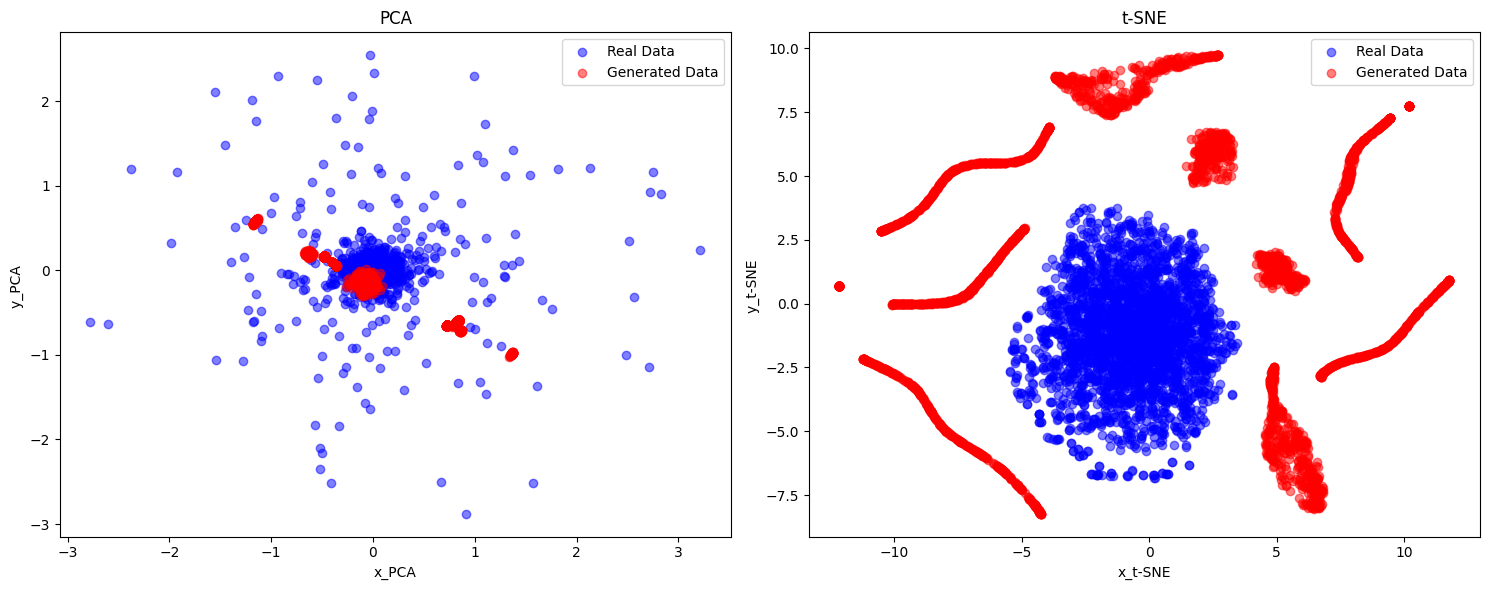

In [30]:
from evaluation import visualization

visualization(X_train, X_augmented)

In [31]:
from evaluation import model_evaluation

input_size = X_train.shape[1]  # Dimensions des caractéristiques (features)

# Évaluer sur les données d'entraînement d'origine
print("\n### Évaluation sur le jeu d'entraînement d'origine ###")
results_original = model_evaluation(
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    input_size=input_size,
    num_classes=n_classes,
    num_epochs=30,
    device='cuda'
)

# Évaluer sur les données augmentées
print("\n### Évaluation sur le jeu d'entraînement augmenté ###")
results_augmented = model_evaluation(
    train_dataset=train_augmented_dataset,
    test_dataset=test_dataset,
    input_size=input_size,
    num_classes=n_classes,
    num_epochs=30,
    device='cuda'
)


### Évaluation sur le jeu d'entraînement d'origine ###

Evaluating MLP model:
Epoch 1/30 - Train Loss: 2.4089 - Train Accuracy: 0.2024
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 2/30 - Train Loss: 2.4109 - Train Accuracy: 0.2091
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 3/30 - Train Loss: 2.4098 - Train Accuracy: 0.2091
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 4/30 - Train Loss: 2.4109 - Train Accuracy: 0.2091
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 5/30 - Train Loss: 2.4086 - Train Accuracy: 0.2091
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 6/30 - Train Loss: 2.4098 - Train Accuracy: 0.2091
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 7/30 - Train Loss: 2.4075 - Train Accuracy: 0.2091
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 8/30 - Train Loss: 2.4086 - Train Accuracy: 0.2091
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 9/30 - Train Loss: 2.4075 - Train Accuracy: 0.2091
Test Loss: 2.4482 - Test Accuracy: 0.1638
Epoch 10/30 - Train Loss: 2.40

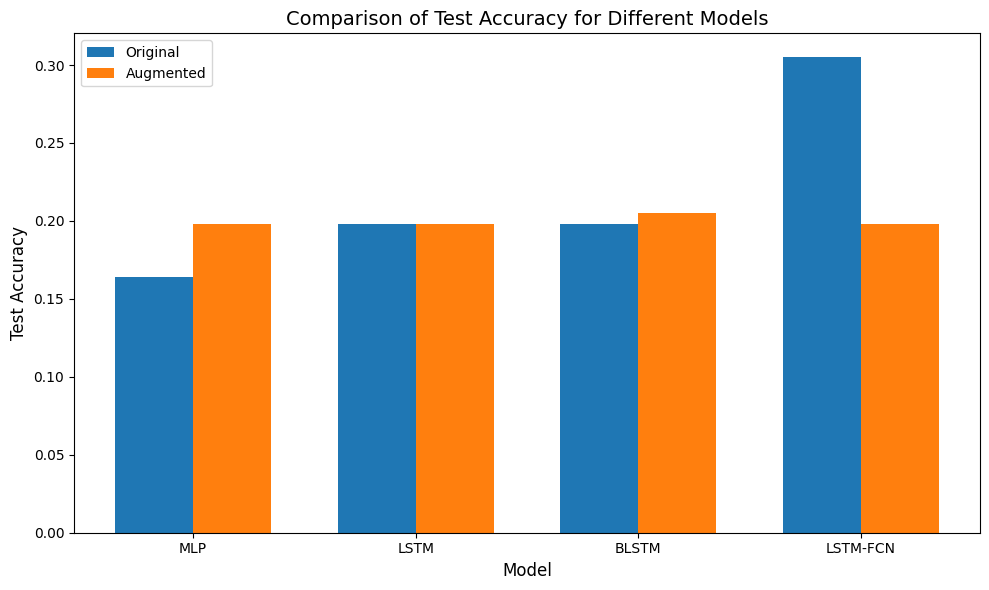

In [32]:
import matplotlib.pyplot as plt

# Extract test accuracies for each model from both results
models = list(results_original.keys())
test_accuracies_original = [results_original[model]['test_accuracy'] for model in models]
test_accuracies_augmented = [results_augmented[model]['test_accuracy'] for model in models]

# Create the bar plot
bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, test_accuracies_original, bar_width, label='Original')
bar2 = ax.bar([i + bar_width for i in index], test_accuracies_augmented, bar_width, label='Augmented')

# Labeling
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
ax.set_title('Comparison of Test Accuracy for Different Models', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


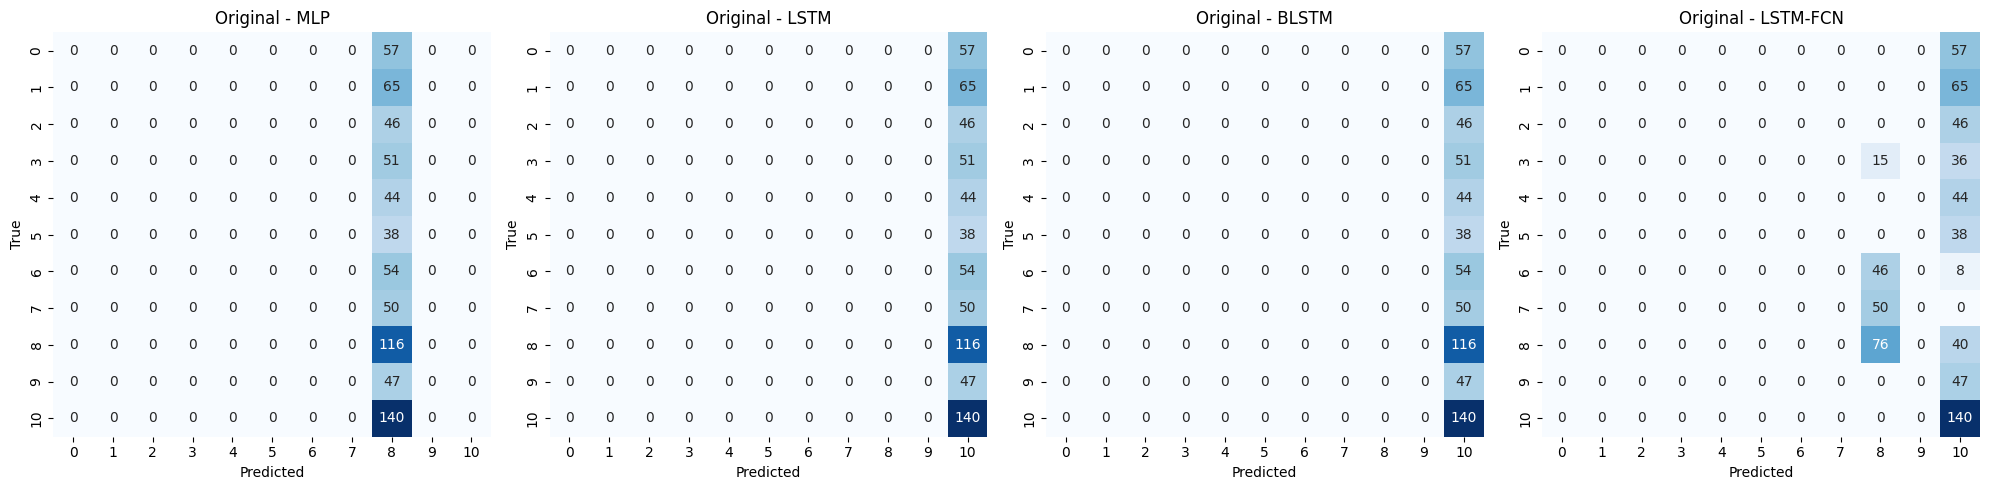

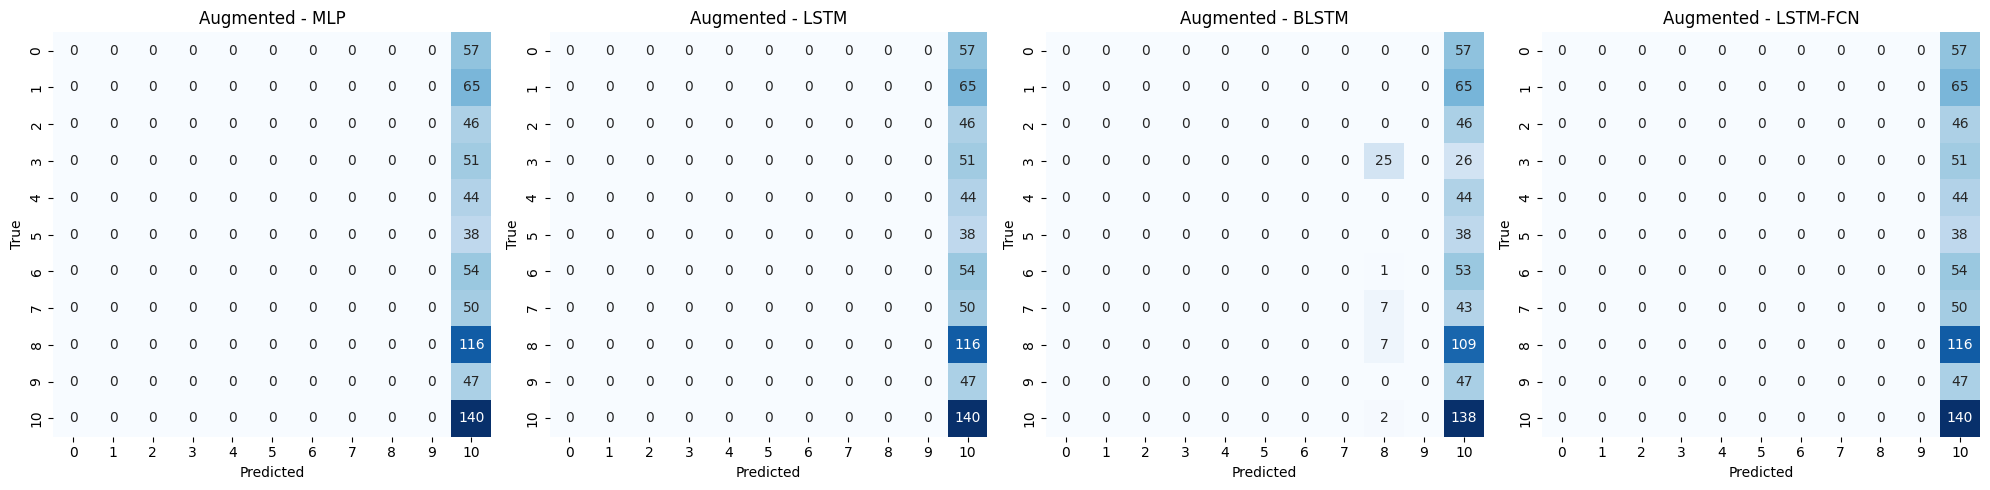

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrices(results_dict, y_test, title_prefix):
    """
    Plot confusion matrices for all models in a results dictionary.

    Parameters:
        results_dict (dict): Dictionary containing model results, with a 'preds' key for predictions.
        y_test (array-like): Ground truth labels.
        title_prefix (str): Prefix for the title of each plot.
    """
    num_models = len(results_dict)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))

    if num_models == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot.

    for ax, (model_name, model_results) in zip(axes, results_dict.items()):
        preds = model_results.get('preds', [])
        if len(preds) == 0:
            print(f"No predictions found for model {model_name}. Skipping...")
            continue
        cm = confusion_matrix(y_test, preds)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"{title_prefix} - {model_name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
# Remplace `results_original` et `results_augmented` par tes dictionnaires et `y_test` par les labels réels.
plot_confusion_matrices(results_original, y_test, "Original")
plot_confusion_matrices(results_augmented, y_test, "Augmented")